In [1]:
!pip install botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.3/738.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Creating UTS/YS model predictions

In [3]:
import pandas as pd
import os

input_vars = ['Al', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Ni', 'V']
output_vars=['VarvYS pred(MPa) at 298K', 'SFE_calc', 'VEC Avg','Yield Strength (MPa)','UTS_True (Mpa)','UTS/YS','Elong_T (%)','Hardness (GPa) SRJT','Modulus (GPa) SRJT','Avg HDYN/HQS','Depth of Penetration (mm) FE_Sim']
yvar_cols = [None,None,None, 'SD, UTS', 'SD, UTS/YS', 'SD, Elong%', 'SD, Hardness', 'SD, Modulus', 'Std, Hdyn/Hqs',None]


def create_uts_ys_ratio_prediction(split, directory="."):
    # File paths
    file_uts = os.path.join(directory, f"model_predictionsUTS_{split}.xlsx")
    file_ys = os.path.join(directory, f"model_predictionsYS_{split}.xlsx")
    file_out = os.path.join(directory, f"model_predictionsUTS_YS_{split}.xlsx")

    # Load Excel files
    xl_uts = pd.read_excel(file_uts, sheet_name=None)
    xl_ys = pd.read_excel(file_ys, sheet_name=None)

    output_dict = {}

    for sheet in ["Train Results", "Test Results"]:
        if sheet in xl_uts and sheet in xl_ys:
            df_uts = xl_uts[sheet]
            df_ys = xl_ys[sheet]

            # Ensure both have the same number of rows
            assert len(df_uts) == len(df_ys), f"Mismatch in {sheet} rows"

            df_combined = df_uts[input_vars].copy()

            # Compute ratios safely
            df_combined["Actual_UTS/YS"] = df_uts.filter(like="Actual").values.ravel() / df_ys.filter(like="Actual").values.ravel()
            df_combined["Predicted_UTS/YS"] = df_uts.filter(like="Predicted").values.ravel() / df_ys.filter(like="Predicted").values.ravel()

            # Drop old UTS/YS columns if present (just in case)
            df_combined = df_combined.drop(columns=[col for col in df_combined.columns if "UTS/YS" in col and col not in ["Actual_UTS/YS", "Predicted_UTS/YS"]], errors='ignore')

            output_dict[sheet] = df_combined

    # Save to new Excel file
    with pd.ExcelWriter(file_out, engine='openpyxl') as writer:
        for sheet_name, df in output_dict.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"✅ Created: {file_out}")


for split in range(5):
    create_uts_ys_ratio_prediction(split, directory=".")



✅ Created: ./model_predictionsUTS_YS_0.xlsx
✅ Created: ./model_predictionsUTS_YS_1.xlsx
✅ Created: ./model_predictionsUTS_YS_2.xlsx
✅ Created: ./model_predictionsUTS_YS_3.xlsx
✅ Created: ./model_predictionsUTS_YS_4.xlsx


Reduction=5 All task Main Prior


=== Split 0 ===
✓ Prior predictions loaded successfully
11 ___________________________
11 ___________________________
11 ___________________________
11 ___________________________
train_fullx_scaled: (1044, 9)
train_fully: (1044, 1)
train_fully_scaled: (1044, 1)
train_fullprior: (1044,)
test_fullx_scaled: (265, 9)
test_fully: (265, 1)
test_fully_scaled: (265, 1)
test_fullprior: (265,)
output_scaler: 11
10 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 6.394 - Val Loss: 6.836
Epoch 51/3000 - Train Loss: 1.949 - Val Loss: 2.480
Epoch 101/3000 - Train Loss: 1.532 - Val Loss: 2.103
Epoch 151/3000 - Train Loss: 1.447 - Val Loss: 2.033
Epoch 201/3000 - Train Loss: 1.395 - Val Loss: 1.984
Epoch 251/3000 - Train Loss: 1.352 - Val Loss: 1.959
Epoch 301/3000 - Train Loss: 1.317 - Val Loss: 1.954
Epoch 351/3000 - Train Loss: 1.276 - Val Loss: 1.919
Early stopping at epoch 390


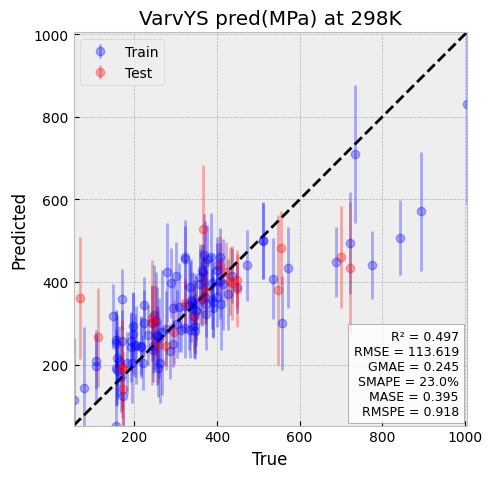

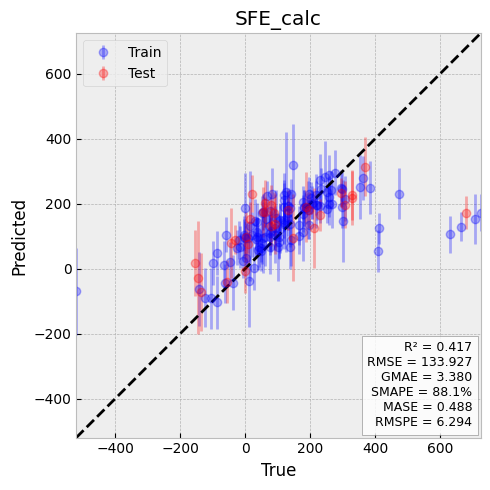

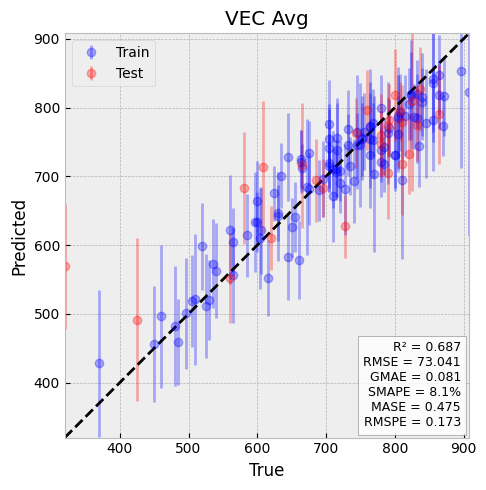

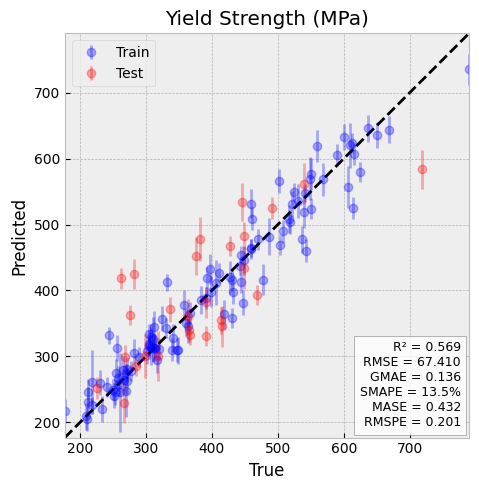

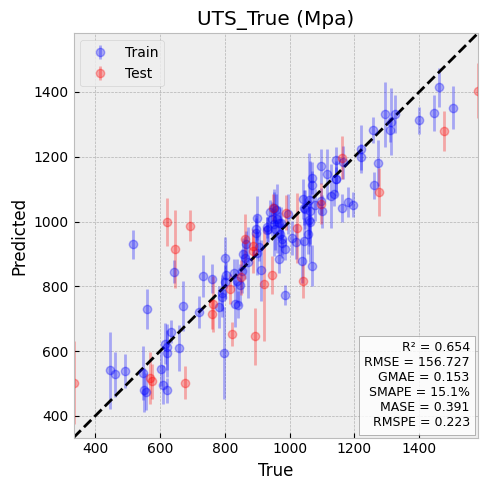

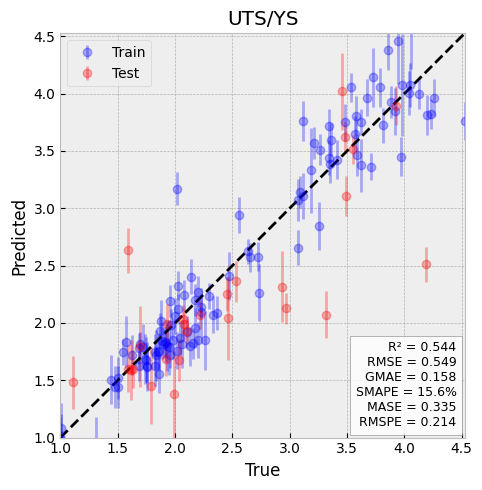

<ipython-input-24-1700243587>:2125: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-24-1700243587>:2156: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


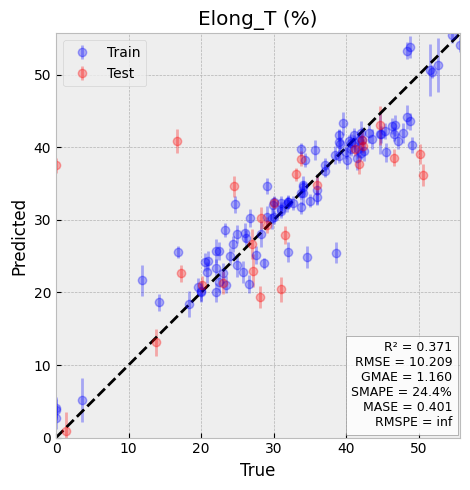

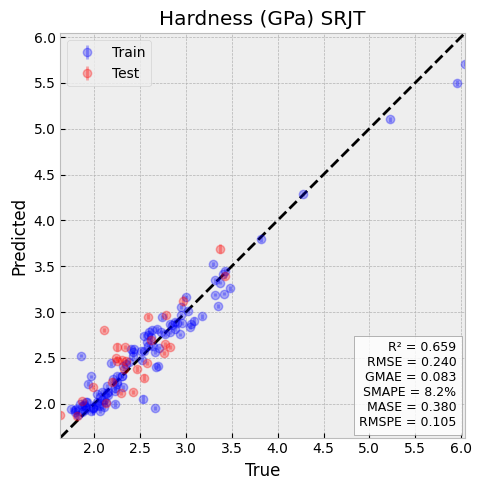

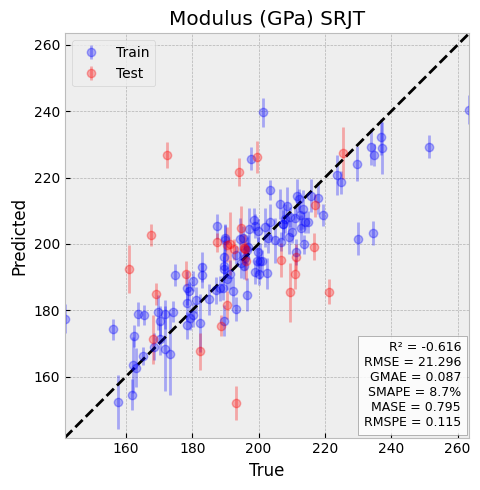

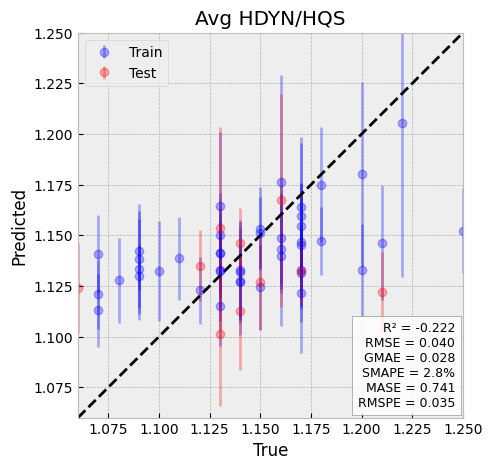

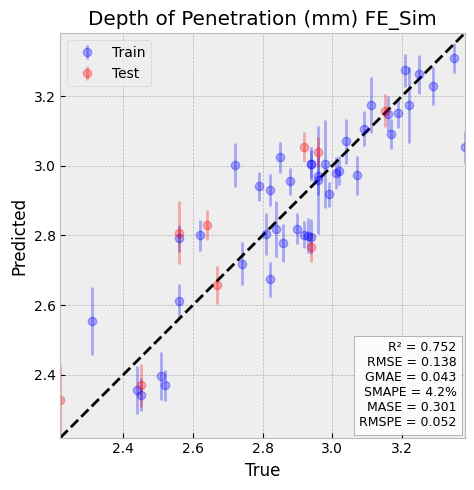


=== Split 1 ===
✓ Prior predictions loaded successfully
11 ___________________________
11 ___________________________
11 ___________________________
11 ___________________________
train_fullx_scaled: (1042, 9)
train_fully: (1042, 1)
train_fully_scaled: (1042, 1)
train_fullprior: (1042,)
test_fullx_scaled: (257, 9)
test_fully: (257, 1)
test_fully_scaled: (257, 1)
test_fullprior: (257,)
output_scaler: 11
10 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 5.819 - Val Loss: 5.976
Epoch 51/3000 - Train Loss: 1.912 - Val Loss: 2.190
Epoch 101/3000 - Train Loss: 1.554 - Val Loss: 1.881
Epoch 151/3000 - Train Loss: 1.478 - Val Loss: 1.803
Epoch 201/3000 - Train Loss: 1.420 - Val Loss: 1.789
Epoch 251/3000 - Train Loss: 1.383 - Val Loss: 1.743
Early stopping at epoch 299


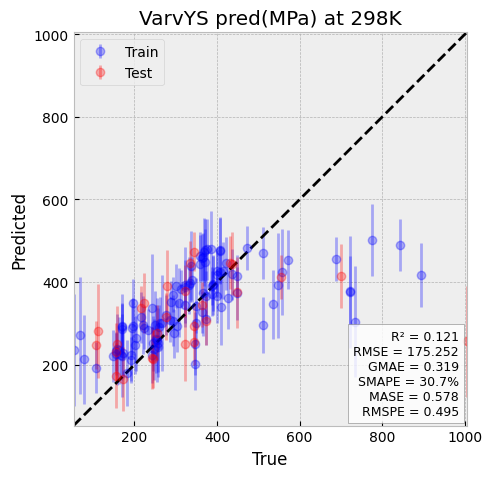

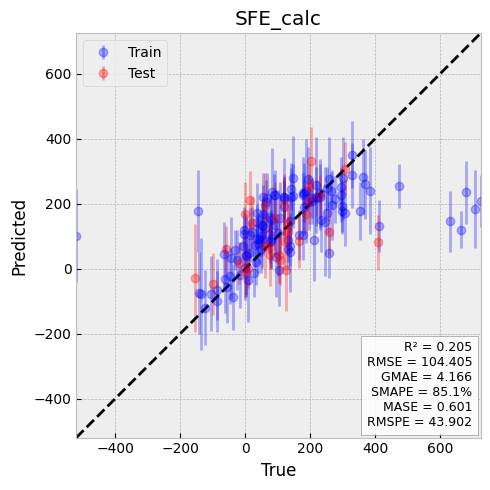

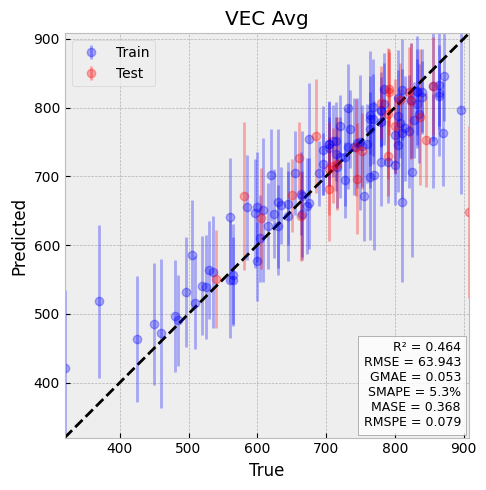

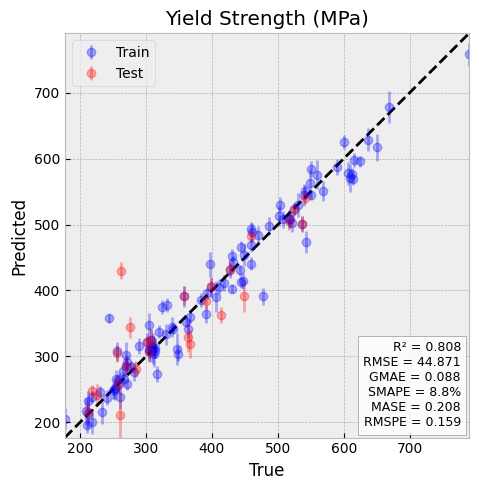

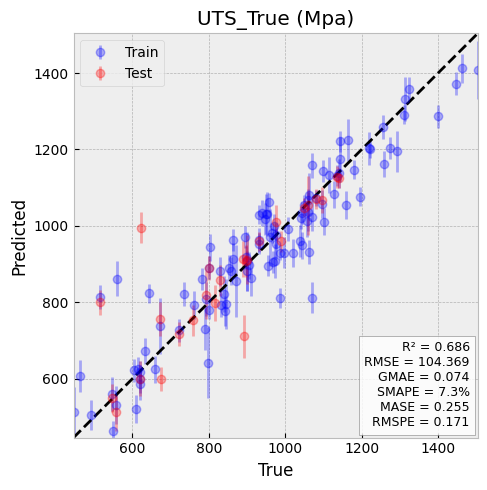

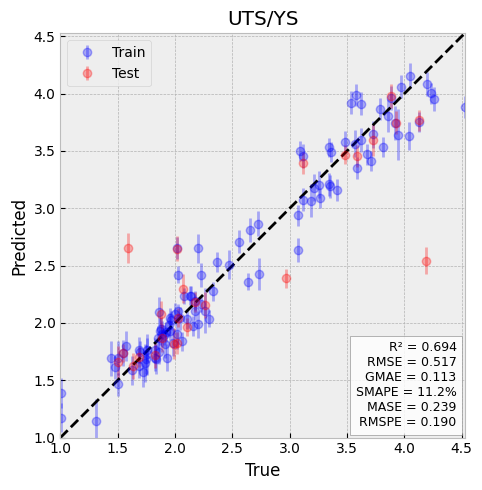

<ipython-input-24-1700243587>:2125: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-24-1700243587>:2156: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


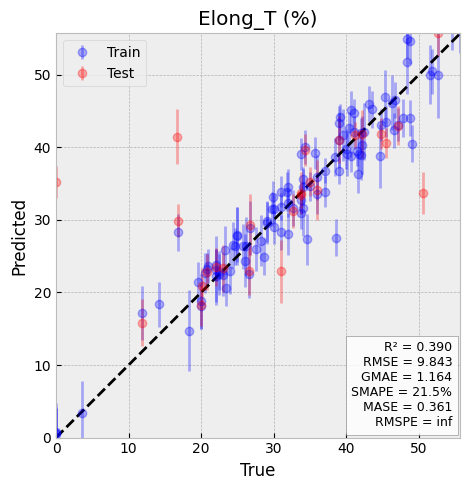

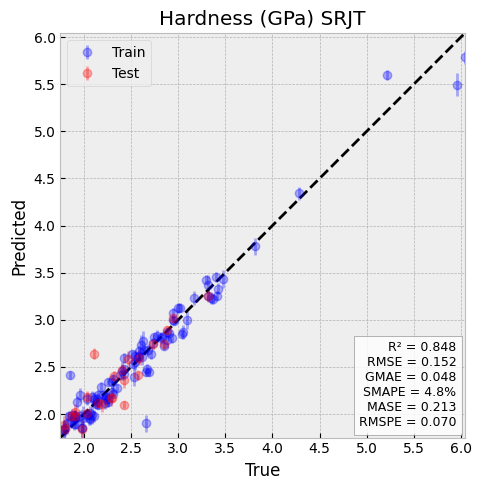

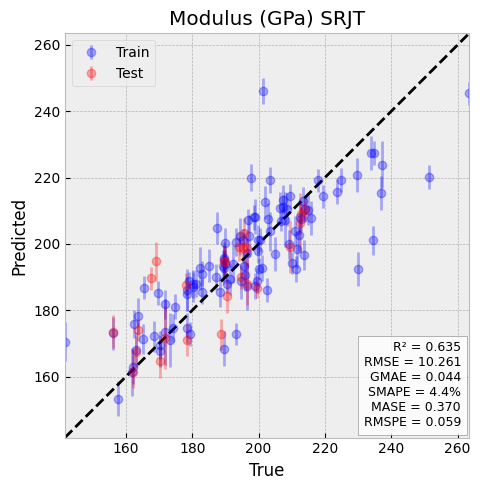

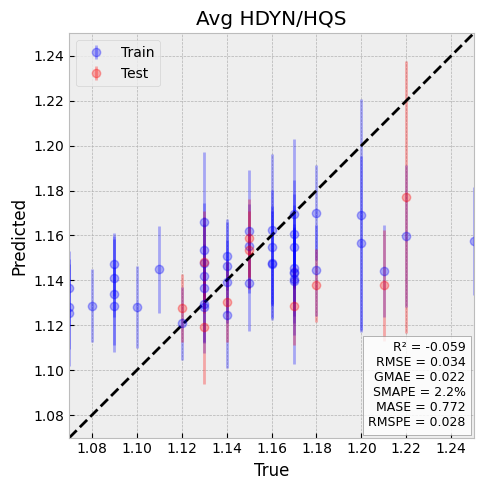

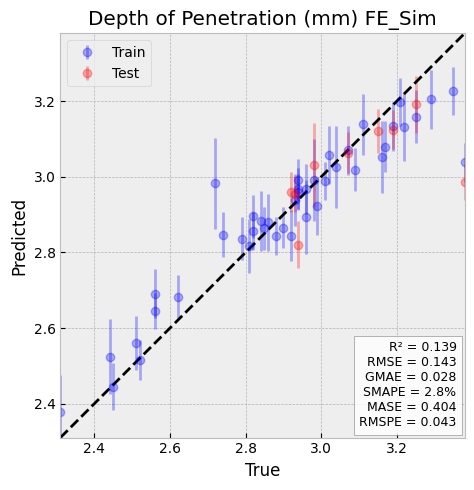


=== Split 2 ===
✓ Prior predictions loaded successfully
11 ___________________________
11 ___________________________
11 ___________________________
11 ___________________________
train_fullx_scaled: (1042, 9)
train_fully: (1042, 1)
train_fully_scaled: (1042, 1)
train_fullprior: (1042,)
test_fullx_scaled: (266, 9)
test_fully: (266, 1)
test_fully_scaled: (266, 1)
test_fullprior: (266,)
output_scaler: 11
10 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 6.329 - Val Loss: 6.015
Epoch 51/3000 - Train Loss: 2.063 - Val Loss: 1.930
Epoch 101/3000 - Train Loss: 1.653 - Val Loss: 1.578
Epoch 151/3000 - Train Loss: 1.570 - Val Loss: 1.474
Epoch 201/3000 - Train Loss: 1.501 - Val Loss: 1.456
Epoch 251/3000 - Train Loss: 1.471 - Val Loss: 1.395
Epoch 301/3000 - Train Loss: 1.438 - Val Loss: 1.399
Epoch 351/3000 - Train Loss: 1.408 - Val Loss: 1.375
Epoch 401/3000 - Train Loss: 1.396 - Val Loss: 1.350
Epoch 451/3000 - Train Loss: 1.375 - Val Loss: 1.

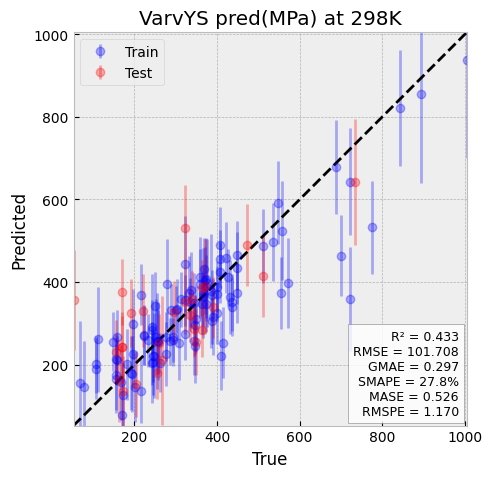

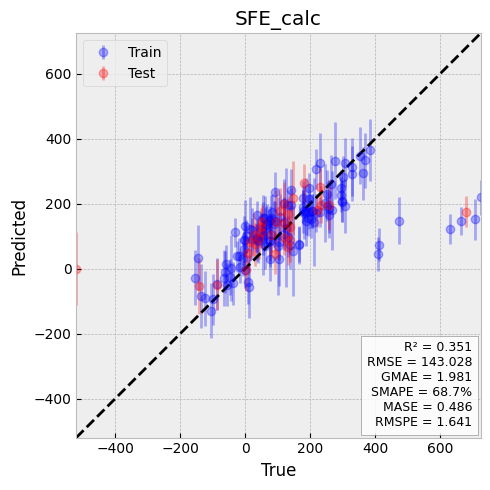

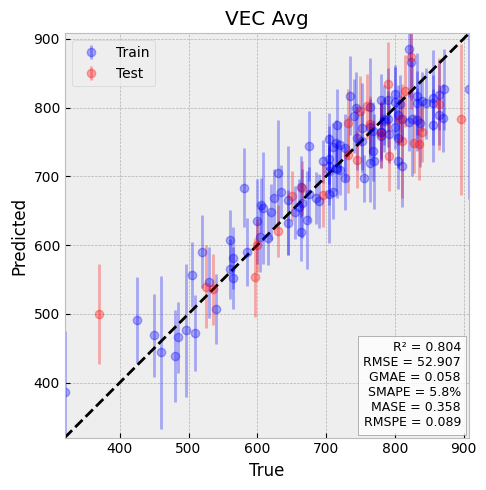

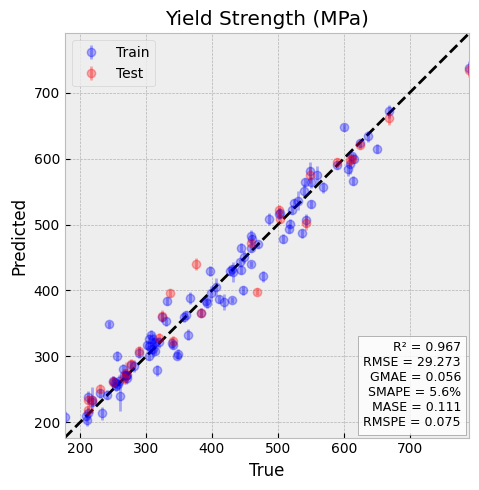

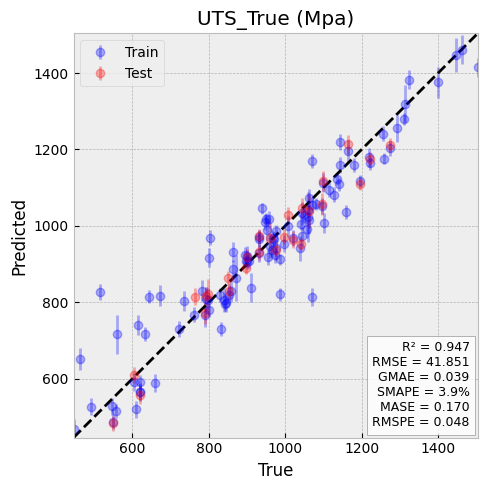

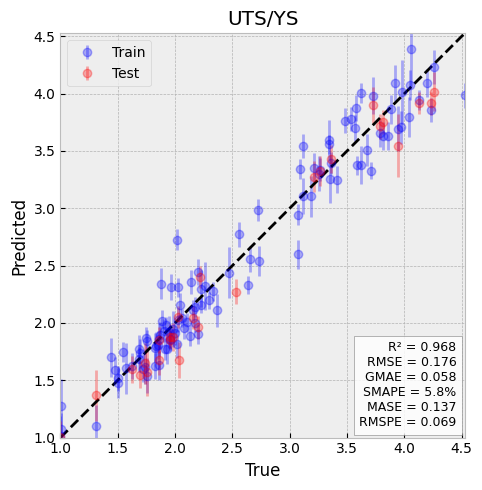

<ipython-input-24-1700243587>:2125: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-24-1700243587>:2156: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


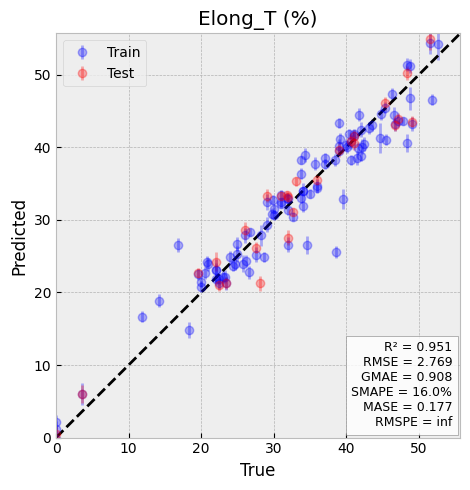

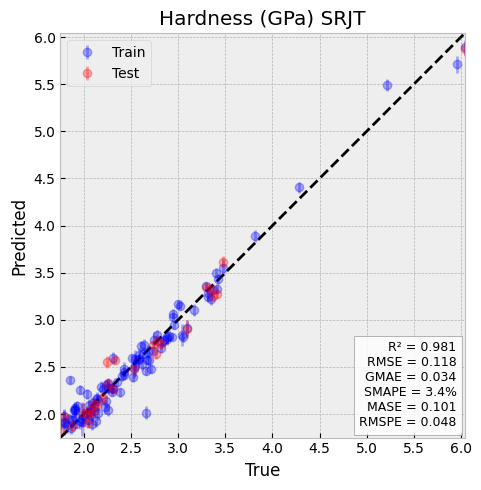

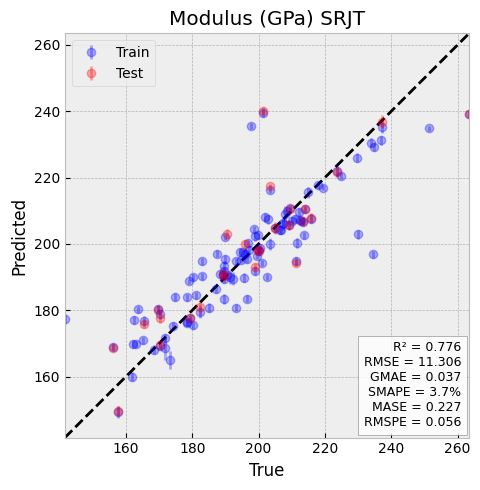

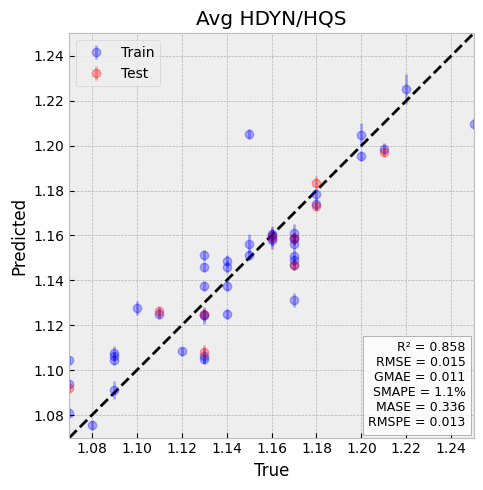

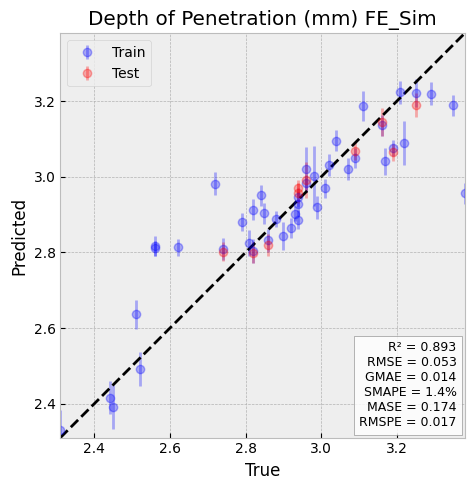


=== Split 3 ===
✓ Prior predictions loaded successfully
11 ___________________________
11 ___________________________
11 ___________________________
11 ___________________________
train_fullx_scaled: (1044, 9)
train_fully: (1044, 1)
train_fully_scaled: (1044, 1)
train_fullprior: (1044,)
test_fullx_scaled: (262, 9)
test_fully: (262, 1)
test_fully_scaled: (262, 1)
test_fullprior: (262,)
output_scaler: 11
10 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 7.230 - Val Loss: 7.082
Epoch 51/3000 - Train Loss: 2.112 - Val Loss: 2.161
Epoch 101/3000 - Train Loss: 1.649 - Val Loss: 1.710
Epoch 151/3000 - Train Loss: 1.558 - Val Loss: 1.623
Epoch 201/3000 - Train Loss: 1.504 - Val Loss: 1.559
Epoch 251/3000 - Train Loss: 1.464 - Val Loss: 1.518
Epoch 301/3000 - Train Loss: 1.438 - Val Loss: 1.469
Early stopping at epoch 351


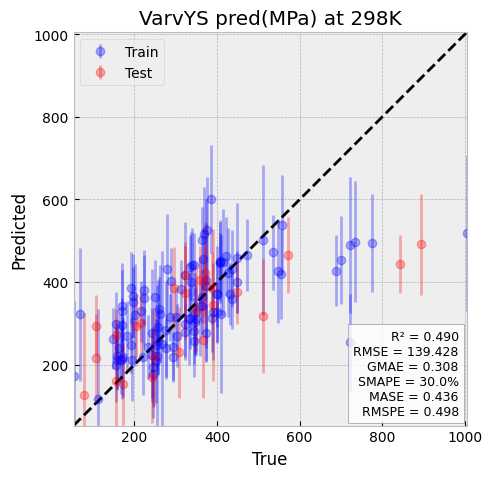

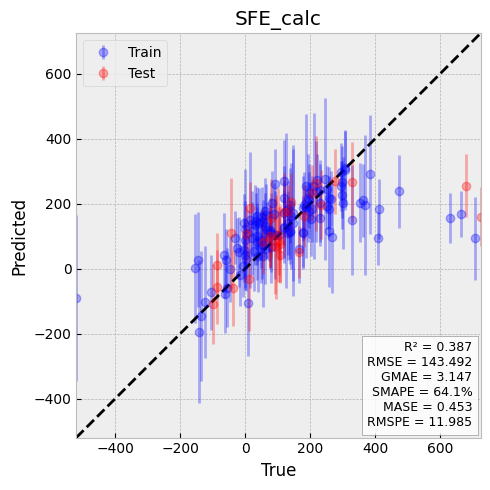

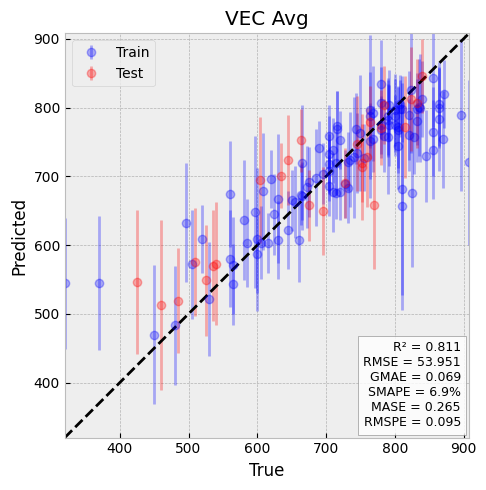

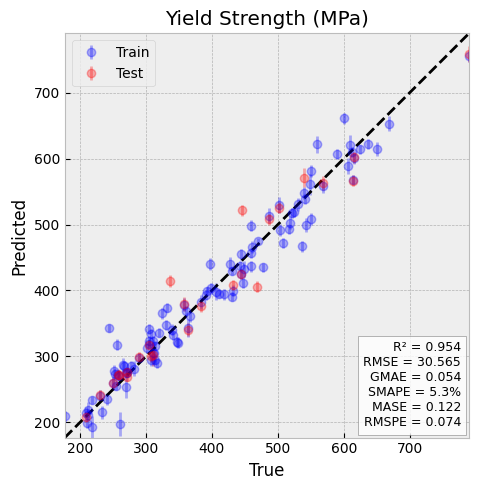

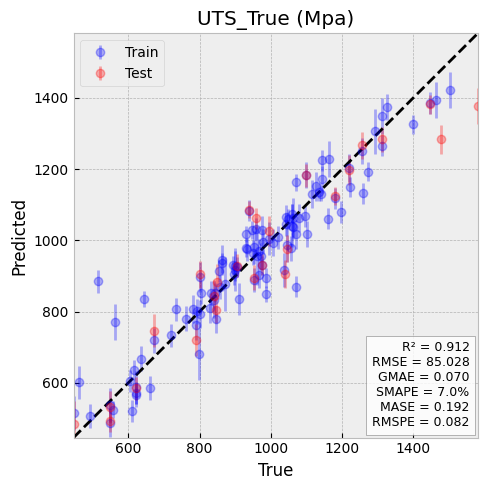

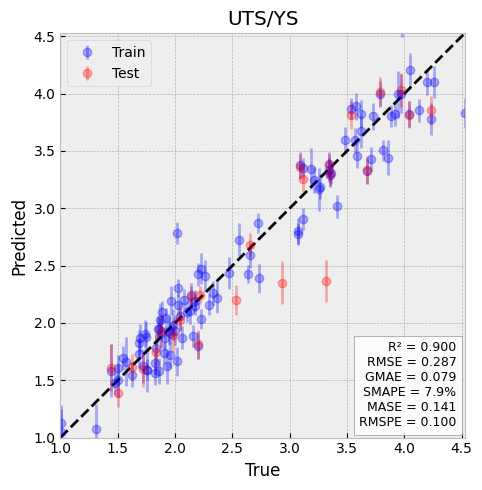

<ipython-input-24-1700243587>:2125: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-24-1700243587>:2156: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


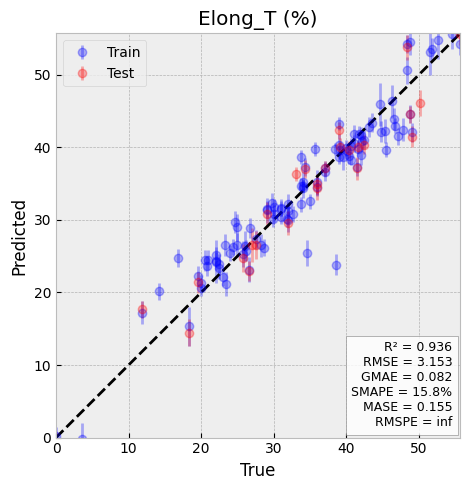

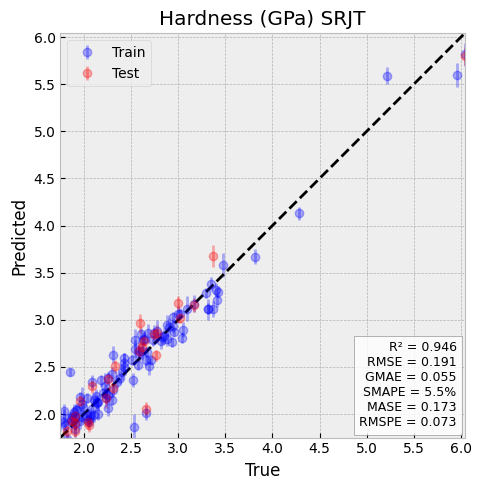

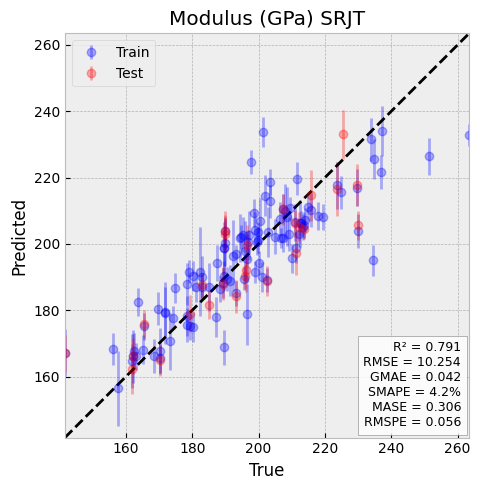

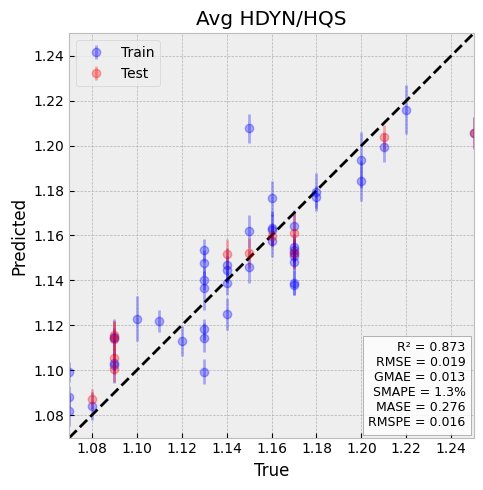

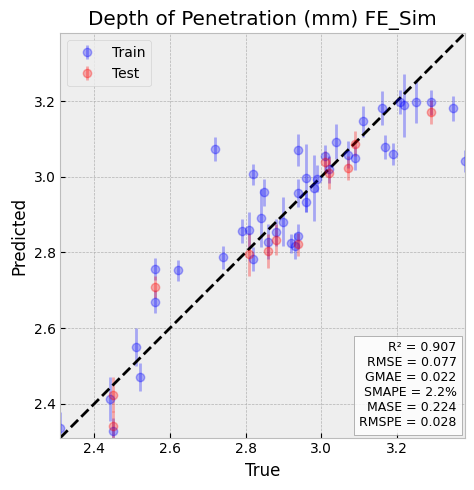


=== Split 4 ===
✓ Prior predictions loaded successfully
11 ___________________________
11 ___________________________
11 ___________________________
11 ___________________________
train_fullx_scaled: (1042, 9)
train_fully: (1042, 1)
train_fully_scaled: (1042, 1)
train_fullprior: (1042,)
test_fullx_scaled: (275, 9)
test_fully: (275, 1)
test_fully_scaled: (275, 1)
test_fullprior: (275,)
output_scaler: 11
10 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 5.599 - Val Loss: 5.557
Epoch 51/3000 - Train Loss: 1.939 - Val Loss: 2.010
Epoch 101/3000 - Train Loss: 1.583 - Val Loss: 1.682
Epoch 151/3000 - Train Loss: 1.509 - Val Loss: 1.606
Epoch 201/3000 - Train Loss: 1.444 - Val Loss: 1.562
Epoch 251/3000 - Train Loss: 1.388 - Val Loss: 1.529
Epoch 301/3000 - Train Loss: 1.359 - Val Loss: 1.516
Epoch 351/3000 - Train Loss: 1.339 - Val Loss: 1.505
Epoch 401/3000 - Train Loss: 1.328 - Val Loss: 1.493
Early stopping at epoch 405


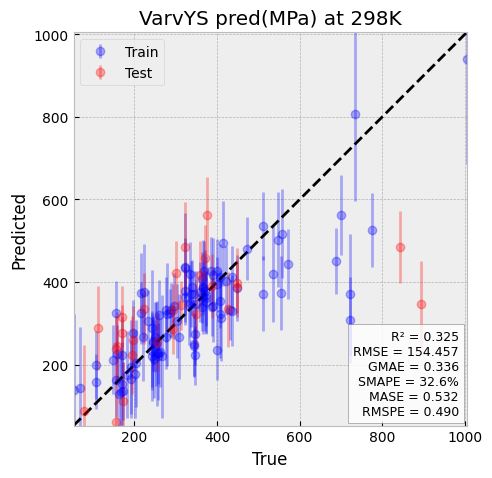

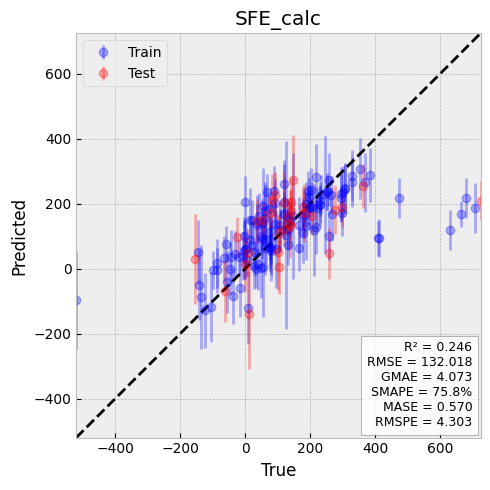

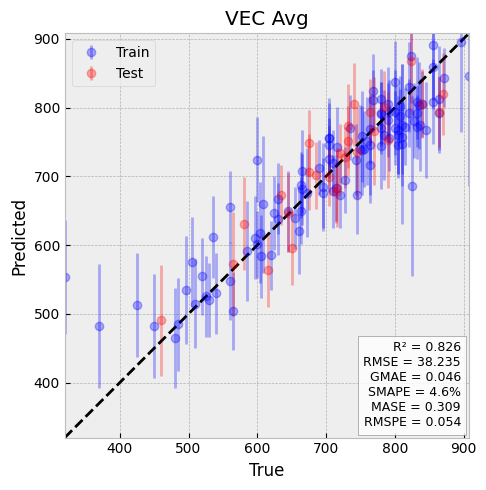

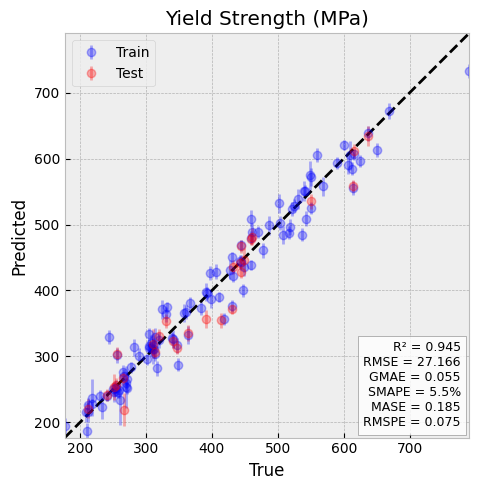

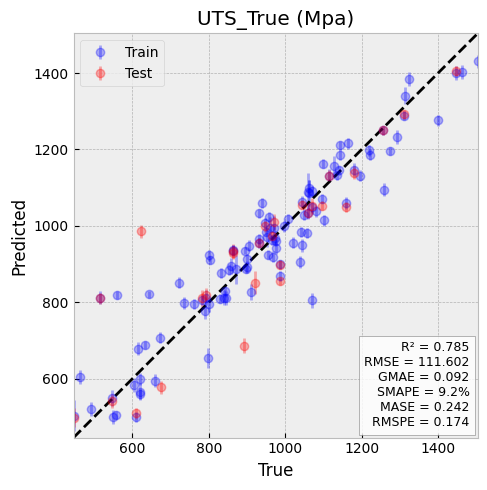

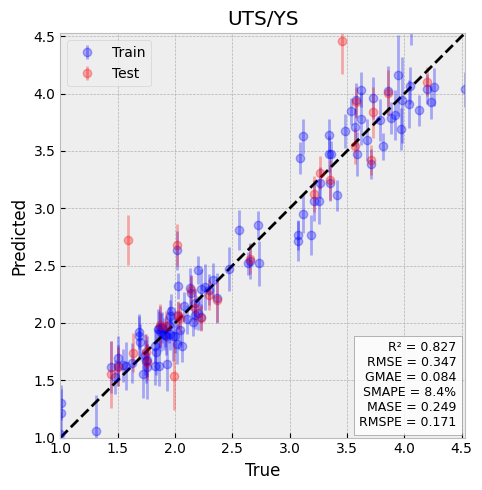

<ipython-input-24-1700243587>:2125: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))


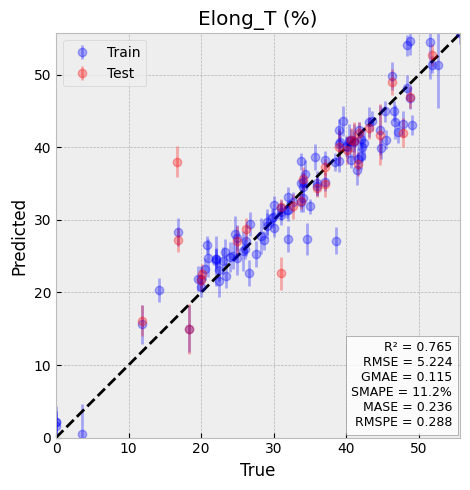

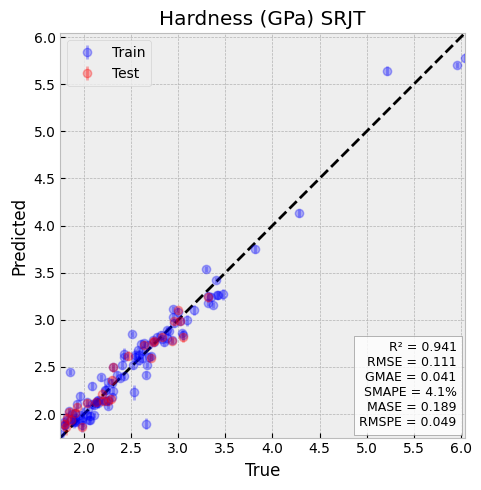

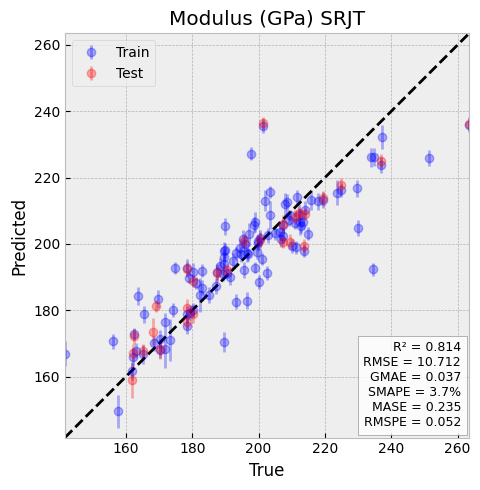

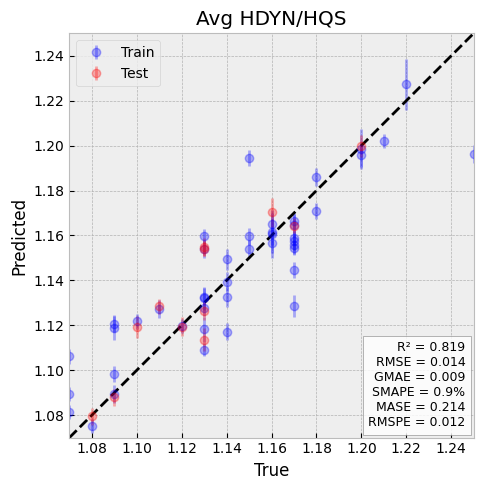

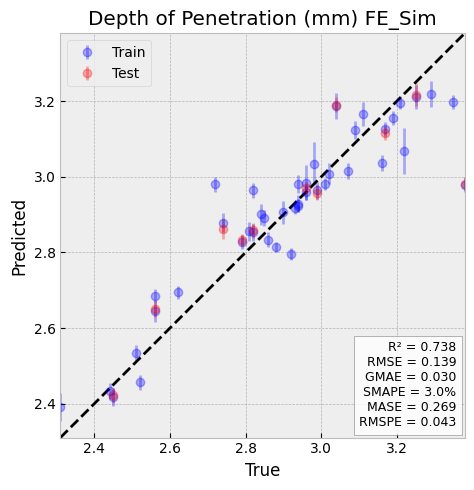

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


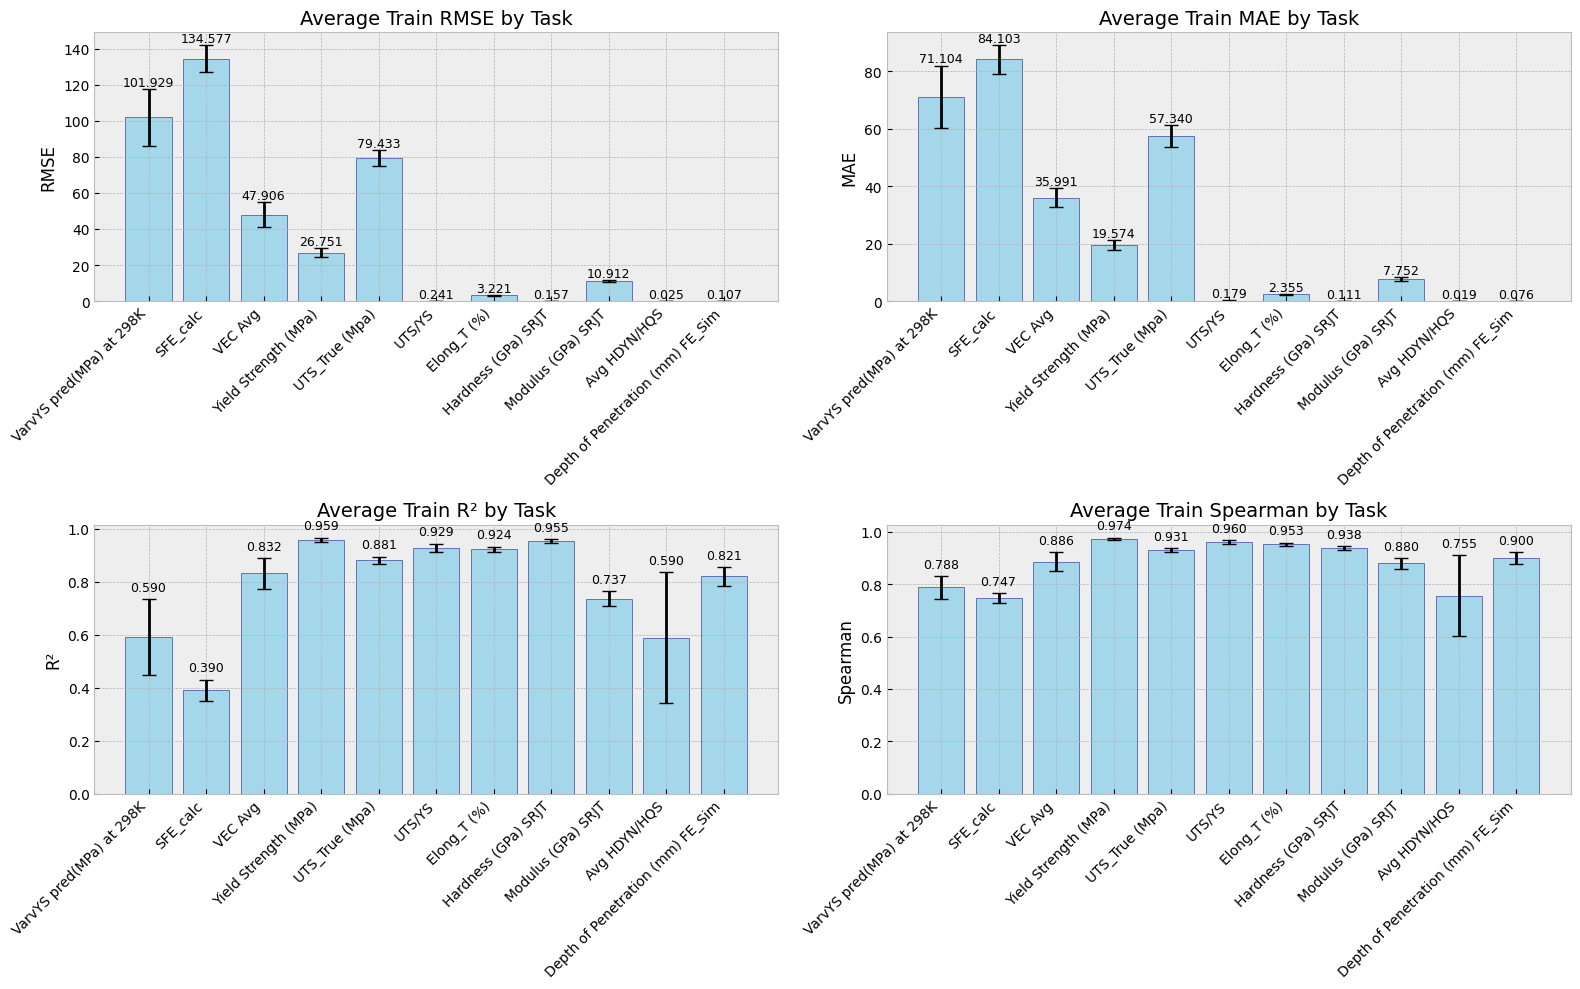

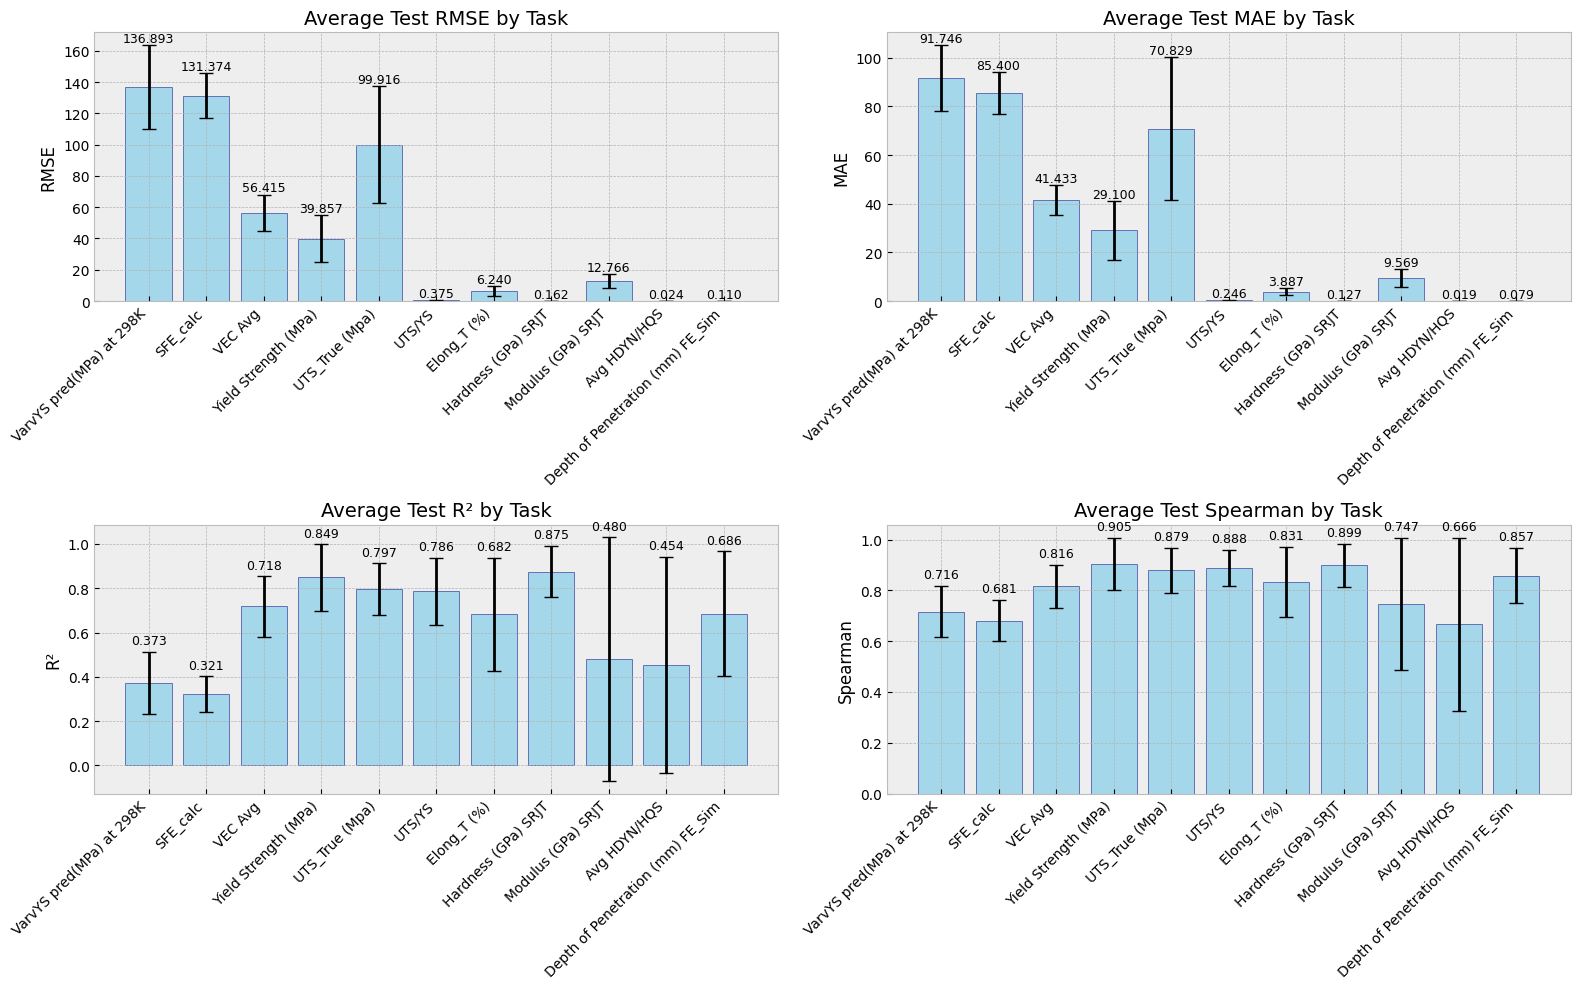


Average Train Metrics Across All Splits:

Task: VarvYS pred(MPa) at 298K (averaged over 5 splits)
----------------------------------------
Train RMSE: 101.9289 $\pm$ 15.8267
Train MAE: 71.1044 $\pm$ 10.8459
Train R²: 0.5899 $\pm$ 0.1437
Train Spearman: 0.7879 $\pm$ 0.0439
Train Kendall: 0.5997 $\pm$ 0.0429
GMAE: 0.2275 $\pm$ 0.0280
SMAPE: 22.22\% $\pm$ 2.59\%
MASE: 0.4108 $\pm$ 0.0587
RMSPE: 0.4231 $\pm$ 0.1140
Avg. Train Samples: 104.4

Task: SFE_calc (averaged over 5 splits)
----------------------------------------
Train RMSE: 134.5773 $\pm$ 7.4582
Train MAE: 84.1031 $\pm$ 4.9476
Train R²: 0.3900 $\pm$ 0.0406
Train Spearman: 0.7466 $\pm$ 0.0182
Train Kendall: 0.5643 $\pm$ 0.0218
GMAE: 3.6275 $\pm$ 0.0861
SMAPE: 70.95\% $\pm$ 3.25\%
MASE: 0.4608 $\pm$ 0.0368
RMSPE: 28.3428 $\pm$ 11.8348
Avg. Train Samples: 117.0

Task: VEC Avg (averaged over 5 splits)
----------------------------------------
Train RMSE: 47.9063 $\pm$ 7.0083
Train MAE: 35.9906 $\pm$ 3.3171
Train R²: 0.8322 $\pm$ 0.057

In [24]:
import pandas as pd
import numpy as np
import torch
import gpytorch
from gpytorch.means import ConstantMean, LinearMean
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.variational import VariationalStrategy, CholeskyVariationalDistribution
from gpytorch.distributions import MultivariateNormal
from gpytorch.models.deep_gps import DeepGPLayer, DeepGP
from gpytorch.mlls import DeepApproximateMLL, VariationalELBO
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

class DGPLastLayer3(gpytorch.models.ApproximateGP):
    def __init__(self, input_dims, output_dims, num_inducing=128, linear_mean=True):
        num_latents = 10
        inducing_points = torch.randn(10, num_inducing, input_dims)

        variational_distribution = CholeskyVariationalDistribution(
            num_inducing_points=num_inducing,
            batch_shape=torch.Size([num_latents]))

        variational_strategy = gpytorch.variational.LMCVariationalStrategy(
            gpytorch.variational.VariationalStrategy(
                self, inducing_points, variational_distribution, learn_inducing_locations=True
            ),
            num_tasks=output_dims,
            num_latents=10,
            latent_dim=-1
        )

        super().__init__(variational_strategy)
        self.mean_module = ConstantMean(batch_shape=torch.Size([10])) if linear_mean else LinearMean(input_dims) #gpytorch.means.ConstantMean(batch_shape=torch.Size([10]))
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(batch_shape=torch.Size([10])),
            batch_shape=torch.Size([10])
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)

class DGPHiddenLayer(DeepGPLayer):
    def __init__(self, input_dims, output_dims, num_inducing=32, linear_mean=True):
        inducing_points = torch.randn(output_dims, num_inducing, input_dims)
        batch_shape = torch.Size([output_dims])

        variational_distribution = CholeskyVariationalDistribution(
            num_inducing_points=num_inducing,
            batch_shape=batch_shape
        )
        variational_strategy = VariationalStrategy(
            self,
            inducing_points,
            variational_distribution,
            learn_inducing_locations=True
        )

        super().__init__(variational_strategy, input_dims, output_dims)
        self.mean_module = ConstantMean(batch_shape=batch_shape) if linear_mean else LinearMean(input_dims)
        self.covar_module = ScaleKernel(
            MaternKernel(nu=2.5, batch_shape=batch_shape, ard_num_dims=input_dims),
            batch_shape=batch_shape
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)


import gpytorch
import math
from typing import Any, Dict, List, Optional, Tuple, Union

import torch
from botorch.acquisition.objective import PosteriorTransform
from botorch.exceptions.errors import UnsupportedError
from botorch.models.gpytorch import GPyTorchModel, MultiTaskGPyTorchModel
from botorch.models.model import FantasizeMixin
from botorch.models.transforms.input import InputTransform
from botorch.models.transforms.outcome import OutcomeTransform
from botorch.models.utils.gpytorch_modules import (
    get_matern_kernel_with_gamma_prior,
    MIN_INFERRED_NOISE_LEVEL,
)
from botorch.posteriors.multitask import MultitaskGPPosterior
from botorch.utils.datasets import MultiTaskDataset, SupervisedDataset
from gpytorch.constraints import GreaterThan
from gpytorch.distributions.multitask_multivariate_normal import (
    MultitaskMultivariateNormal,
)
from gpytorch.distributions.multivariate_normal import MultivariateNormal
from gpytorch.kernels.index_kernel import IndexKernel
from gpytorch.kernels.matern_kernel import MaternKernel
from gpytorch.kernels.multitask_kernel import MultitaskKernel
from gpytorch.likelihoods.gaussian_likelihood import (
    FixedNoiseGaussianLikelihood,
    GaussianLikelihood,
)
from gpytorch.likelihoods.likelihood import Likelihood
from gpytorch.likelihoods.multitask_gaussian_likelihood import (
    MultitaskGaussianLikelihood,
)
from gpytorch.means import MultitaskMean
from gpytorch.means.constant_mean import ConstantMean
from gpytorch.models.exact_gp import ExactGP
from gpytorch.module import Module
from gpytorch.priors.lkj_prior import LKJCovariancePrior
from gpytorch.priors.prior import Prior
from gpytorch.priors.smoothed_box_prior import SmoothedBoxPrior
from gpytorch.priors.torch_priors import GammaPrior
from gpytorch.settings import detach_test_caches
from gpytorch.utils.errors import CachingError
from gpytorch.utils.memoize import cached, pop_from_cache
from linear_operator.operators import (
    BatchRepeatLinearOperator,
    CatLinearOperator,
    DiagLinearOperator,
    KroneckerProductDiagLinearOperator,
    KroneckerProductLinearOperator,
    RootLinearOperator,
    to_linear_operator,
)
from torch import Tensor
def get_task_value_remapping(
    task_values: Tensor, dtype: torch.dtype
) -> Optional[Tensor]:
    """Construct an mapping of discrete task values to contiguous int-valued floats.

    Args:
        task_values: A sorted long-valued tensor of task values.
        dtype: The dtype of the model inputs (e.g. `X`), which the new
            task values should have mapped to (e.g. float, double).

    Returns:
        A tensor of shape `task_values.max() + 1` that maps task values
        to new task values. The indexing operation `mapper[task_value]`
        will produce a tensor of new task values, of the same shape as
        the original. The elements of the `mapper` tensor that do not
        appear in the original `task_values` are mapped to `nan`. The
        return value will be `None`, when the task values are contiguous
        integers starting from zero.
    """
    task_range = torch.arange(
        len(task_values), dtype=task_values.dtype, device=task_values.device
    )
    mapper = None
    if not torch.equal(task_values, task_range):
        # Create a tensor that maps task values to new task values.
        # The number of tasks should be small, so this should be quite efficient.
        mapper = torch.full(
            (task_values.max().item() + 1,),
            float("nan"),
            dtype=dtype,
            device=task_values.device,
        )
        mapper[task_values] = task_range.to(dtype=dtype)
    return mapper


class MultiTaskDeepGP(DeepGP, MultiTaskGPyTorchModel):
    def __init__(
        self,
        train_X: Tensor,
        train_Y: Tensor,
        task_feature: int,
        reduction: Optional[int] = 8,
        train_Yvar: Optional[Tensor] = None,
        mean_module: Optional[Module] = None,
        covar_module: Optional[Module] = None,
        likelihood: Optional[Likelihood] = None,
        task_covar_prior: Optional[Prior] = None,
        output_tasks: Optional[List[int]] = None,
        rank: Optional[int] = None,
        all_tasks: Optional[List[int]] = None,
        input_transform: Optional[InputTransform] = None,
        outcome_transform: Optional[OutcomeTransform] = None,
    ) -> None:
        super().__init__()
        self.reduction=reduction
        with torch.no_grad():
            transformed_X = self.transform_inputs(
                X=train_X, input_transform=input_transform
            )
        self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
        (
            all_tasks_inferred,
            task_feature,
            self.num_non_task_features,
        ) = self.get_all_tasks(transformed_X, task_feature, output_tasks)
        if all_tasks is not None and not set(all_tasks_inferred).issubset(all_tasks):
            raise UnsupportedError(
                f"The provided {all_tasks=} does not contain all the task features "
                f"inferred from the training data {all_tasks_inferred=}. "
                "This is not allowed as it will lead to errors during model training."
            )
        all_tasks = all_tasks or all_tasks_inferred
        self.num_tasks = len(all_tasks)
        if outcome_transform is not None:
            train_Y, train_Yvar = outcome_transform(Y=train_Y, Yvar=train_Yvar)

        # squeeze output dim
        train_Y = train_Y.squeeze(-1)
        if output_tasks is None:
            output_tasks = all_tasks
        else:
            if set(output_tasks) - set(all_tasks):
                raise RuntimeError("All output tasks must be present in input data.")
        self._output_tasks = output_tasks
        self._num_outputs = len(output_tasks)

        if likelihood is None:
            if train_Yvar is None:
                likelihood = GaussianLikelihood(noise_prior=GammaPrior(1.1, 0.05))
            else:
                likelihood = FixedNoiseGaussianLikelihood(noise=train_Yvar.squeeze(-1))

        self._task_feature = task_feature
        self._base_idxr = torch.arange(self.num_non_task_features)
        self._base_idxr[task_feature:] += 1

        # Single hidden layer with moderate dimension
        # Single hidden layer with fixed dimension
        hidden_layer = DGPHiddenLayer(
            input_dims=train_X.shape[-1]-1,  # Exclude task feature
            output_dims=self.num_tasks-self.reduction,  # Moderate expansion of dimension
            linear_mean=True
        )

        last_layer = DGPLastLayer3(
            input_dims=self.num_tasks-self.reduction,
            output_dims=self.num_tasks,
            linear_mean=True
        )

        self.hidden_layer = hidden_layer
        self.last_layer = last_layer



        self.likelihood = gpytorch.likelihoods.GaussianLikelihood(num_tasks=self.num_tasks)#,noise_constraint=gpytorch.constraints.Interval(0.0001, 0.001))

        self._rank = rank if rank is not None else self.num_tasks
        task_mapper = get_task_value_remapping(
            task_values=torch.tensor(
                all_tasks, dtype=torch.long, device=train_X.device
            ),
            dtype=train_X.dtype,
        )
        self.register_buffer("_task_mapper", task_mapper)
        self._expected_task_values = set(all_tasks)
        if input_transform is not None:
            self.input_transform = input_transform
        if outcome_transform is not None:
            self.outcome_transform = outcome_transform
        self.to(train_X)
    def _split_inputs(self, x: Tensor) -> Tuple[Tensor, Tensor]:
        r"""Extracts base features and task indices from input data.

        Args:
            x: The full input tensor with trailing dimension of size `d + 1`.
                Should be of float/double data type.

        Returns:
            2-element tuple containing

            - A `q x d` or `b x q x d` (batch mode) tensor with trailing
            dimension made up of the `d` non-task-index columns of `x`, arranged
            in the order as specified by the indexer generated during model
            instantiation.
            - A `q` or `b x q` (batch mode) tensor of long data type containing
            the task indices.
        """
        batch_shape, d = x.shape[:-2], x.shape[-1]
        x_basic = x[..., self._base_idxr].view(batch_shape + torch.Size([-1, d - 1]))
        task_idcs = (
            x[..., self._task_feature]
            .view(batch_shape + torch.Size([-1, 1]))
            .to(dtype=torch.long)
        )
        task_idcs = self._map_tasks(task_values=task_idcs)
        return x_basic, task_idcs

    def forward(self, x: Tensor) -> MultivariateNormal:
        if self.training:
            x = self.transform_inputs(x)

        x_basic, task_idcs = self._split_inputs(x)
        hidden=self.hidden_layer(x_basic)
#         hidden = self.hidden_layer2(hidden_rep1)

        if len(torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape) == 3:
            task_id = torch.broadcast_to(
                task_idcs.squeeze(-1),
                (torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-3],
                 task_idcs.squeeze(-1).shape[-1])
            )
        else:
            task_id = torch.broadcast_to(
                task_idcs.squeeze(-1),
                (torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-4],
                 torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-3],
                 task_idcs.squeeze(-1).shape[-1])
            )

        output = self.last_layer(
            torch.distributions.Normal(
                loc=hidden.mean,
                scale=hidden.variance.sqrt()
            ).rsample(),
            task_indices=task_id
        )
        return output

    @classmethod
    def get_all_tasks(
        cls,
        train_X: Tensor,
        task_feature: int,
        output_tasks: Optional[List[int]] = None,
    ) -> Tuple[List[int], int, int]:
        if train_X.ndim != 2:
            # Currently, batch mode MTGPs are blocked upstream in GPyTorch
            raise ValueError(f"Unsupported shape {train_X.shape} for train_X.")

        d = train_X.shape[-1] - 1
        if not (-d <= task_feature <= d):
            raise ValueError(f"Must have that -{d} <= task_feature <= {d}")
        task_feature = task_feature % (d + 1)
        all_tasks = (
            train_X[..., task_feature].unique(sorted=True).to(dtype=torch.long).tolist()
        )
        return all_tasks, task_feature, d

    @classmethod
    def construct_inputs(
        cls,
        training_data: Union[SupervisedDataset, MultiTaskDataset],
        task_feature: int,
        output_tasks: Optional[List[int]] = None,
        task_covar_prior: Optional[Prior] = None,
        prior_config: Optional[dict] = None,
        rank: Optional[int] = None,
    ) -> Dict[str, Any]:
        r"""Construct `Model` keyword arguments from a dataset and other args.

        Args:
            training_data: A `SupervisedDataset` or a `MultiTaskDataset`.
            task_feature: Column index of embedded task indicator features.
            output_tasks: A list of task indices for which to compute model
                outputs for. If omitted, return outputs for all task indices.
            task_covar_prior: A GPyTorch `Prior` object to use as prior on
                the cross-task covariance matrix,
            prior_config: Configuration for inter-task covariance prior.
                Should only be used if `task_covar_prior` is not passed directly. Must
                contain `use_LKJ_prior` indicator and should contain float value `eta`.
            rank: The rank of the cross-task covariance matrix.
        """
        if task_covar_prior is not None and prior_config is not None:
            raise ValueError(
                "Only one of `task_covar_prior` and `prior_config` arguments expected."
            )

        if prior_config is not None:
            if not prior_config.get("use_LKJ_prior"):
                raise ValueError("Currently only config for LKJ prior is supported.")

            num_tasks = training_data.X[task_feature].unique().numel()
            sd_prior = GammaPrior(1.0, 0.15)
            sd_prior._event_shape = torch.Size([num_tasks])
            eta = prior_config.get("eta", 0.5)
            if not isinstance(eta, float) and not isinstance(eta, int):
                raise ValueError(f"eta must be a real number, your eta was {eta}.")
            task_covar_prior = LKJCovariancePrior(num_tasks, eta, sd_prior)

        # Call Model.construct_inputs to parse training data
        base_inputs = super().construct_inputs(training_data=training_data)
        if (
            isinstance(training_data, MultiTaskDataset)
            # If task features are included in the data, all tasks will have
            # some observations and they may have different task features.
            and training_data.task_feature_index is None
        ):
            all_tasks = list(range(len(training_data.datasets)))
            base_inputs["all_tasks"] = all_tasks
        if task_covar_prior is not None:
            base_inputs["task_covar_prior"] = task_covar_prior
        if rank is not None:
            base_inputs["rank"] = rank
        base_inputs["task_feature"] = task_feature
        base_inputs["output_tasks"] = output_tasks
        return base_inputs







import numpy as np
from sklearn.preprocessing import StandardScaler

def prepare_and_standardize_data(df, input_vars, output_vars, yvar_cols=None, verbose=True):
    """Added yvar_cols parameter and Yvar scaling"""

    """
    Prepare and standardize data while properly handling partial task observations.
    Applies column-wise standardization for both inputs and outputs.

    Args:
        df: pandas DataFrame containing the data
        input_vars: list of input variable names
        output_vars: list of output variable names
        verbose: whether to print information about observations

    Returns:
        tuple containing:
        - scaled input array
        - scaled output array
        - dictionary of input scalers (one per column)
        - dictionary of output scalers (one per column)
    """
    # Initialize scaled input array and input scalers dictionary
    input_scaled = np.full_like(df[input_vars].values, np.nan, dtype=np.float64)
    input_scalers = {}

    # Standardize inputs separately for each column
    for j, col in enumerate(input_vars):
        # Get non-NaN mask for this input
        mask = ~np.isnan(df[input_vars].values[:, j])

        if mask.any():
            scaler = StandardScaler()
            input_scaled[mask, j] = scaler.fit_transform(
                df[input_vars].values[mask, j].reshape(-1, 1)
            ).ravel()
            input_scalers[col] = scaler

            if verbose:
                print(f"Input {col}: {np.sum(mask)}/{len(mask)} valid observations")

    # Initialize scaled output array and output scalers dictionary
    output_scaled = np.full_like(df[output_vars].values, np.nan, dtype=np.float64)
    output_scalers = {}

    # Standardize outputs separately for each task
    for j, col in enumerate(output_vars):
        # Get non-NaN mask for this task
        mask = ~np.isnan(df[output_vars].values[:, j])

        if mask.any():
            scaler = StandardScaler()
            output_scaled[mask, j] = scaler.fit_transform(
                df[output_vars].values[mask, j].reshape(-1, 1)
            ).ravel()
            output_scalers[col] = scaler

            if verbose:
                print(f"Output {col}: {np.sum(mask)}/{len(mask)} valid observations")
    # Original input/output scaling code remains the same

    # Add Yvar handling
    yvar_scaled = None
    if yvar_cols is not None:
        yvar_scaled = np.full_like(df[output_vars].values, 1e-6, dtype=np.float64)  # Default to small noise

        for j, (output_col, yvar_col) in enumerate(zip(output_vars, yvar_cols)):
            if yvar_col is not None and yvar_col in df.columns:
                # Get non-NaN mask for this task's Yvar
                mask = ~np.isnan(df[yvar_col].values)

                if mask.any():
                    # Scale Yvar using the output scaler's variance
                    output_scaler = output_scalers[output_col]
                    yvar_scaled[mask, j] = df[yvar_col].values[mask] / output_scaler.var_

                    if verbose:
                        print(f"Yvar for {output_col}: {np.sum(mask)}/{len(mask)} valid observations")

    return input_scaled, output_scaled, yvar_scaled, input_scalers, output_scalers




def train_model(train_x, train_y, num_tasks, train_yvar=None, num_epochs=500, reduction=8):
    """Train the Deep GP model."""
    """Added train_yvar parameter"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)





    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    model.train()
    model.likelihood.train()

    losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        losses.append(loss.item())

        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        loss.backward()
        optimizer.step()

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Loss: {loss.item():.3f}')

    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    return model



def evaluate_model(model, train_x, train_y, task_names, output_scalers,df_p=None):
    """Evaluate model performance with uncertainty visualization."""
    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        posterior = model.posterior(torch.tensor(train_x).to(device))
        mean = posterior.mean.squeeze().cpu().numpy().T
        # Extract standard deviation from the posterior
        std = posterior.variance.sqrt().squeeze().cpu().numpy().T
        print("Mean shape:", mean.shape)
        print("Std shape:", std.shape)

    predictions = mean
    uncertainties = std

    metrics = []
    for task_idx, task_name in enumerate(task_names):
        task_mask = (train_x[:, -1] == task_idx)

        if np.sum(task_mask) > 0:
            task_preds = predictions[task_mask]
            task_std = uncertainties[task_mask]
            task_true = train_y[task_mask]

            mae = mean_absolute_error(task_true, task_preds)
            rmse = np.sqrt(mean_squared_error(task_true, task_preds))
            kendall = kendalltau(task_true, task_preds)[0]
            spearman = spearmanr(task_true, task_preds)[0]

            metrics.append({
                'task': task_name,
                'mae': mae,
                'rmse': rmse,
                'kendall': kendall,
                'spearman': spearman,
                'n_samples': np.sum(task_mask)
            })

            plt.figure(figsize=(12, 5))

            plt.subplot(121)
            # Plot prediction with error bars
            plt.errorbar(task_true, task_preds, yerr=2*task_std, fmt='o', alpha=0.5,
                        capsize=3, markersize=4, elinewidth=1, label='Predictions with 2σ')

            # Plot diagonal line
            plt.plot([min(task_true), max(task_true)],
                    [min(task_true), max(task_true)],
                    'r--', lw=2, label='Perfect prediction')
            plt.xlabel('True Values')
            plt.ylabel('Predicted Values')
            plt.title(f'{task_name}\nRMSE: {rmse:.3f}, Spearman: {spearman:.3f}')
            plt.legend()

            plt.subplot(122)
            plt.hist(task_true, bins=20, alpha=0.5, label='True')
            plt.hist(task_preds, bins=20, alpha=0.5, label='Predicted')
            # Add uncertainty band to histogram
#             plt.fill_between(np.linspace(min(task_preds), max(task_preds), 100),
#                            np.histogram(task_preds - 2*task_std, bins=100)[0],
#                            np.histogram(task_preds + 2*task_std, bins=100)[0],
#                            alpha=0.2, color='blue', label='2σ uncertainty')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.legend()

            plt.tight_layout()
            plt.show()

    return metrics



# if __name__ == "__main__":
#     # Define variables
#     input_vars = ['Al', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Ni', 'V']
#     output_vars = [
#         'VarvYS_pred(MPa) at 298K','SFE_calc', 'VEC Avg',
#         'Yield Strength(Mpa)', 'UTS_True(Mpa)', 'UTS/YS',
#         'Elong_T(%)', 'Hardness (GPa)', 'Modulus(Gpa)',
#         'Grain Size(um)','Avg HDYN/HQS'
#     ]

#     # Load data
#     df = pd.read_csv('HTMDEC_MasterTable_Iterations2.csv', encoding='latin1')

#     # Prepare data
#     print("Preparing and standardizing data...")
#     input_scaled, output_scaled, input_scaler, output_scalers = prepare_and_standardize_data(
#         df, input_vars, output_vars
#     )

#     train_x, train_y = prepare_training_pairs(input_scaled, output_scaled)
#     print(f"Total training pairs: {len(train_x)}")

#     # Train model
#     print("\nTraining model...")
#     model = train_model(
#         train_x,
#         train_y,
#         num_tasks=len(output_vars),
#         num_epochs=5000,
#         reduction=7# Increased epochs
#     )

#     # Evaluate model
#     print("\nEvaluating model...")
#     metrics = evaluate_model(model, train_x, train_y, output_vars, output_scalers)

#     # Print metrics
#     for metric in metrics:
#         print(f"\nTask: {metric['task']}")
#         print(f"MAE: {metric['mae']:.4f}")
#         print(f"RMSE: {metric['rmse']:.4f}")
#         print(f"Kendall's Tau: {metric['kendall']:.4f}")
#         print(f"Spearman's R: {metric['spearman']:.4f}")
#         print(f"Number of samples: {metric['n_samples']}")






















from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # This needs to be imported first
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor







from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import kendalltau, spearmanr
import numpy as np
import matplotlib.pyplot as plt









def plot_split_comparison(model_results):
    """
    Plot comparison of models with different reduction parameters for train-test split results.
    """
    reductions = list(model_results.keys())
    metrics = ['test_rmse', 'test_spearman']  # Updated metric names

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, metric in enumerate(metrics):
        mean_scores = []
        std_scores = []

        for reduction in reductions:
            # Calculate mean and std across tasks
            task_scores = [task_metric[metric] for task_metric in model_results[reduction]]
            mean_scores.append(np.mean(task_scores))
            std_scores.append(np.std(task_scores))

        axes[idx].errorbar(reductions, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
        axes[idx].set_xlabel('Reduction Parameter')
        axes[idx].set_ylabel(f'Mean {metric.upper()}')
        axes[idx].set_title(f'Test Set {metric.upper()} vs Reduction Parameter')
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()

def print_model_comparison(model_results):
    """
    Print detailed comparison of models with different reduction parameters.
    """
    print("\nDetailed Model Comparison:")
    print("=" * 50)

    for reduction, metrics in model_results.items():
        print(f"\nReduction Parameter: {reduction}")
        print("-" * 30)

        # Calculate average metrics across tasks
        avg_test_rmse = np.mean([m['test_rmse'] for m in metrics])
        avg_test_spearman = np.mean([m['test_spearman'] for m in metrics])

        print(f"Average Test RMSE: {avg_test_rmse:.4f}")
        print(f"Average Test Spearman: {avg_test_spearman:.4f}")

        # Print per-task metrics
        print("\nPer-task metrics:")
        for metric in metrics:
            print(f"\n{metric['task']}:")
            print(f"  Test RMSE: {metric['test_rmse']:.4f}")
            print(f"  Test Spearman: {metric['test_spearman']:.4f}")
            print(f"  Train samples: {metric['n_train_samples']}")
            print(f"  Test samples: {metric['n_test_samples']}")




def train_model_with_validation(train_x, train_y, val_x, val_y, num_tasks, train_yvar=None, test_yvar=None, num_epochs=3000, reduction=8):
    """Train the Deep GP model with validation monitoring and Yvar support."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert to tensors
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    val_x = torch.tensor(val_x, dtype=torch.float64).to(device)
    val_y = torch.tensor(val_y, dtype=torch.float64).to(device)

    # Convert Yvar to tensors if provided
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)
    if test_yvar is not None:
        test_yvar = torch.tensor(test_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)

    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    train_losses = []
    val_losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        train_losses.append(loss.item())

        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_output = model(val_x)
            val_loss = -mll(val_output, val_y)
            val_losses.append(val_loss.item())

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Train Loss: {loss.item():.3f} - Val Loss: {val_loss.item():.3f}')

    return model
def evaluate_model_train_test(model, train_x, train_y, test_x, test_y, task_names, output_scalers,
                            df_prior=None, train_orig_idx=None, test_orig_idx=None, **kwargs):
    """Evaluate model performance with prior values added back."""
    # Get optional parameters with defaults
    split_idx = kwargs.get('split_idx', None)
    save_plots = kwargs.get('save_plots', False)

    # Set plot style to bmh
    plt.style.use('bmh')

    model.eval()
    device = next(model.parameters()).device

    # Get predictions
    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    metrics = []
    for task_idx, task_name in enumerate(task_names):
        # Get masks for current task
        train_task_mask = (train_x[:, -1] == task_idx)
        test_task_mask = (test_x[:, -1] == task_idx)

        if np.sum(train_task_mask) > 0 and np.sum(test_task_mask) > 0:
            # Get predictions and true values for this task
            train_preds_scaled = train_mean[train_task_mask]
            train_uncertainties_scaled = train_std[train_task_mask]
            train_true_scaled = train_y[train_task_mask]

            test_preds_scaled = test_mean[test_task_mask]
            test_uncertainties_scaled = test_std[test_task_mask]
            test_true_scaled = test_y[test_task_mask]

            # Descale values
            scaler = output_scalers[task_name]
            train_preds = scaler.inverse_transform(train_preds_scaled.reshape(-1, 1)).ravel()
            train_true = scaler.inverse_transform(train_true_scaled.reshape(-1, 1)).ravel()
            train_uncertainties = train_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            test_preds = scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()
            test_true = scaler.inverse_transform(test_true_scaled.reshape(-1, 1)).ravel()
            test_uncertainties = test_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            # Add prior back if available
            if df_prior is not None and task_name in df_prior.columns:
                # Get indices for current task
                train_task_indices = np.where(train_task_mask)[0]
                test_task_indices = np.where(test_task_mask)[0]

                # Get corresponding original indices
                train_data_indices = train_orig_idx[train_task_indices]
                test_data_indices = test_orig_idx[test_task_indices]

                # Add prior values
                train_prior = df_prior[task_name].iloc[train_data_indices].values
                test_prior = df_prior[task_name].iloc[test_data_indices].values

                print(f"\nTask: {task_name}")
                print(f"Train prior range: {train_prior.min():.2f} to {train_prior.max():.2f}")
                print(f"Test prior range: {test_prior.min():.2f} to {test_prior.max():.2f}")

                train_preds += train_prior
                train_true += train_prior
                test_preds += test_prior
                test_true += test_prior

            # Calculate metrics
            test_mae = mean_absolute_error(test_true, test_preds)
            test_rmse = np.sqrt(mean_squared_error(test_true, test_preds))
            test_r2 = r2_score(test_true, test_preds)
            test_kendall = kendalltau(test_true, test_preds)[0]
            test_spearman = spearmanr(test_true, test_preds)[0]

            # Additional metrics
            test_log_safe = np.where(test_true <= 0, 1e-10, test_true)
            preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
            gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(preds_log_safe)))

            smape = np.mean(2 * np.abs(test_preds - test_true) /
                          (np.abs(test_preds) + np.abs(test_true))) * 100

            scaling_factor = np.mean(np.abs(np.diff(test_true)))
            mase = np.nan if scaling_factor == 0 else mean_absolute_error(test_true, test_preds) / scaling_factor

            rmspe = np.sqrt(np.mean(np.square((test_true - test_preds) / test_true)))

            metrics.append({
                'task': task_name,
                'test_mae': test_mae,
                'test_rmse': test_rmse,
                'test_r2': test_r2,
                'test_kendall': test_kendall,
                'test_spearman': test_spearman,
                'gmae': gmae,
                'smape': smape,
                'mase': mase,
                'rmspe': rmspe,
                'n_train_samples': np.sum(train_task_mask),
                'n_test_samples': np.sum(test_task_mask)
            })

            # Create plots
            plt.figure(figsize=(15, 5))

            # Parity plot
            plt.subplot(121)
            plt.errorbar(train_true, train_preds, yerr=2*train_uncertainties,
                        fmt='o', alpha=0.3, capsize=3, markersize=4,
                        elinewidth=1, label='Training', color='blue')
            plt.errorbar(test_true, test_preds, yerr=2*test_uncertainties,
                        fmt='o', alpha=0.3, capsize=3, markersize=4,
                        elinewidth=1, label='Test', color='red')

            all_true = np.concatenate([train_true, test_true])
            plt.plot([min(all_true), max(all_true)],
                    [min(all_true), max(all_true)],
                    'k--', lw=2, label='Perfect prediction')

            plt.xlabel(f'True {task_name}')
            plt.ylabel(f'Predicted {task_name}')

            metrics_text = (f'R² = {test_r2:.3f}\n'
                          f'RMSE = {test_rmse:.3f}\n'
                          f'GMAE = {gmae:.3f}\n'
                          f'SMAPE = {smape:.1f}%\n'
                          f'MASE = {mase:.3f}\n'
                          f'RMSPE = {rmspe:.3f}')

            plt.text(0.98, 0.02, metrics_text,
                    transform=plt.gca().transAxes,
                    fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
                    verticalalignment='bottom',
                    horizontalalignment='right')

            plt.title(f'{task_name}\nTest Spearman: {test_spearman:.3f}')
            plt.legend()

            # Distribution plot
            plt.subplot(122)
            plt.hist(train_true, bins=20, alpha=0.5, label='Train True', color='blue')
            plt.hist(train_preds, bins=20, alpha=0.5, label='Train Predicted', color='lightblue')
            plt.hist(test_true, bins=20, alpha=0.5, label='Test True', color='red')
            plt.hist(test_preds, bins=20, alpha=0.5, label='Test Predicted', color='lightcoral')
            plt.xlabel(f'{task_name}')
            plt.ylabel('Frequency')
            plt.legend()

            plt.tight_layout()

            # Save plot if requested
            if save_plots and split_idx is not None:
                # Create a clean task name for filename
                clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                plt.savefig(f'task_{task_idx}_{clean_task_name}_split_{split_idx}_alltask.png', dpi=300, bbox_inches='tight')
                print(f"Saved plot for task {task_idx}: {task_name}")

            plt.show()

    return metrics

def compare_models_with_split(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reductions=[1, 3, 5, 7, 8, 9]):
    """Compare models with different reduction parameters using train-test split."""
    model_results = {}

    for reduction in reductions:
        print(f"\nEvaluating model with reduction={reduction}")

        # Prepare training pairs with indices
        train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
            input_scaled, output_scaled, yvar_scaled)

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(42).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model
        model = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Rest remains the same...
        # Evaluate model
        metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices
        )

        model_results[reduction] = metrics

    return model_results
def prepare_training_pairs_with_indices(input_scaled, output_scaled, yvar_scaled=None):
    """Create training pairs while keeping track of original indices."""
    n_samples, n_tasks = output_scaled.shape
    n_features = input_scaled.shape[1]

    # Count total valid pairs
    total_pairs = np.sum(~np.isnan(output_scaled))

    train_x = np.zeros((total_pairs, n_features + 1))
    train_y = np.zeros(total_pairs)
    train_yvar = np.zeros(total_pairs) if yvar_scaled is not None else None
    original_indices = np.zeros(total_pairs, dtype=int)
    task_indices = np.zeros(total_pairs, dtype=int)

    idx = 0
    for i in range(n_samples):
        for task in range(n_tasks):
            if not np.isnan(output_scaled[i, task]):
                train_x[idx, :-1] = input_scaled[i]
                train_x[idx, -1] = task
                train_y[idx] = output_scaled[i, task]
                if yvar_scaled is not None:
                    train_yvar[idx] = yvar_scaled[i, task]
                original_indices[idx] = i
                task_indices[idx] = task
                idx += 1

    return train_x, train_y, train_yvar, original_indices, task_indices


def compare_models_with_multiple_splits(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reduction=8, n_splits=5, random_seed=42):
    """
    Compare model performance across multiple random train-test splits with a single reduction parameter.

    Args:
        input_scaled: Scaled input features
        output_scaled: Scaled output targets
        yvar_scaled: Scaled variance values (optional)
        df_prior: DataFrame with prior values to add back (optional)
        reduction: Single reduction parameter to use
        n_splits: Number of different train-test splits to evaluate
        random_seed: Base random seed

    Returns:
        Dictionary with average metrics across all splits
    """
    # Lists to store metrics from all splits
    all_metrics = []

    print(f"\nEvaluating model with reduction={reduction} across {n_splits} train-test splits")

    # Prepare training pairs with indices
    train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
        input_scaled, output_scaled, yvar_scaled)

    # Run multiple splits with different random seeds
    for split_idx in range(n_splits):
        print(f"\nTrain-test split {split_idx + 1}/{n_splits}")

        # Set different random seed for each split
        current_seed = random_seed + split_idx

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(current_seed).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model
        model = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Determine if we should save plots for this split (only save for the first split)
        save_plots = (split_idx == 0)

        # Evaluate model
        split_metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices,
            split_idx=split_idx,  # Pass split index to the function
            save_plots=save_plots  # Save plots only for the first split
        )

        # Add split index to metrics
        for metric in split_metrics:
            metric['split_idx'] = split_idx

        # Store metrics for this split
        all_metrics.extend(split_metrics)

    # Calculate average metrics across all splits
    avg_metrics = calculate_average_metrics(all_metrics, n_splits, output_vars)

    # Print average metrics
    print_average_metrics(avg_metrics)

    return avg_metrics

def calculate_average_metrics(all_metrics, n_splits, output_vars):
    """
    Calculate average metrics across all splits for each task.

    Args:
        all_metrics: List of all metrics from all splits
        n_splits: Number of splits performed
        output_vars: List of output variable names

    Returns:
        Dictionary with average metrics for each task
    """
    # Initialize container for average metrics
    avg_metrics = {}

    # Metric keys to average
    metric_keys = [
        'test_mae', 'test_rmse', 'test_r2', 'test_kendall',
        'test_spearman', 'gmae', 'smape', 'mase', 'rmspe'
    ]

    # Calculate averages for each task
    for task_name in output_vars:
        # Get all metrics for this task
        task_metrics = [m for m in all_metrics if m['task'] == task_name]

        if task_metrics:
            # Initialize average metrics for this task
            avg_metrics[task_name] = {
                'task': task_name,
                'n_splits': len(task_metrics)  # May be less than n_splits if task wasn't available in all splits
            }

            # Calculate average for each metric
            for key in metric_keys:
                values = [m[key] for m in task_metrics if key in m]
                if values:
                    avg_metrics[task_name][key] = np.mean(values)
                    avg_metrics[task_name][f'{key}_std'] = np.std(values)
                    avg_metrics[task_name][f'{key}_min'] = np.min(values)
                    avg_metrics[task_name][f'{key}_max'] = np.max(values)

            # Calculate average sample counts
            avg_metrics[task_name]['avg_train_samples'] = np.mean([m['n_train_samples'] for m in task_metrics])
            avg_metrics[task_name]['avg_test_samples'] = np.mean([m['n_test_samples'] for m in task_metrics])

    return avg_metrics

def print_average_metrics(avg_metrics):
    """
    Print average metrics in a nicely formatted way.

    Args:
        avg_metrics: Dictionary with average metrics
    """
    print("\nAverage Metrics Across All Splits:")
    print("=" * 60)

    for task_name, metrics in avg_metrics.items():
        print(f"\nTask: {task_name} (averaged over {metrics['n_splits']} splits)")
        print("-" * 40)

        # Print core metrics with standard deviation
        print(f"Test RMSE: {metrics['test_rmse']:.4f} ± {metrics['test_rmse_std']:.4f}")
        print(f"Test MAE: {metrics['test_mae']:.4f} ± {metrics['test_mae_std']:.4f}")
        print(f"Test R²: {metrics['test_r2']:.4f} ± {metrics['test_r2_std']:.4f}")
        print(f"Test Spearman: {metrics['test_spearman']:.4f} ± {metrics['test_spearman_std']:.4f}")
        print(f"Test Kendall: {metrics['test_kendall']:.4f} ± {metrics['test_kendall_std']:.4f}")

        # Print additional error metrics
        print(f"GMAE: {metrics['gmae']:.4f} ± {metrics['gmae_std']:.4f}")
        print(f"SMAPE: {metrics['smape']:.2f}% ± {metrics['smape_std']:.2f}%")
        print(f"MASE: {metrics['mase']:.4f} ± {metrics['mase_std']:.4f}")
        print(f"RMSPE: {metrics['rmspe']:.4f} ± {metrics['rmspe_std']:.4f}")

        # Print sample counts
        print(f"Avg. Train Samples: {metrics['avg_train_samples']:.1f}")
        print(f"Avg. Test Samples: {metrics['avg_test_samples']:.1f}")

def plot_average_metrics(avg_metrics):
    """
    Plot average metrics with error bars across all tasks.

    Args:
        avg_metrics: Dictionary with average metrics
    """
    # Get task names and core metrics to plot
    task_names = list(avg_metrics.keys())
    metrics_to_plot = ['test_rmse', 'test_mae', 'test_r2', 'test_spearman']
    metric_labels = ['RMSE', 'MAE', 'R²', 'Spearman']

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        # Extract values and errors for this metric
        values = [avg_metrics[task][metric] for task in task_names]
        errors = [avg_metrics[task][f'{metric}_std'] for task in task_names]

        # Create bar plot with error bars
        bars = axes[i].bar(range(len(task_names)), values, yerr=errors, capsize=5,
                           alpha=0.7, color='skyblue', edgecolor='navy')

        # Customize plot
        axes[i].set_title(f'Average {label} by Task', fontsize=14)
        axes[i].set_ylabel(label, fontsize=12)
        axes[i].set_xticks(range(len(task_names)))
        axes[i].set_xticklabels(task_names, rotation=45, ha='right', fontsize=10)

        # Add value labels on top of bars
        for bar, value, error in zip(bars, values, errors):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + error + 0.02,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


def train_model_with_validation(train_x, train_y, val_x, val_y, num_tasks, train_yvar=None, test_yvar=None, num_epochs=3000, reduction=8):
    """Train the Deep GP model with validation monitoring and Yvar support. Returns losses for plotting."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert to tensors
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    val_x = torch.tensor(val_x, dtype=torch.float64).to(device)
    val_y = torch.tensor(val_y, dtype=torch.float64).to(device)

    # Convert Yvar to tensors if provided
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)
    if test_yvar is not None:
        test_yvar = torch.tensor(test_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)

    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    train_losses = []
    val_losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        train_losses.append(loss.item())

        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_output = model(val_x)
            val_loss = -mll(val_output, val_y)
            val_losses.append(val_loss.item())

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Train Loss: {loss.item():.3f} - Val Loss: {val_loss.item():.3f}')

    # Don't plot the training curve here as we'll aggregate across all splits

    # Return the trained model and the loss histories
    return model, train_losses, val_losses

def evaluate_model_train_test(model, train_x, train_y, test_x, test_y, task_names, output_scalers,
                            df_prior=None, train_orig_idx=None, test_orig_idx=None, **kwargs):
    """Evaluate model performance with prior values added back."""
    # Get optional parameters with defaults
    split_idx = kwargs.get('split_idx', None)
    save_plots = kwargs.get('save_plots', False)

    # Set plot style to bmh
    plt.style.use('bmh')

    model.eval()
    device = next(model.parameters()).device

    # Get predictions
    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    train_metrics = []
    test_metrics = []

    for task_idx, task_name in enumerate(task_names):
        # Get masks for current task
        train_task_mask = (train_x[:, -1] == task_idx)
        test_task_mask = (test_x[:, -1] == task_idx)

        if np.sum(train_task_mask) > 0 and np.sum(test_task_mask) > 0:
            # Get predictions and true values for this task
            train_preds_scaled = train_mean[train_task_mask]
            train_uncertainties_scaled = train_std[train_task_mask]
            train_true_scaled = train_y[train_task_mask]

            test_preds_scaled = test_mean[test_task_mask]
            test_uncertainties_scaled = test_std[test_task_mask]
            test_true_scaled = test_y[test_task_mask]

            # Descale values
            scaler = output_scalers[task_name]
            train_preds = scaler.inverse_transform(train_preds_scaled.reshape(-1, 1)).ravel()
            train_true = scaler.inverse_transform(train_true_scaled.reshape(-1, 1)).ravel()
            train_uncertainties = train_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            test_preds = scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()
            test_true = scaler.inverse_transform(test_true_scaled.reshape(-1, 1)).ravel()
            test_uncertainties = test_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            # Add prior back if available
            if df_prior is not None and task_name in df_prior.columns:
                # Get indices for current task
                train_task_indices = np.where(train_task_mask)[0]
                test_task_indices = np.where(test_task_mask)[0]

                # Get corresponding original indices
                train_data_indices = train_orig_idx[train_task_indices]
                test_data_indices = test_orig_idx[test_task_indices]

                # Add prior values
                train_prior = df_prior[task_name].iloc[train_data_indices].values
                test_prior = df_prior[task_name].iloc[test_data_indices].values

                print(f"\nTask: {task_name}")
                print(f"Train prior range: {train_prior.min():.2f} to {train_prior.max():.2f}")
                print(f"Test prior range: {test_prior.min():.2f} to {test_prior.max():.2f}")

                train_preds += train_prior
                train_true += train_prior
                test_preds += test_prior
                test_true += test_prior

            # Calculate training metrics
            train_mae = mean_absolute_error(train_true, train_preds)
            train_rmse = np.sqrt(mean_squared_error(train_true, train_preds))
            train_r2 = r2_score(train_true, train_preds)
            train_kendall = kendalltau(train_true, train_preds)[0]
            train_spearman = spearmanr(train_true, train_preds)[0]

            # Calculate additional training metrics
            train_log_safe = np.where(train_true <= 0, 1e-10, train_true)
            train_preds_log_safe = np.where(train_preds <= 0, 1e-10, train_preds)
            train_gmae = np.mean(np.abs(np.log(train_log_safe) - np.log(train_preds_log_safe)))

            train_smape = np.mean(2 * np.abs(train_preds - train_true) /
                              (np.abs(train_preds) + np.abs(train_true))) * 100

            train_scaling_factor = np.mean(np.abs(np.diff(train_true)))
            train_mase = np.nan if train_scaling_factor == 0 else mean_absolute_error(train_true, train_preds) / train_scaling_factor

            train_rmspe = np.sqrt(np.mean(np.square((train_true - train_preds) / train_true)))

            # Calculate test metrics
            test_mae = mean_absolute_error(test_true, test_preds)
            test_rmse = np.sqrt(mean_squared_error(test_true, test_preds))
            test_r2 = r2_score(test_true, test_preds)
            test_kendall = kendalltau(test_true, test_preds)[0]
            test_spearman = spearmanr(test_true, test_preds)[0]

            # Calculate additional test metrics
            test_log_safe = np.where(test_true <= 0, 1e-10, test_true)
            preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
            gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(preds_log_safe)))

            smape = np.mean(2 * np.abs(test_preds - test_true) /
                          (np.abs(test_preds) + np.abs(test_true))) * 100

            scaling_factor = np.mean(np.abs(np.diff(test_true)))
            mase = np.nan if scaling_factor == 0 else mean_absolute_error(test_true, test_preds) / scaling_factor

            rmspe = np.sqrt(np.mean(np.square((test_true - test_preds) / test_true)))

            # Store training metrics
            train_metrics.append({
                'task': task_name,
                'mae': train_mae,
                'rmse': train_rmse,
                'r2': train_r2,
                'kendall': train_kendall,
                'spearman': train_spearman,
                'gmae': train_gmae,
                'smape': train_smape,
                'mase': train_mase,
                'rmspe': train_rmspe,
                'n_samples': np.sum(train_task_mask)
            })

            # Store test metrics
            test_metrics.append({
                'task': task_name,
                'mae': test_mae,
                'rmse': test_rmse,
                'r2': test_r2,
                'kendall': test_kendall,
                'spearman': test_spearman,
                'gmae': gmae,
                'smape': smape,
                'mase': mase,
                'rmspe': rmspe,
                'n_samples': np.sum(test_task_mask)
            })

            # Create plots
            if save_plots:
                # Create a single square subplot (5×5 inches)
                fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
                plt.rcParams['axes.facecolor'] = 'white'

                # Scatter + error-bar plot
                ax.errorbar(train_true, train_preds, yerr=2 * train_uncertainties,
                            fmt='o', alpha=0.3, label='Train')
                ax.errorbar(test_true, test_preds, yerr=2 * test_uncertainties,
                            fmt='o', alpha=0.3, label='Test')
                min_val = min(train_true.min(), test_true.min())
                max_val = max(train_true.max(), test_true.max())
                ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
                ax.set_title(f'{task_name}')
                ax.set_xlabel("True")
                ax.set_ylabel("Predicted")
                ax.legend()

                # Force this axes to be square
                ax.set_box_aspect(1)

                if split_idx is not None:
                    clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                    fig.savefig(
                        f'task_{task_idx}_{clean_task_name}_split_{split_idx}.png',
                        dpi=300, bbox_inches='tight'
                    )

                plt.tight_layout()
                plt.show()



    return train_metrics, test_metrics

def compare_models_with_multiple_splits(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reduction=8, n_splits=5, random_seed=42):
    """
    Compare model performance across multiple random train-test splits with a single reduction parameter.
    Also generates loss-epoch curves across all splits.

    Args:
        input_scaled: Scaled input features
        output_scaled: Scaled output targets
        yvar_scaled: Scaled variance values (optional)
        df_prior: DataFrame with prior values to add back (optional)
        reduction: Single reduction parameter to use
        n_splits: Number of different train-test splits to evaluate
        random_seed: Base random seed

    Returns:
        Dictionary with average metrics across all splits
    """
    # Lists to store metrics from all splits
    all_train_metrics = []
    all_test_metrics = []

    # Lists to store loss curves
    all_train_losses = []
    all_val_losses = []

    print(f"\nEvaluating model with reduction={reduction} across {n_splits} train-test splits")

    # Prepare training pairs with indices
    train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
        input_scaled, output_scaled, yvar_scaled)

    # Run multiple splits with different random seeds
    for split_idx in range(n_splits):
        print(f"\nTrain-test split {split_idx + 1}/{n_splits}")

        # Set different random seed for each split
        current_seed = random_seed + split_idx

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(current_seed).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model - now returns losses for plotting
        model, train_losses, val_losses = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Store losses for this split
        all_train_losses.append(train_losses)
        all_val_losses.append(val_losses)

        # Determine if we should save plots for this split (only save for the first split)
        save_plots = (split_idx == 0)

        # Evaluate model - now returns separate train and test metrics
        split_train_metrics, split_test_metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices,
            split_idx=split_idx,  # Pass split index to the function
            save_plots=save_plots  # Save plots only for the first split
        )

        # Add split index to metrics
        for metric in split_train_metrics:
            metric['split_idx'] = split_idx
        for metric in split_test_metrics:
            metric['split_idx'] = split_idx

        # Store metrics for this split
        all_train_metrics.extend(split_train_metrics)
        all_test_metrics.extend(split_test_metrics)

    # Plot loss-epoch curves across all splits
    plot_loss_epoch_curves(all_train_losses, all_val_losses, reduction)

    # Calculate average metrics across all splits
    avg_train_metrics = calculate_average_metrics(all_train_metrics, n_splits, output_vars)
    avg_test_metrics = calculate_average_metrics(all_test_metrics, n_splits, output_vars)

    # Print average metrics
    print_average_metrics(avg_train_metrics, set_type="Train")
    print_average_metrics(avg_test_metrics, set_type="Test")

    # Return both train and test metrics
    return {
        'train': avg_train_metrics,
        'test': avg_test_metrics
    }

def plot_loss_epoch_curves(all_train_losses, all_val_losses, reduction):
    """
    Plot loss-epoch curves with ranges across all splits.

    Args:
        all_train_losses: List of training loss curves from all splits
        all_val_losses: List of validation loss curves from all splits
        reduction: Reduction parameter used (for title)
    """
    plt.style.use('bmh')

    # Find the minimum length across all loss arrays
    min_train_len = min(len(losses) for losses in all_train_losses)
    min_val_len = min(len(losses) for losses in all_val_losses)

    # Trim all arrays to the minimum length
    train_losses_trimmed = [losses[:min_train_len] for losses in all_train_losses]
    val_losses_trimmed = [losses[:min_val_len] for losses in all_val_losses]

    # Convert to numpy arrays for easier manipulation
    train_losses_array = np.array(train_losses_trimmed)
    val_losses_array = np.array(val_losses_trimmed)

    # Calculate mean and std for each epoch
    train_mean = np.mean(train_losses_array, axis=0)
    train_std = np.std(train_losses_array, axis=0)
    val_mean = np.mean(val_losses_array, axis=0)
    val_std = np.std(val_losses_array, axis=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create x-axis (epochs)
    epochs = np.arange(len(train_mean))

    # Plot mean and fill between for train losses
    ax.plot(epochs, train_mean, color='blue', label='Train Mean')
    ax.fill_between(epochs, train_mean - train_std, train_mean + train_std,
                    color='blue', alpha=0.3, label='Train Range')

    # Plot mean and fill between for validation losses
    ax.plot(epochs, val_mean, color='orange', label='Test Mean')
    ax.fill_between(epochs, val_mean - val_std, val_mean + val_std,
                    color='orange', alpha=0.3, label='Test Range')

    # Set labels and title
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Loss-Epoch Curve for Training and Test Sets\nReduction={reduction}')
    ax.grid(True)
    ax.legend()

    # Save the plot
    plt.savefig(f'loss_epoch_curve_reduction_hdgppall_{reduction}.png', dpi=300, bbox_inches='tight')
    plt.show()

def calculate_average_metrics(all_metrics, n_splits, output_vars):
    """
    Calculate average metrics across all splits for each task.

    Args:
        all_metrics: List of all metrics from all splits
        n_splits: Number of splits performed
        output_vars: List of output variable names

    Returns:
        Dictionary with average metrics for each task
    """
    # Initialize container for average metrics
    avg_metrics = {}

    # Metric keys to average
    metric_keys = [
        'mae', 'rmse', 'r2', 'kendall',
        'spearman', 'gmae', 'smape', 'mase', 'rmspe'
    ]

    # Calculate averages for each task
    for task_name in output_vars:
        # Get all metrics for this task
        task_metrics = [m for m in all_metrics if m['task'] == task_name]

        if task_metrics:
            # Initialize average metrics for this task
            avg_metrics[task_name] = {
                'task': task_name,
                'n_splits': len(task_metrics)  # May be less than n_splits if task wasn't available in all splits
            }

            # Calculate average for each metric
            for key in metric_keys:
                values = [m[key] for m in task_metrics if key in m]
                if values:
                    avg_metrics[task_name][key] = np.mean(values)
                    avg_metrics[task_name][f'{key}_std'] = np.std(values)
                    avg_metrics[task_name][f'{key}_min'] = np.min(values)
                    avg_metrics[task_name][f'{key}_max'] = np.max(values)

            # Calculate average sample counts
            avg_metrics[task_name]['avg_samples'] = np.mean([m['n_samples'] for m in task_metrics])

    return avg_metrics

def print_average_metrics(avg_metrics, set_type="Test"):
    """
    Print average metrics in a nicely formatted way.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    print(f"\nAverage {set_type} Metrics Across All Splits:")
    print("=" * 60)

    for task_name, metrics in avg_metrics.items():
        print(f"\nTask: {task_name} (averaged over {metrics['n_splits']} splits)")
        print("-" * 40)

        # Print core metrics with standard deviation
        print(f"{set_type} RMSE: {metrics['rmse']:.4f} $\pm$ {metrics['rmse_std']:.4f}")
        print(f"{set_type} MAE: {metrics['mae']:.4f} $\pm$ {metrics['mae_std']:.4f}")
        print(f"{set_type} R²: {metrics['r2']:.4f} $\pm$ {metrics['r2_std']:.4f}")
        print(f"{set_type} Spearman: {metrics['spearman']:.4f} $\pm$ {metrics['spearman_std']:.4f}")
        print(f"{set_type} Kendall: {metrics['kendall']:.4f} $\pm$ {metrics['kendall_std']:.4f}")

        # Print additional error metrics
        print(f"GMAE: {metrics['gmae']:.4f} $\pm$ {metrics['gmae_std']:.4f}")
        print(f"SMAPE: {metrics['smape']:.2f}\% $\pm$ {metrics['smape_std']:.2f}\%")
        print(f"MASE: {metrics['mase']:.4f} $\pm$ {metrics['mase_std']:.4f}")
        print(f"RMSPE: {metrics['rmspe']:.4f} $\pm$ {metrics['rmspe_std']:.4f}")

        # Print sample counts
        print(f"Avg. {set_type} Samples: {metrics['avg_samples']:.1f}")

def plot_average_metrics(avg_metrics, set_type="Test"):
    """
    Plot average metrics with error bars across all tasks.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    # Set bmh style for plot
    plt.style.use('bmh')

    # Get task names and core metrics to plot
    task_names = list(avg_metrics.keys())
    metrics_to_plot = ['rmse', 'mae', 'r2', 'spearman']
    metric_labels = ['RMSE', 'MAE', 'R²', 'Spearman']

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        # Extract values and errors for this metric
        values = [avg_metrics[task][metric] for task in task_names]
        errors = [avg_metrics[task][f'{metric}_std'] for task in task_names]

        # Create bar plot with error bars
        bars = axes[i].bar(range(len(task_names)), values, yerr=errors, capsize=5,
                           alpha=0.7, color='skyblue', edgecolor='navy')

        # Customize plot
        axes[i].set_title(f'Average {set_type} {label} by Task', fontsize=14)
        axes[i].set_ylabel(label, fontsize=12)
        axes[i].set_xticks(range(len(task_names)))
        axes[i].set_xticklabels(task_names, rotation=45, ha='right', fontsize=10)

        # Add value labels on top of bars
        for bar, value, error in zip(bars, values, errors):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + error + 0.02,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig(f'average_{set_type.lower()}_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()






"""
Corrected functions for MultiTask Deep GP with residual learning.

Key changes:
1. When prior predictions are available from model_predictions files:
   - We compute residuals: actual - predictions
   - Scale the residuals (not the actual values)
   - Train the model to predict these scaled residuals
   - During evaluation: descale residuals and add back the prior predictions

2. When no prior predictions are available:
   - Use data directly from the split CSV files
   - Standard scaling and prediction workflow

This allows the model to learn the correction (residual) on top of existing predictions,
rather than learning the full values from scratch.
"""

import os
import pandas as pd
import numpy as np
import torch
import gpytorch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
from gpytorch.mlls import DeepApproximateMLL, VariationalELBO


# Note: MultiTaskDeepGP class should be defined elsewhere in your code





def load_prior_predictions(split: int, directory: str = "."):
    """Load actual values and prior predictions from model prediction files."""
    property_mapping = {
        "YS": "Yield Strength (MPa)",
        "UTS": "UTS_True (Mpa)",
        "UTS_YS": "UTS/YS",
        "Ei": "Elong_T (%)",
        "Hard": "Hardness (GPa) SRJT",
        "Mod": "Modulus (GPa) SRJT",
        "Avg": "Avg HDYN/HQS",
        "DoP": "Depth of Penetration (mm) FE_Sim",
    }

    actual_values = {}  # Store actual values from prediction files
    prior_predictions = {}  # Store predictions as priors
    success = True
    df_train_list=[]
    df_train_p_list=[]

    df_test_list=[]
    df_test_p_list=[]

    for outputcol in output_vars:
        if outputcol not in property_mapping.values():
            df6=pd.DataFrame()
            df7=pd.DataFrame()
            df8=pd.DataFrame()
            df9=pd.DataFrame()
            df_tr=pd.read_csv(f"split_{split}_train.csv")
            df_trf = df_tr[df_tr[outputcol].notna()]

            df_ts=pd.read_csv(f"split_{split}_test.csv")
            df_tsf = df_ts[df_ts[outputcol].notna()]

            df6[input_vars]=df_trf[input_vars]
            df6[outputcol]=df_trf[outputcol]
            df7[input_vars]=df_trf[input_vars]
            df7[outputcol]=np.zeros(df_trf[outputcol].shape[0])

            df8[input_vars]=df_tsf[input_vars]
            df8[outputcol]=df_tsf[outputcol]
            df9[input_vars]=df_tsf[input_vars]
            df9[outputcol]=np.zeros(df_tsf[outputcol].shape[0])

            df_train_list.append(df6)
            df_train_p_list.append(df7)

            df_test_list.append(df8)
            df_test_p_list.append(df9)

        else:

            keys = [k for k, v in property_mapping.items() if v == outputcol]
            short_key=keys[0]

            full_col=property_mapping[short_key]



            filename = f"model_predictions{short_key}_{split}.xlsx"
            filepath = os.path.join(directory, filename)

            if not os.path.exists(filepath):
                print(f"⚠️ Prior file not found: {filename}")
                continue

            try:
                xl = pd.read_excel(filepath, sheet_name=None)

                # Load train data
                if "Train Results" in xl:
                    df = xl["Train Results"]
                    df2=pd.DataFrame()
                    df3=pd.DataFrame()
                    df2[input_vars]=df[input_vars]
                    df3[input_vars]=df[input_vars]
                    actual_col = next((col for col in df.columns if "Actual" in col), None)
                    pred_col = next((col for col in df.columns if "Predicted" in col), None)

                    if actual_col and pred_col:
                        actual_values[f"{full_col}_train"] = df[actual_col].values
                        prior_predictions[f"{full_col}_train"] = df[pred_col].values
                        df2[full_col]=actual_values[f"{full_col}_train"]
                        df3[full_col]=prior_predictions[f"{full_col}_train"]
                    df_train_list.append(df2)
                    df_train_p_list.append(df3)



                # Load test data
                if "Test Results" in xl:
                    df = xl["Test Results"]
                    df4=pd.DataFrame()
                    df5=pd.DataFrame()
                    df4[input_vars]=df[input_vars]
                    df5[input_vars]=df[input_vars]
                    actual_col = next((col for col in df.columns if "Actual" in col), None)
                    pred_col = next((col for col in df.columns if "Predicted" in col), None)

                    if actual_col and pred_col:
                        actual_values[f"{full_col}_test"] = df[actual_col].values
                        prior_predictions[f"{full_col}_test"] = df[pred_col].values
                        df4[full_col]=actual_values[f"{full_col}_test"]
                        df5[full_col]=prior_predictions[f"{full_col}_test"]
                    df_test_list.append(df4)
                    df_test_p_list.append(df5)


            except Exception as e:
                print(f"❌ Failed to load {filename}: {e}")
                success = False

    return df_train_list,df_train_p_list,df_test_list,df_test_p_list, success





def evaluate_model_train_test_aligned(model,
                                      train_x, train_y_scaled, test_x, test_y_scaled,
                                      train_true, test_true,
                                      train_prior, test_prior,
                                      output_scalers, task_names,
                                      save_plots=False, split_idx=None):
    """Evaluate model using aligned data arrays. Returns train and test metrics separately."""

    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    train_metrics = []
    test_metrics = []

    for task_idx, task_name in enumerate(task_names):
        train_mask = train_x[:, -1] == task_idx
        test_mask = test_x[:, -1] == task_idx

        if not np.any(train_mask) or not np.any(test_mask):
            continue

        scaler = output_scalers[task_idx]

        # Train predictions and true values
        train_preds = scaler.inverse_transform(train_mean[train_mask].reshape(-1, 1)).ravel() + train_prior[train_mask]
        train_uncert = train_std[train_mask] * np.sqrt(scaler.var_)[0]
        train_true_task = train_true[train_mask].ravel()

        # Test predictions and true values
        test_preds = scaler.inverse_transform(test_mean[test_mask].reshape(-1, 1)).ravel() + test_prior[test_mask]
        test_uncert = test_std[test_mask] * np.sqrt(scaler.var_)[0]
        test_true_task = test_true[test_mask].ravel()

        # === Train metrics ===
        train_mae = mean_absolute_error(train_true_task, train_preds)
        train_rmse = np.sqrt(mean_squared_error(train_true_task, train_preds))
        train_r2 = r2_score(train_true_task, train_preds)
        train_kendall = kendalltau(train_true_task, train_preds)[0]
        train_spearman = spearmanr(train_true_task, train_preds)[0]

        train_log_safe = np.where(train_true_task <= 0, 1e-10, train_true_task)
        train_preds_log_safe = np.where(train_preds <= 0, 1e-10, train_preds)
        train_gmae = np.mean(np.abs(np.log(train_log_safe) - np.log(train_preds_log_safe)))

        train_smape = np.mean(2 * np.abs(train_preds - train_true_task) /
                              (np.abs(train_preds) + np.abs(train_true_task))) * 100
        train_scaling_factor = np.mean(np.abs(np.diff(train_true_task)))
        train_mase = np.nan if train_scaling_factor == 0 else train_mae / train_scaling_factor
        train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))

        train_metrics.append({
            'task': task_name,
            'mae': train_mae,
            'rmse': train_rmse,
            'r2': train_r2,
            'kendall': train_kendall,
            'spearman': train_spearman,
            'gmae': train_gmae,
            'smape': train_smape,
            'mase': train_mase,
            'rmspe': train_rmspe,
            'n_samples': np.sum(train_mask)
        })

        # === Test metrics ===
        test_mae = mean_absolute_error(test_true_task, test_preds)
        test_rmse = np.sqrt(mean_squared_error(test_true_task, test_preds))
        test_r2 = r2_score(test_true_task, test_preds)
        test_kendall = kendalltau(test_true_task, test_preds)[0]
        test_spearman = spearmanr(test_true_task, test_preds)[0]

        test_log_safe = np.where(test_true_task <= 0, 1e-10, test_true_task)
        test_preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
        test_gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(test_preds_log_safe)))

        test_smape = np.mean(2 * np.abs(test_preds - test_true_task) /
                             (np.abs(test_preds) + np.abs(test_true_task))) * 100
        test_scaling_factor = np.mean(np.abs(np.diff(test_true_task)))
        test_mase = np.nan if test_scaling_factor == 0 else test_mae / test_scaling_factor
        test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))

        test_metrics.append({
            'task': task_name,
            'mae': test_mae,
            'rmse': test_rmse,
            'r2': test_r2,
            'kendall': test_kendall,
            'spearman': test_spearman,
            'gmae': test_gmae,
            'smape': test_smape,
            'mase': test_mase,
            'rmspe': test_rmspe,
            'n_samples': np.sum(test_mask)
        })

        if save_plots:
            # force white background
            # plt.rcParams['figure.facecolor'] = 'white'
            # plt.rcParams['axes.facecolor']   = 'white'
            plt.style.use('bmh')
            # create a single square parity plot
            fig, ax1 = plt.subplots(figsize=(5, 5), facecolor='white')

            # Parity plot
            ax1.errorbar(train_true_task, train_preds, yerr=2 * train_uncert,
                        fmt='o', alpha=0.3, label='Train', color='blue')
            ax1.errorbar(test_true_task, test_preds, yerr=2 * test_uncert,
                        fmt='o', alpha=0.3, label='Test', color='red')
            mn = min(train_true_task.min(), test_true_task.min())
            mx = max(train_true_task.max(), test_true_task.max())
            ax1.plot([mn, mx], [mn, mx], 'k--', lw=2)

            # force equal data scaling & square axes
            ax1.set_xlim(mn, mx)
            ax1.set_ylim(mn, mx)
            ax1.set_aspect('equal', adjustable='box')

            # insert metrics box
            metrics_text = (
                f'R² = {test_r2:.3f}\n'
                f'RMSE = {test_rmse:.3f}\n'
                f'GMAE = {test_gmae:.3f}\n'
                f'SMAPE = {test_smape:.1f}%\n'
                f'MASE = {test_mase:.3f}\n'
                f'RMSPE = {test_rmspe:.3f}'
            )
            ax1.text(0.98, 0.02, metrics_text,
                    transform=ax1.transAxes,
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
                    ha='right', va='bottom')

            ax1.set_title(f'{task_name}')
            ax1.set_xlabel("True")
            ax1.set_ylabel("Predicted")
            ax1.legend()

            # save only the parity plot
            if split_idx is not None:
                clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                fig.savefig(
                    f'task_{task_idx}_{clean_task_name}_split_{split_idx}b.png',
                    dpi=300,
                    bbox_inches='tight'
                )

            plt.tight_layout()
            plt.show()











    return train_metrics, test_metrics






def compare_models_with_fixed_splits(split_indices, reduction, input_vars, output_vars, yvar_cols=None):
    """Compare models across fixed train-test splits."""
    all_train_metrics = []
    all_test_metrics = []

    for split in split_indices:
        print(f"\n=== Split {split} ===")

        # Load data
        df_train = pd.read_csv(f"split_{split}_train.csv")
        df_test = pd.read_csv(f"split_{split}_test.csv")


        # Load actual values and prior predictions
        df_train_list,df_train_p_list,df_test_list,df_test_p_list, prior_loaded = load_prior_predictions(split)
        if prior_loaded:
            print("✓ Prior predictions loaded successfully")
        else:
            print("⚠ Prior predictions not fully loaded")

        print(len(df_train_list),"___________________________")
        print(len(df_train_p_list),"___________________________")
        print(len(df_test_list),"___________________________")
        print(len(df_test_p_list),"___________________________")

        output_scaler=[]

        train_fullx_scaled=[]
        train_fully=[]
        train_fully_scaled=[]
        train_fullprior=[]
        test_fullx_scaled=[]
        test_fully_scaled=[]
        test_fully=[]
        test_fullprior=[]

        for i, df in enumerate(df_train_list):

            fixed_value = i  # or any constant you choose, like task ID



            train_y_res=df[output_vars[i]].values-df_train_p_list[i][output_vars[i]].values
            train_y=df[output_vars[i]].values
            train_prior=df_train_p_list[i][output_vars[i]].values
            test_y_res=df_test_list[i][output_vars[i]].values-df_test_p_list[i][output_vars[i]].values
            test_y=df_test_list[i][output_vars[i]].values#-df_test_p_list[i][output_vars[i]].values
            test_prior=df_test_p_list[i][output_vars[i]].values

            oscaler = StandardScaler()
            oscaler.fit(np.concatenate((train_y_res, test_y_res)).reshape(-1, 1))

            train_y_scaled=oscaler.transform(train_y_res.reshape(-1, 1))
            test_y_scaled=oscaler.transform(test_y_res.reshape(-1, 1))

            output_scaler.append(oscaler)
            train_x=df_train_p_list[i][input_vars].values
            test_x=df_test_p_list[i][input_vars].values



            if i ==0:

                iscaler = StandardScaler()
                iscaler.fit(np.concatenate((train_x, test_x),axis=0))
                input_scaler=iscaler

            train_x_scaled=iscaler.transform(train_x)
            test_x_scaled=iscaler.transform(test_x)

            train_x_scaled = np.hstack((train_x_scaled, np.full((train_x_scaled.shape[0], 1), fixed_value)))
            test_x_scaled = np.hstack((test_x_scaled, np.full((test_x_scaled.shape[0], 1), fixed_value)))




            train_fullx_scaled.append(train_x_scaled)
            train_fully.append(train_y)
            train_fully_scaled.append(train_y_scaled)
            train_fullprior.append(train_prior)
            test_fullx_scaled.append(test_x_scaled)
            test_fully.append(test_y)
            test_fully_scaled.append(test_y_scaled)
            test_fullprior.append(test_prior)

        # Convert lists to NumPy arrays
        train_fullx_scaled = np.concatenate(train_fullx_scaled, axis=0)
        train_fully_scaled = np.concatenate(train_fully_scaled, axis=0)
        train_fully = np.concatenate(train_fully, axis=0)
        train_fully=np.expand_dims(train_fully, axis=-1)
        train_fullprior = np.concatenate(train_fullprior, axis=0)

        test_fullx_scaled = np.concatenate(test_fullx_scaled, axis=0)
        test_fully_scaled = np.concatenate(test_fully_scaled, axis=0)
        test_fully = np.concatenate(test_fully, axis=0)
        test_fully=np.expand_dims(test_fully, axis=-1)
        test_fullprior = np.concatenate(test_fullprior, axis=0)

        # Print shapes
        print("train_fullx_scaled:", train_fullx_scaled.shape)
        print("train_fully:", train_fully.shape)
        print("train_fully_scaled:", train_fully_scaled.shape)
        print("train_fullprior:", train_fullprior.shape)
        print("test_fullx_scaled:", test_fullx_scaled.shape)
        print("test_fully:", test_fully.shape)
        print("test_fully_scaled:", test_fully_scaled.shape)
        print("test_fullprior:", test_fullprior.shape)
        print("output_scaler:", len(output_scaler))




        print(i,"__________________________final i_______________________________--")

        # Train model
        model, _, _ = train_model_with_validation(
            train_fullx_scaled, train_fully_scaled.squeeze(), test_fullx_scaled, test_fully_scaled.squeeze(),
            num_tasks=len(output_vars),
            train_yvar=None,
            test_yvar=None,
            num_epochs=3000,
            reduction=reduction
        )

        # === Evaluate model ===
        train_metrics, test_metrics = evaluate_model_train_test_aligned(
            model=model,
            train_x=train_fullx_scaled,
            train_y_scaled=train_fully_scaled[0],
            test_x=test_fullx_scaled,
            test_y_scaled=test_fully_scaled[0],
            train_true=train_fully,
            test_true=test_fully,
            train_prior=train_fullprior,
            test_prior=test_fullprior,
            output_scalers=output_scaler,
            task_names=output_vars,
            save_plots=True,
            split_idx=split
        )

        all_train_metrics.extend(train_metrics)
        all_test_metrics.extend(test_metrics)

    return {"train": all_train_metrics, "test": all_test_metrics}




if __name__ == "__main__":
    input_vars = ['Al', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Ni', 'V']
    output_vars=['VarvYS pred(MPa) at 298K', 'SFE_calc', 'VEC Avg','Yield Strength (MPa)','UTS_True (Mpa)','UTS/YS','Elong_T (%)','Hardness (GPa) SRJT','Modulus (GPa) SRJT','Avg HDYN/HQS','Depth of Penetration (mm) FE_Sim']
    yvar_cols = [None,None,None, 'SD, UTS', 'SD, UTS/YS', 'SD, Elong%', 'SD, Hardness', 'SD, Modulus', 'Std, Hdyn/Hqs',None]

    # Run evaluation on all 5 fixed splits
    results = compare_models_with_fixed_splits([0, 1, 2, 3, 4],5, input_vars, output_vars)

    # Plot averaged results
    avg_train = calculate_average_metrics(results["train"], n_splits=1, output_vars=output_vars)
    avg_test = calculate_average_metrics(results["test"], n_splits=1, output_vars=output_vars)

    plot_average_metrics(avg_train, set_type="Train")
    plot_average_metrics(avg_test, set_type="Test")
    print_average_metrics(avg_train, set_type="Train")
    print_average_metrics(avg_test, set_type="Test")



/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


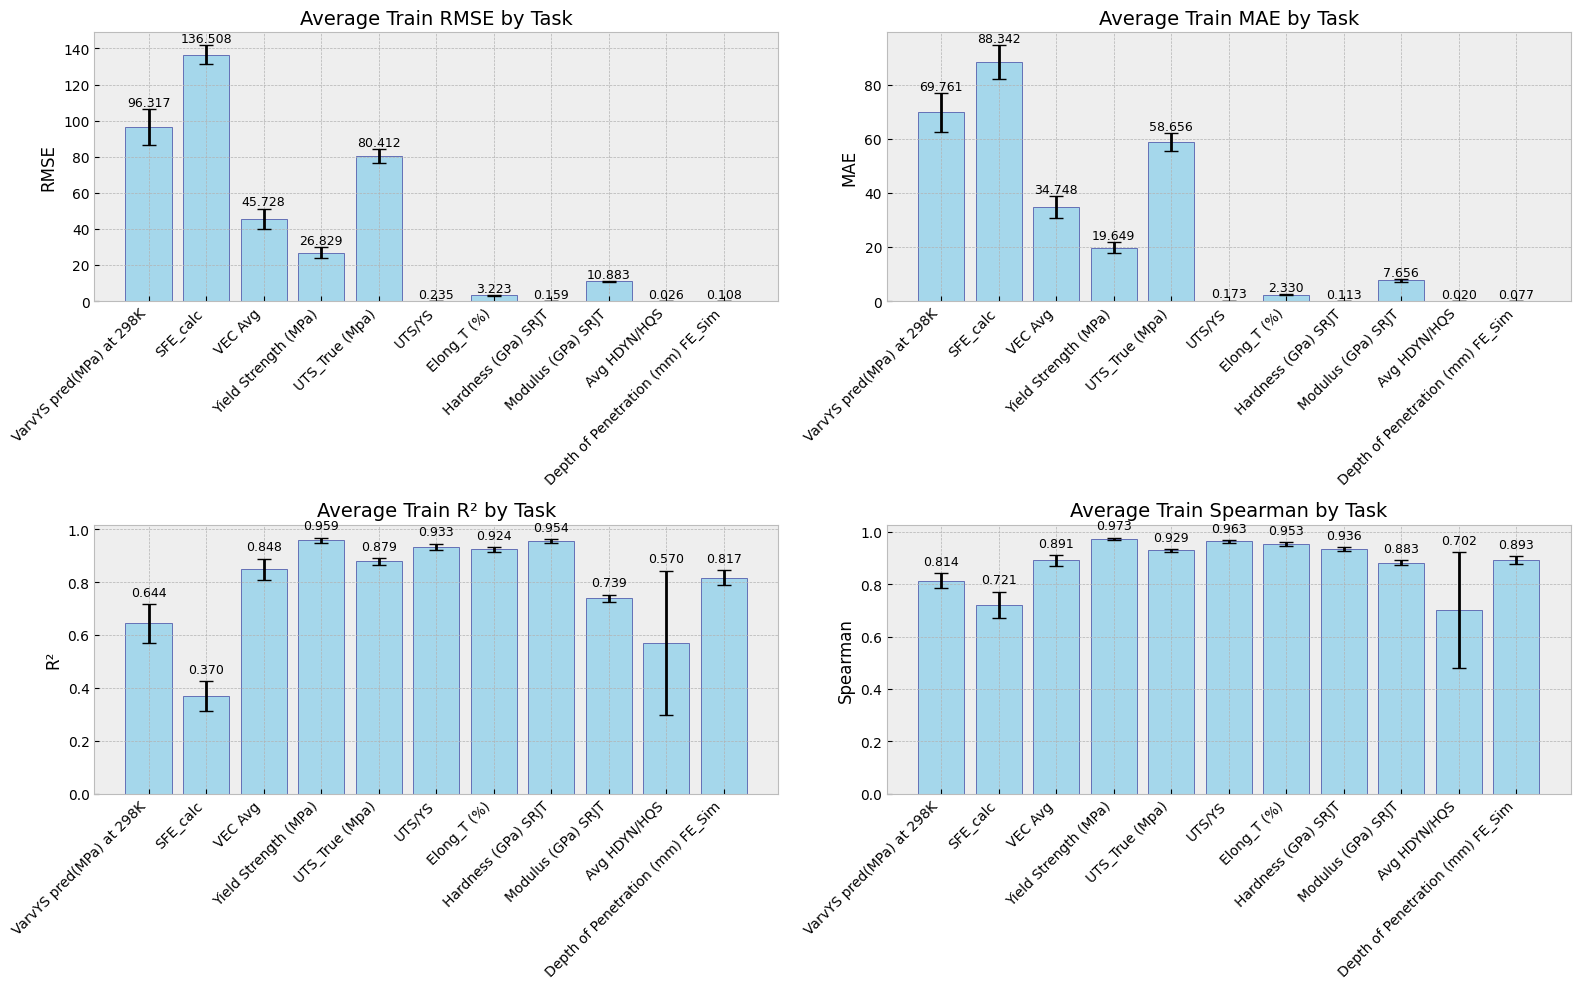

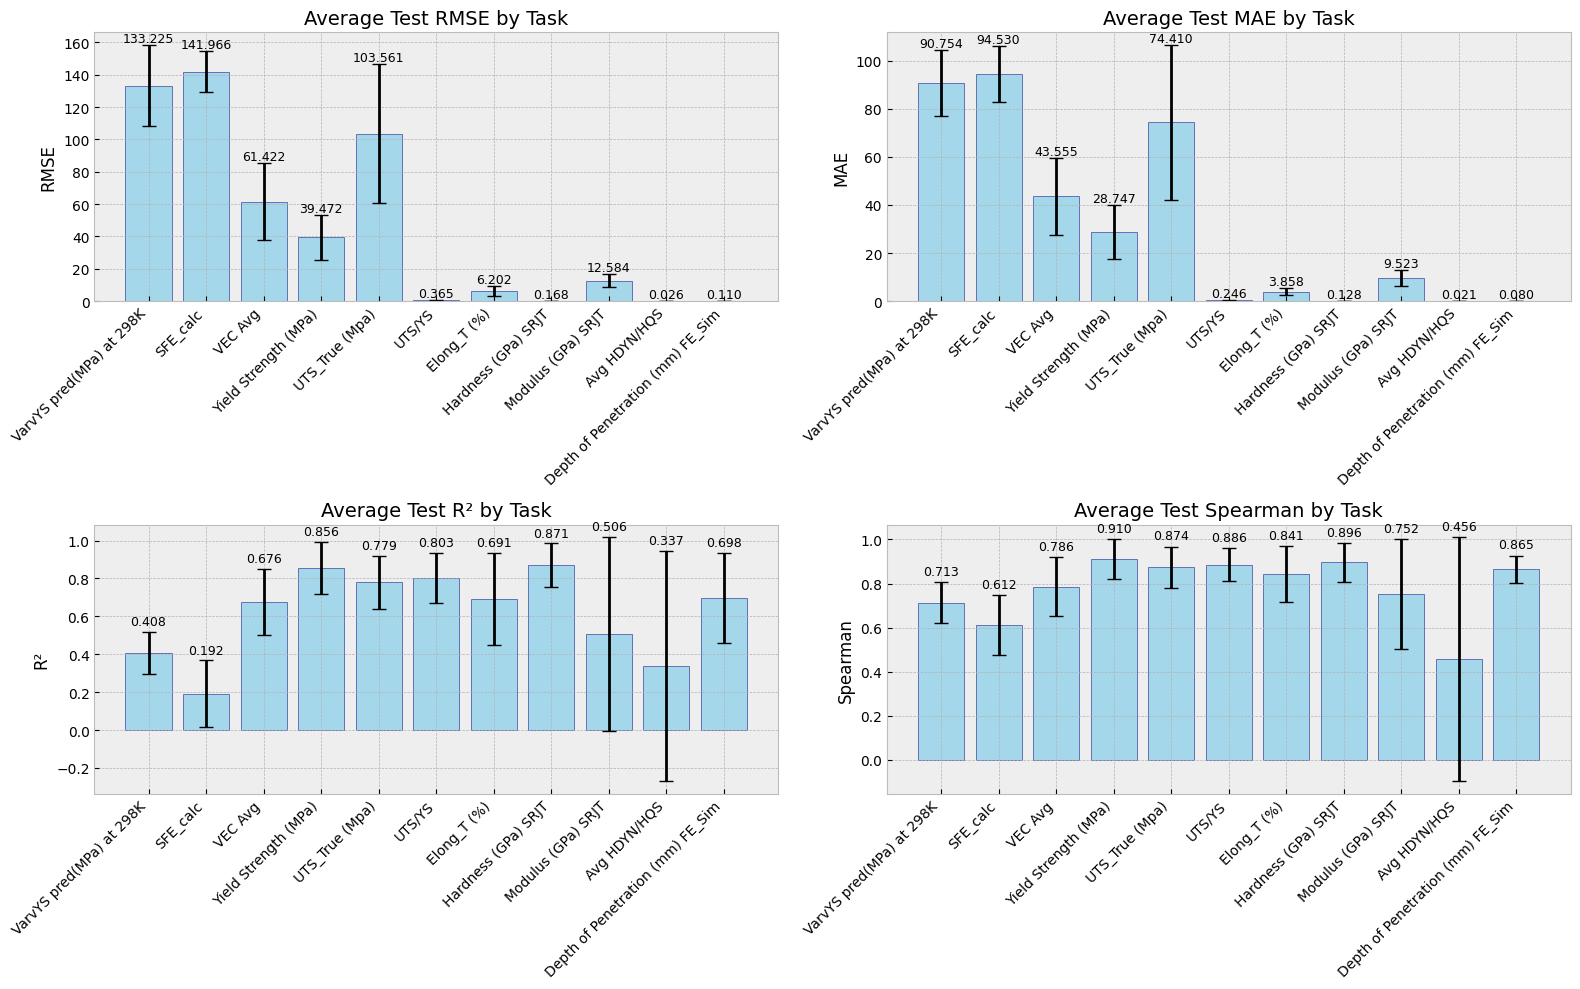


Average Train Metrics Across All Splits:

Task: VarvYS pred(MPa) at 298K (averaged over 5 splits)
----------------------------------------
Train RMSE: 96.3174 $\pm$ 9.9917
Train MAE: 69.7607 $\pm$ 7.1388
Train R²: 0.6445 $\pm$ 0.0734
Train Spearman: 0.8141 $\pm$ 0.0291
Train Kendall: 0.6245 $\pm$ 0.0334
GMAE: 0.2169 $\pm$ 0.0178
SMAPE: 21.31\% $\pm$ 1.76\%
MASE: 0.4035 $\pm$ 0.0396
RMSPE: 0.3763 $\pm$ 0.0122
Avg. Train Samples: 104.4

Task: SFE_calc (averaged over 5 splits)
----------------------------------------
Train RMSE: 136.5080 $\pm$ 5.3337
Train MAE: 88.3415 $\pm$ 6.2262
Train R²: 0.3703 $\pm$ 0.0561
Train Spearman: 0.7209 $\pm$ 0.0509
Train Kendall: 0.5402 $\pm$ 0.0469
GMAE: 3.7445 $\pm$ 0.2094
SMAPE: 73.66\% $\pm$ 2.85\%
MASE: 0.4828 $\pm$ 0.0272
RMSPE: 37.9881 $\pm$ 6.0958
Avg. Train Samples: 117.0

Task: VEC Avg (averaged over 5 splits)
----------------------------------------
Train RMSE: 45.7279 $\pm$ 5.5628
Train MAE: 34.7480 $\pm$ 4.2177
Train R²: 0.8480 $\pm$ 0.0404
Tr

In [15]:

avg_train = calculate_average_metrics(results["train"], n_splits=1, output_vars=output_vars)
avg_test = calculate_average_metrics(results["test"], n_splits=1, output_vars=output_vars)

plot_average_metrics(avg_train, set_type="Train")
plot_average_metrics(avg_test, set_type="Test")
print_average_metrics(avg_train, set_type="Train")
print_average_metrics(avg_test, set_type="Test")


Reduction=3 Main task


=== Split 0 ===
✓ Prior predictions loaded successfully
8 ___________________________
8 ___________________________
8 ___________________________
8 ___________________________
train_fullx_scaled: (717, 9)
train_fully: (717, 1)
train_fully_scaled: (717, 1)
train_fullprior: (717,)
test_fullx_scaled: (183, 9)
test_fully: (183, 1)
test_fully_scaled: (183, 1)
test_fullprior: (183,)
output_scaler: 8
7 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 6.997 - Val Loss: 7.689
Epoch 51/3000 - Train Loss: 1.885 - Val Loss: 2.725
Epoch 101/3000 - Train Loss: 1.520 - Val Loss: 2.329
Epoch 151/3000 - Train Loss: 1.437 - Val Loss: 2.275
Epoch 201/3000 - Train Loss: 1.399 - Val Loss: 2.240
Epoch 251/3000 - Train Loss: 1.367 - Val Loss: 2.219
Epoch 301/3000 - Train Loss: 1.348 - Val Loss: 2.217
Early stopping at epoch 305
[27.45646128 27.6566765  15.00404844 16.73182022 33.99605309 32.89131963
 18.53405695 19.64020113 21.60779011 19.96151078 11.00953076 18.

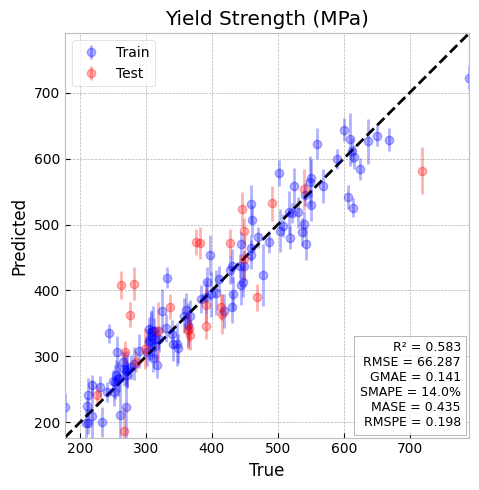

[ -7.93346889  13.63733932  -9.79546982  12.45913824  17.03077394
 -62.28338827 -20.14838601  17.94209285  64.69375363 -57.16630974
 -35.5026592    9.28262998 -39.30900572 -17.98371066  40.18733672
  12.83411268   7.86368824   2.73018593  42.18230322 -26.91942994
  63.85858286   9.03184297  82.55861413 -64.16792423  -5.27856386
 -38.83447256  -2.75161869  51.80727524  18.37198451  -5.14006642
  50.46836573 -48.53845941 -37.92809731 -46.52409393 -41.36885941
  67.94710347   0.1523152  -15.72675254 -28.89743471 -37.57405319
 -10.50252884 -37.18069879   4.49952546  -4.16084619   3.93415484
 -17.03945275 -14.88992451  -9.05634798 -21.68584192  69.71090209
 -36.6988876  -18.45448796 -24.85670865 -51.43108328 -25.40108461
 -10.32525319  -7.2412608   18.0756197  -24.70521843  14.43973711
 -17.01986556  16.78860751  32.90869932  88.63259617  28.67867407
  20.61531445 -38.88894214  14.49519947  39.03660969  11.31961914
  -0.73582715  64.87156431   1.11019522   0.31570392 -10.75011035
   5.42284

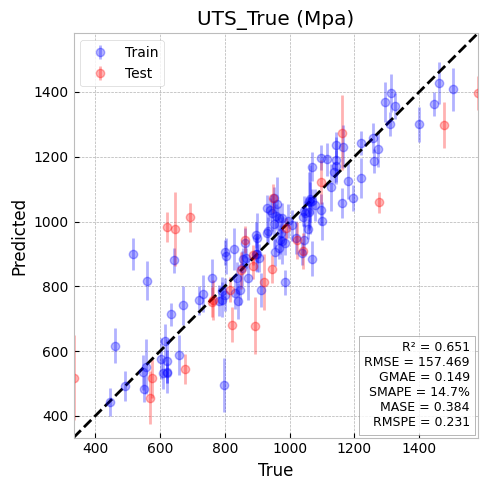

[-0.17152401 -0.11896063  0.04828187 -0.07868056 -0.1667183  -0.28357373
 -0.29373292 -0.05285509  0.05831401 -0.22144517 -0.16464404 -0.1229124
 -0.22750547 -0.068858   -0.08925863 -0.15778749 -0.1214862  -0.04019313
 -0.13383679 -0.12928932 -0.04504112 -0.0836574   0.04264448 -0.20807584
 -0.06699245 -0.23041669 -0.21025934 -0.1412624  -0.18405485 -0.14801367
 -0.1562464  -0.17135269 -0.1655311  -0.22474231 -0.30698602  0.03022582
 -0.13811712 -0.19166279 -0.15856393 -0.22918461 -0.18074703 -0.13952565
 -0.1282553  -0.052948   -0.06072438 -0.13754234 -0.08286575 -0.13970628
 -0.25342921 -0.00567268 -0.18517025 -0.20493549 -0.15138002 -0.29308843
 -0.22480305 -0.18913528 -0.15898619 -0.09080457 -0.23149006 -0.255213
 -0.09608822  0.06715402 -0.09634913  0.03496803 -0.3701689  -0.15192113
 -0.259508   -0.0965807  -0.02739595 -0.19094212 -0.11695104  0.01224989
 -0.19201764 -0.17248121 -0.26535288 -0.09188583 -0.26504651  0.00594642
 -0.21605352 -0.12378258 -0.13640527 -0.20706095 -0.32

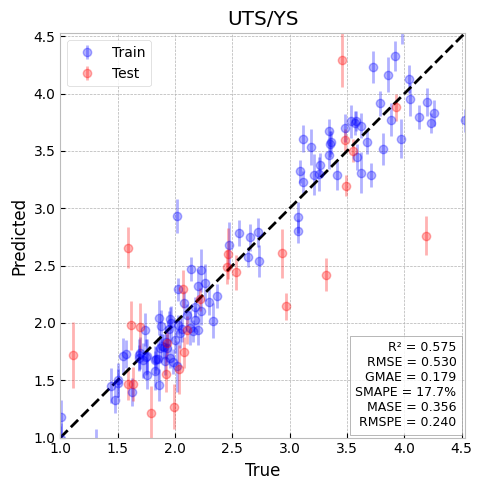

<ipython-input-17-1588568327>:2153: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-17-1588568327>:2184: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


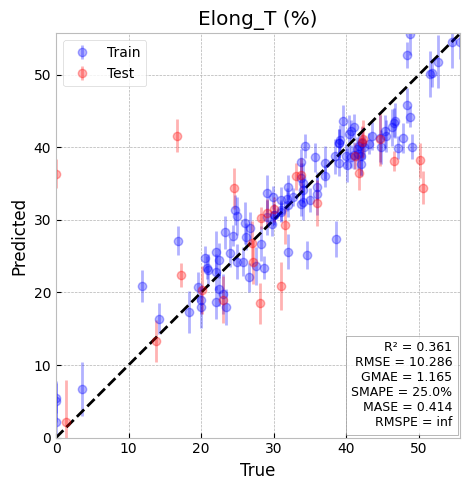

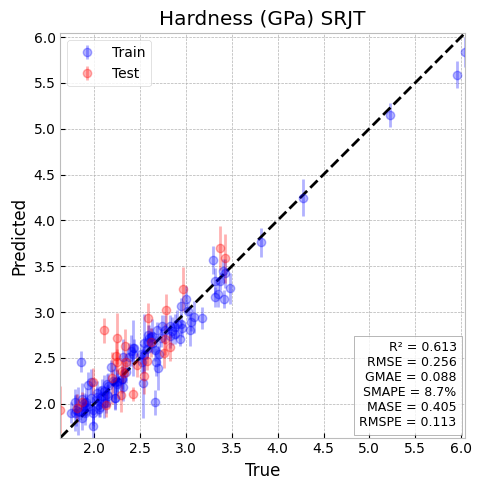

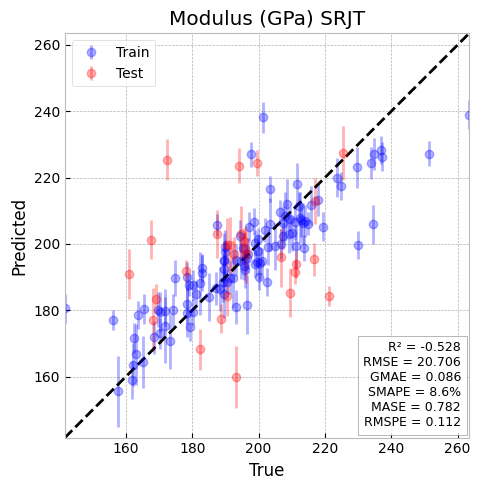

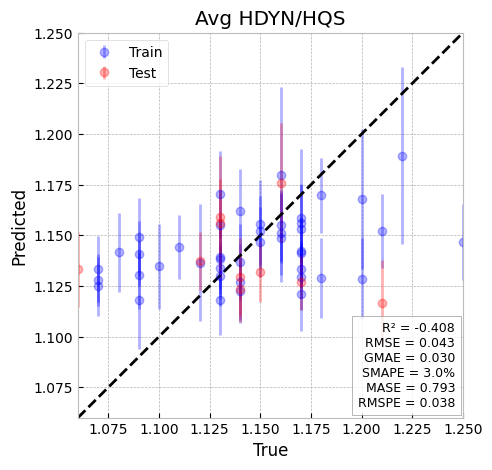

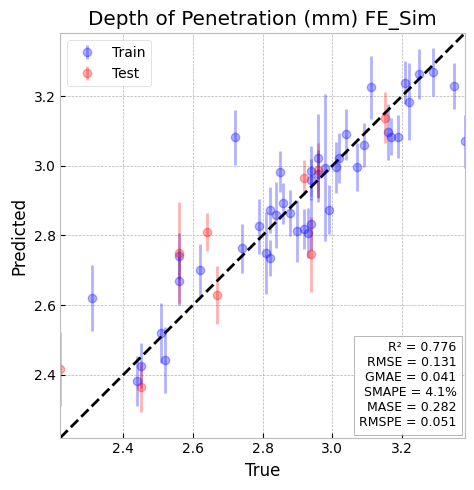


=== Split 1 ===
✓ Prior predictions loaded successfully
8 ___________________________
8 ___________________________
8 ___________________________
8 ___________________________
train_fullx_scaled: (717, 9)
train_fully: (717, 1)
train_fully_scaled: (717, 1)
train_fullprior: (717,)
test_fullx_scaled: (173, 9)
test_fully: (173, 1)
test_fully_scaled: (173, 1)
test_fullprior: (173,)
output_scaler: 8
7 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 6.938 - Val Loss: 7.303
Epoch 51/3000 - Train Loss: 1.932 - Val Loss: 2.459
Epoch 101/3000 - Train Loss: 1.588 - Val Loss: 2.112
Epoch 151/3000 - Train Loss: 1.497 - Val Loss: 2.006
Epoch 201/3000 - Train Loss: 1.448 - Val Loss: 2.031
Epoch 251/3000 - Train Loss: 1.419 - Val Loss: 1.981
Early stopping at epoch 282
[19.96797192 13.30341776 19.94651187 23.5119735  10.15068572  3.64040946
 35.01683242 14.28288773 18.73226868 13.97952241 -1.57943048 29.63542275
  5.04707398 -8.93545727 17.83442078 13.7910

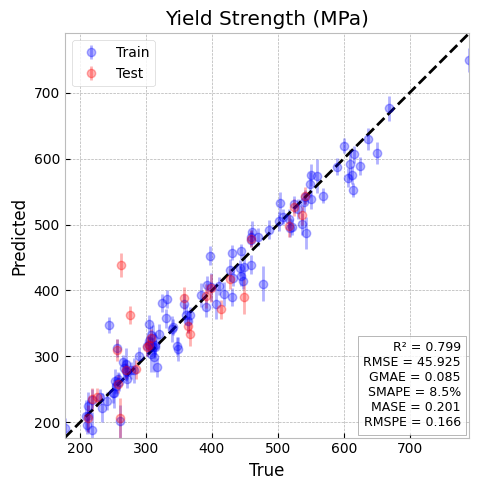

[ 15.68235261   7.44193083  13.6913312    5.35570612  34.03363027
  17.55665241  25.91811619  13.06871246  19.51844445  -0.83442464
  14.85297026  -2.07619594  13.39268208  29.97659351 -10.30723853
   8.6827202   12.21916318  -3.33424692  -5.9300696  -33.54212104
  15.56784563 -14.34327923  14.48010397   5.26204912   9.39628409
  -4.34362239  12.75837594  32.98072639  39.19920634   7.48407577
   0.16935784   1.20280365   2.13420111   7.40451903  21.89202596
  -8.32737059  18.22281988  30.34744329  -1.77696186  14.49077312
   9.4615475    8.06345113   2.9990747   11.93291043  18.18966724
  -2.27284699  12.70716163  -6.53910314  19.2850874   16.97140386
  -7.57588916   7.51538726  14.88419047   6.26105497   5.76119289
  11.42082132  11.65250453 -17.22514871  -3.35877949  -4.96671618
   8.89902833  24.16435928  16.89258327 -10.99276846  46.10497537
  32.86349205 -14.89030958  11.57838682   1.11125788   3.67667035
   2.93520576  -5.69287287   0.5998941    8.45324562  -2.69909433
   9.40260

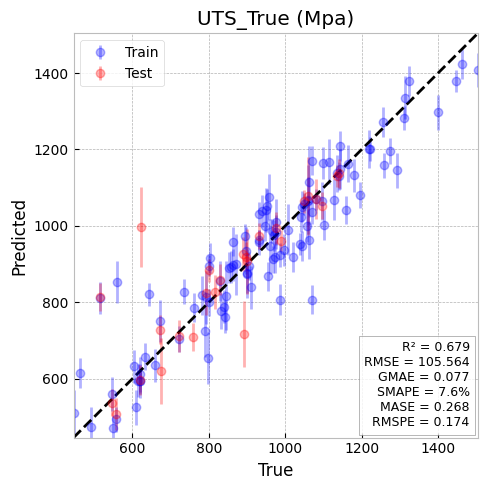

[ 0.00099301 -0.02631173 -0.15563186 -0.18388586 -0.04838573 -0.10831016
 -0.21609004 -0.07470831 -0.01724979 -0.10394509  0.10602422 -0.15519282
  0.03956305  0.13959823 -0.04789274  0.01893313  0.00270434 -0.1295
 -0.16626834 -0.1718542  -0.05034766 -0.11448894  0.10741484 -0.0263634
 -0.0447635   0.11136617 -0.05101282 -0.14082675  0.06057946 -0.01127884
 -0.04131646  0.1105014  -0.17670075 -0.01874272  0.0516421   0.02442291
 -0.09186002  0.03790063 -0.14311517 -0.13710819 -0.0855432   0.0397751
  0.00533391 -0.08126844 -0.05364171  0.09153645 -0.02876336 -0.01570258
  0.11600841  0.03781705 -0.21979028 -0.00756778  0.13172946  0.04226276
  0.02928602 -0.11153399 -0.0990694  -0.15671843 -0.15963702 -0.03873533
  0.10082969 -0.00205016 -0.09696049 -0.03640358 -0.13613518 -0.11244044
 -0.05883165 -0.06627433 -0.07470746 -0.12297874 -0.02251554  0.05301775
  0.01124741 -0.24453829 -0.06193466 -0.06507056 -0.07607195  0.0162605
 -0.30323394 -0.02298649  0.03909429 -0.09406761  0.000590

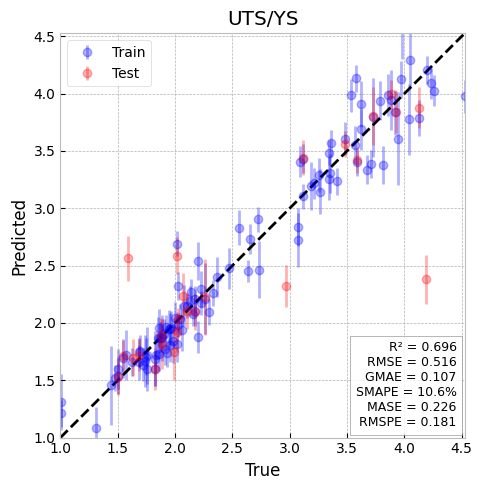

<ipython-input-17-1588568327>:2153: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-17-1588568327>:2184: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


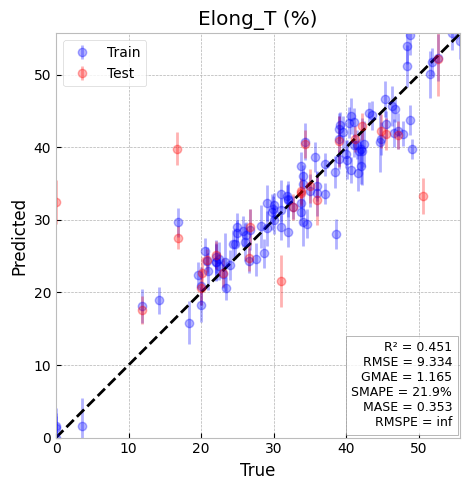

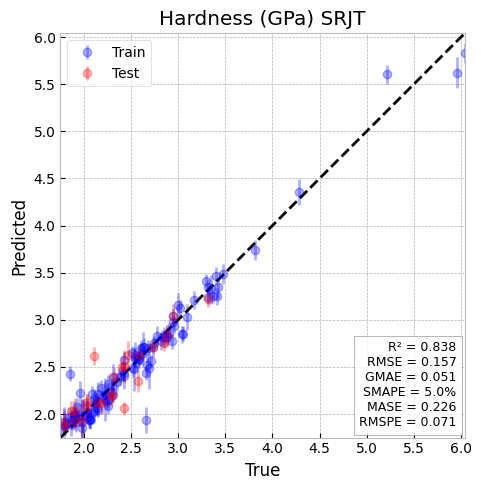

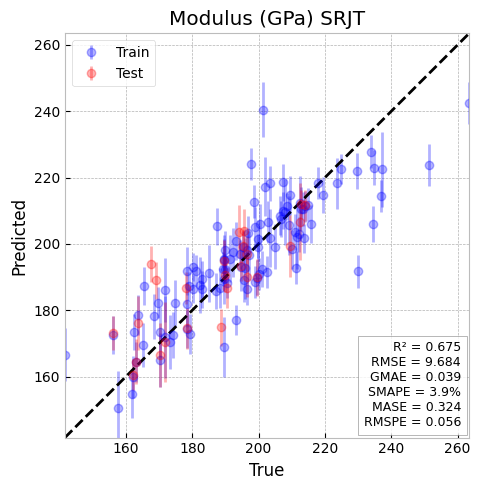

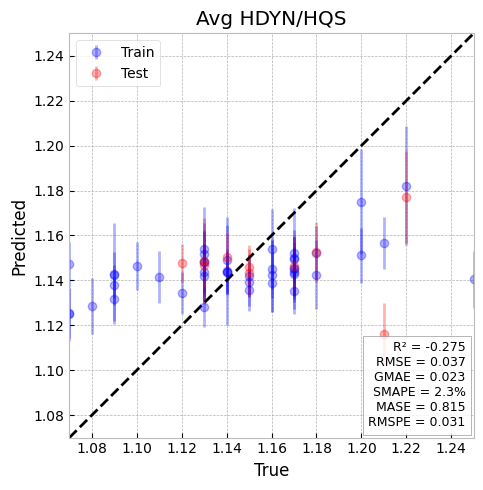

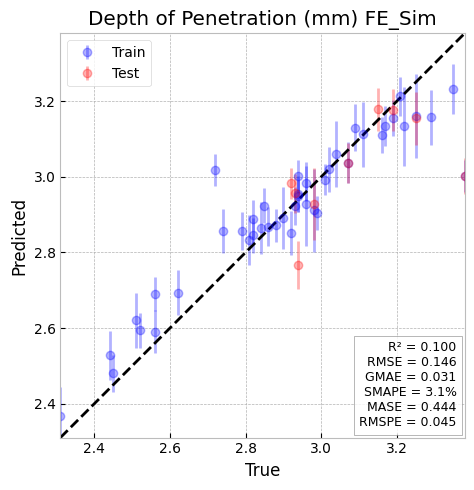


=== Split 2 ===
✓ Prior predictions loaded successfully
8 ___________________________
8 ___________________________
8 ___________________________
8 ___________________________
train_fullx_scaled: (717, 9)
train_fully: (717, 1)
train_fully_scaled: (717, 1)
train_fullprior: (717,)
test_fullx_scaled: (182, 9)
test_fully: (182, 1)
test_fully_scaled: (182, 1)
test_fullprior: (182,)
output_scaler: 8
7 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 6.547 - Val Loss: 6.101
Epoch 51/3000 - Train Loss: 2.032 - Val Loss: 1.873
Epoch 101/3000 - Train Loss: 1.693 - Val Loss: 1.556
Epoch 151/3000 - Train Loss: 1.607 - Val Loss: 1.480
Epoch 201/3000 - Train Loss: 1.557 - Val Loss: 1.438
Epoch 251/3000 - Train Loss: 1.524 - Val Loss: 1.425
Epoch 301/3000 - Train Loss: 1.498 - Val Loss: 1.385
Epoch 351/3000 - Train Loss: 1.490 - Val Loss: 1.390
Epoch 401/3000 - Train Loss: 1.485 - Val Loss: 1.390
Early stopping at epoch 423
[-7.32833887e-01  6.77686287e+0

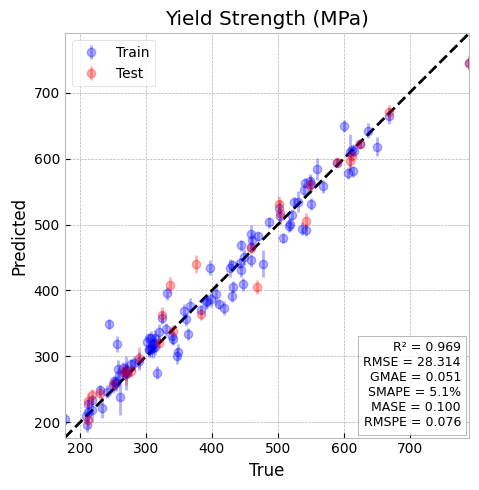

[ 11.86856545  18.59448647  -9.05531856  38.99647995 -27.29946004
 -59.82776555   4.00495705 -13.45503033  -9.57496935  24.95747908
  27.76992775 -33.77578352   7.22223775 -48.96621055   4.81299085
  21.99225346  -3.11577545 -19.61067268 -35.54157832  28.90268551
 -11.51801671 -51.82053435 -20.73015639  -0.4061249   -5.98071697
   6.22654278 -17.42292261  -2.26313243  11.1756512  -21.56774212
 -35.255273   -15.81735864 -40.44395215  -9.70171158 -20.54749119
  19.8931863   -6.11718319  -3.84876956   7.30127931  25.96597216
 -16.49850894  -0.5258244  -27.80455106  -8.92033512  -2.6212308
   3.36111622 -13.25588814 -30.39614382 -41.70413904 -29.90627701
 -63.0433754   13.9745345  -12.1749046   15.15398495  16.31254079
  55.54002529  14.18886058 -31.20836283  -7.738956     4.5292496
 -33.34958352 -10.62277474 -13.94710832  -4.37437044 -41.69737038
 -10.44095172 -23.37341615   0.88277679  19.32062294 -29.8761527
  -1.55235353  23.65582672  18.51351242 -29.70175494  -2.84405415
  10.67235589

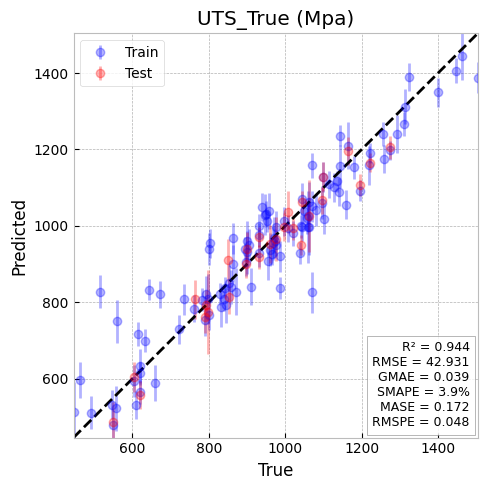

[ 8.15326360e-02  6.29623291e-02 -1.34289814e-01  2.20396096e-01
 -9.59850736e-01 -6.63876093e-01  1.76031812e-02 -6.50434905e-02
 -1.13487503e-01  1.09545723e-01  1.45451680e-01  4.49427038e-02
 -1.89129427e-01 -1.29242094e-01  9.99091214e-02  9.29149050e-02
 -9.15059070e-02 -4.42834873e-02 -2.67057064e-01 -2.12983106e-02
 -8.44593011e-02 -3.90315015e-01  1.79802625e-02  1.46798747e-01
  3.43183128e-02 -1.22080689e-01 -6.64279225e-02 -7.35098618e-02
  4.03360691e-02 -5.48898855e-02 -1.71332253e-01 -2.69958801e-01
 -1.02137215e-01 -5.26077120e-02 -3.24429112e-02  1.99298878e-02
 -2.27829647e-02  8.89630437e-02  1.08342407e-01  8.26346340e-02
 -5.66389011e-02 -7.96960695e-02 -9.89524261e-03 -8.41537160e-02
  9.48238962e-03  1.27941006e-01 -7.64798798e-02 -7.22290535e-02
 -2.60280296e-01 -6.48939606e-02 -2.98721327e-01 -1.18229007e-02
 -2.80981500e-01 -6.70436207e-02  1.14392280e-01  1.78015419e-01
  7.96867635e-02 -2.10355252e-01 -4.29594127e-03 -7.83247932e-03
 -1.39539913e-01 -3.01498

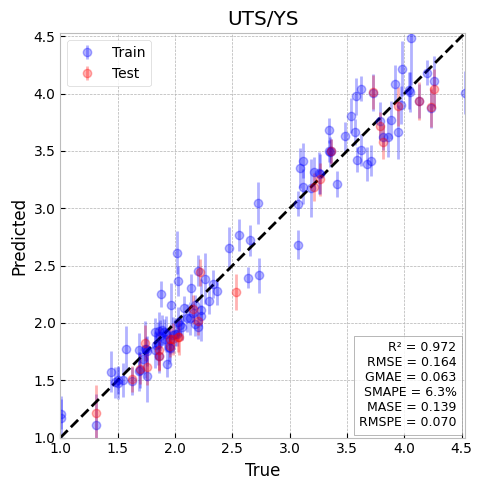

<ipython-input-17-1588568327>:2153: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-17-1588568327>:2184: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


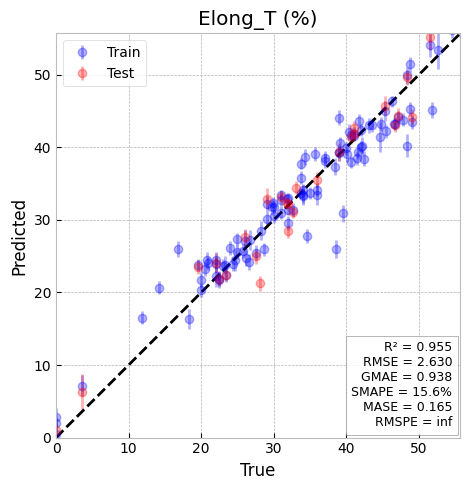

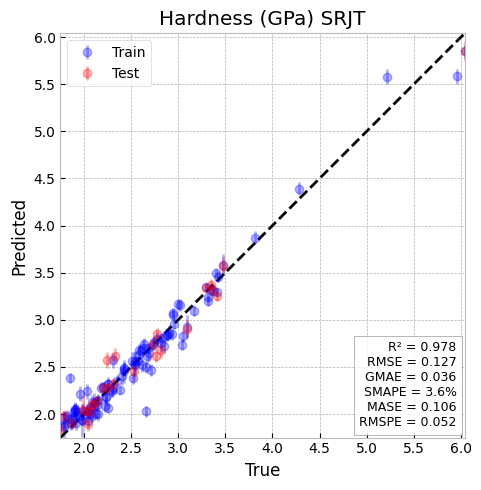

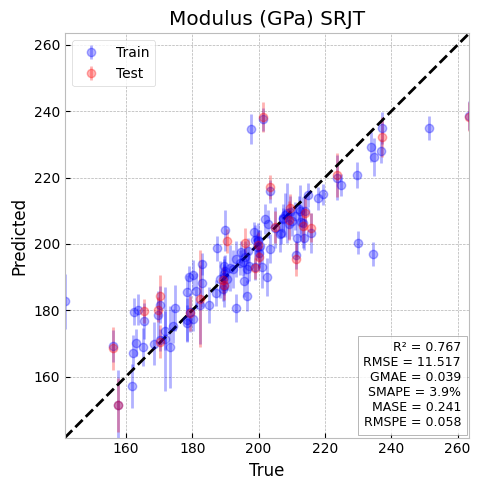

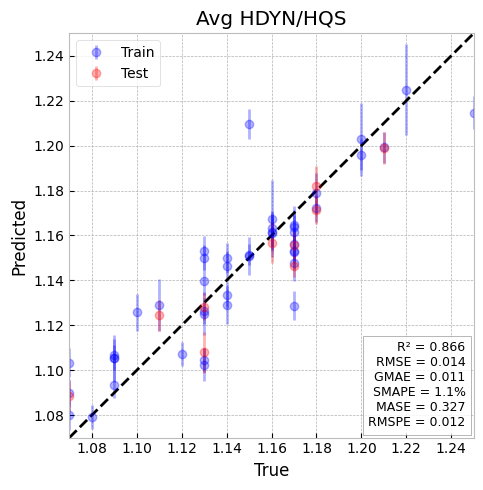

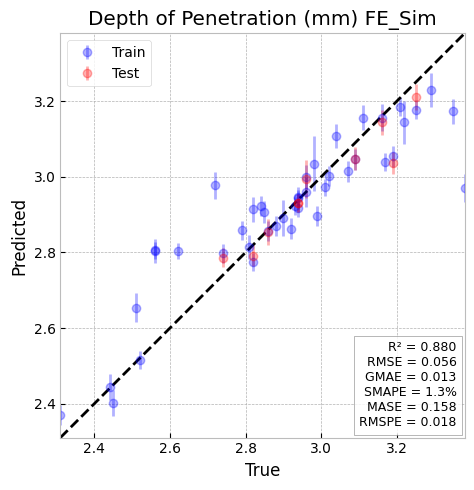


=== Split 3 ===
✓ Prior predictions loaded successfully
8 ___________________________
8 ___________________________
8 ___________________________
8 ___________________________
train_fullx_scaled: (717, 9)
train_fully: (717, 1)
train_fully_scaled: (717, 1)
train_fullprior: (717,)
test_fullx_scaled: (180, 9)
test_fully: (180, 1)
test_fully_scaled: (180, 1)
test_fullprior: (180,)
output_scaler: 8
7 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 5.644 - Val Loss: 5.427
Epoch 51/3000 - Train Loss: 1.901 - Val Loss: 1.897
Epoch 101/3000 - Train Loss: 1.617 - Val Loss: 1.645
Epoch 151/3000 - Train Loss: 1.547 - Val Loss: 1.571
Epoch 201/3000 - Train Loss: 1.507 - Val Loss: 1.566
Epoch 251/3000 - Train Loss: 1.485 - Val Loss: 1.557
Early stopping at epoch 284
[ 0.45948769  8.11497216  2.29853826  9.06856453 18.19138694 21.69676576
 15.31177514  0.13626298  4.83636532  5.5272585  -6.34815661  9.73540273
  1.03760115 -5.94556036 -3.24539557 -3.2176

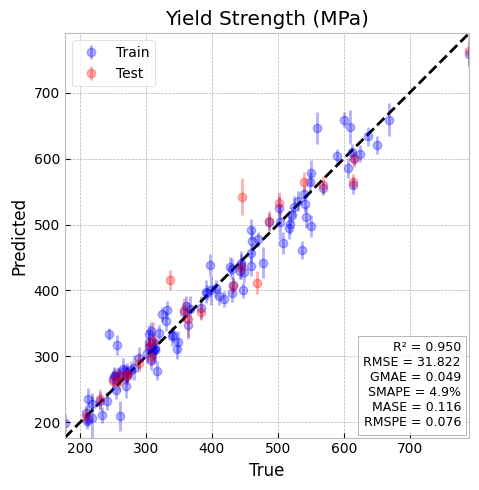

[-34.77244154   0.16768143 -44.66601605 -22.28725481 -42.70561706
 -44.90454694 -35.71677888  12.21960873  -2.36489638 -17.085262
   4.93071186 -42.4545156   -5.6311894   12.43444684  11.6390414
   3.66243674   0.51388952   2.91874232 -22.08816469 -27.23120713
  10.87758155  -7.81659823  13.2615616  -25.22355261 -10.77398245
   9.13290362 -31.684807    -7.90349536  17.72401388  10.32495715
 -14.57224034  -1.55303167  -1.14737815 -10.94611056 -11.84371277
   1.27415589 -17.35065759  24.80945311   2.00175     -1.6165272
   0.31392463 -46.4438294    3.36943996  10.16677389  -1.34779109
   2.70480986 -16.65590989 -28.52974079  -9.57169953  12.91599155
 -14.68915401 -19.01669681  -5.71339434  10.69428797 -28.82285604
 -12.76564944  -0.18190707 -16.82907119 -31.67557228 -29.02333013
   5.77376796  -1.9639336    5.42527871   8.59083317 -59.23918401
  12.38724959 -12.17416957 -10.78214985  -7.74521912  -0.3884681
   7.760688    12.43967958   9.10168504 -55.11857842  10.16820361
  -1.57760584 -

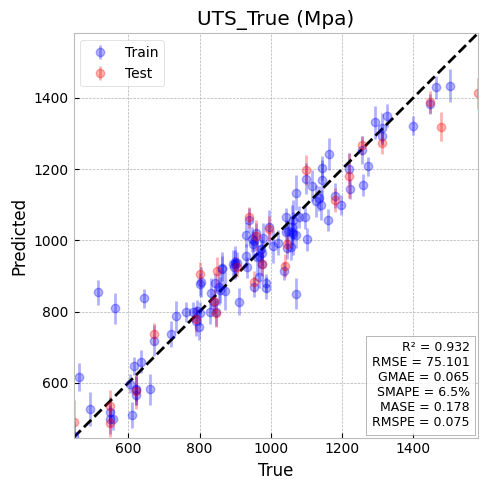

[-3.73411255e-02 -4.65848980e-03 -1.97605260e-01 -5.67058667e-02
 -3.13735904e-01 -1.64632822e-01 -1.21568204e-01  1.18388559e-01
  2.87795581e-02 -1.04724581e-01  1.38707963e-01 -1.31357055e-01
  8.22351535e-02  1.15321336e-01  7.80591684e-02  7.95976286e-02
 -3.88954748e-02 -4.98307920e-02 -1.53512509e-01 -2.29900745e-01
  9.73971372e-02 -1.74644635e-01  7.98753761e-02 -2.30520688e-01
 -1.12625068e-02  9.30967740e-02 -2.09325977e-01 -1.09917372e-01
  1.02595251e-01  1.00195902e-01 -6.66822091e-02 -3.43520679e-02
 -5.16961312e-02 -4.43192145e-02 -6.16546320e-02 -1.15080178e-02
 -7.02983306e-02  1.11752513e-01 -7.76823963e-02  3.96915755e-02
  4.44819879e-02 -1.91706256e-01  8.53638566e-02 -2.10971355e-02
  1.26497267e-01  1.06043933e-01 -2.60880593e-02 -1.95160542e-01
 -3.97455440e-04  6.95216578e-02 -1.99649134e-01 -7.84231515e-02
  3.18171511e-02  4.50115853e-02 -6.39803398e-02 -1.29076521e-01
  5.48742436e-02 -7.79067619e-02 -9.36603116e-02 -3.94150363e-01
  5.02209856e-02 -8.08359

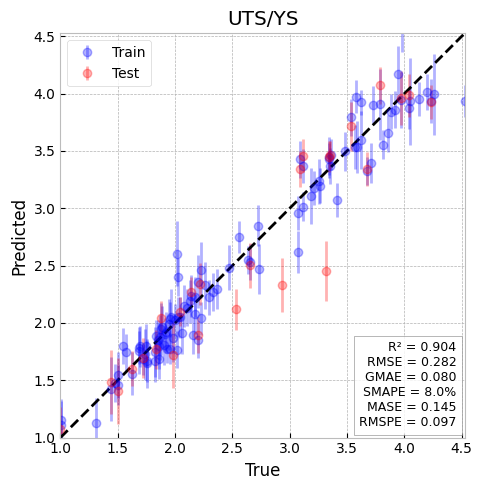

<ipython-input-17-1588568327>:2153: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))
<ipython-input-17-1588568327>:2184: RuntimeWarning: divide by zero encountered in divide
  test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))


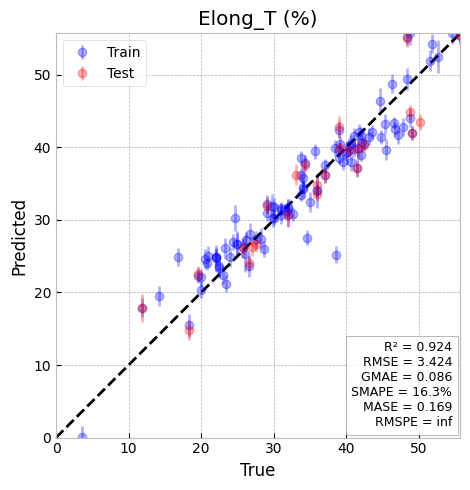

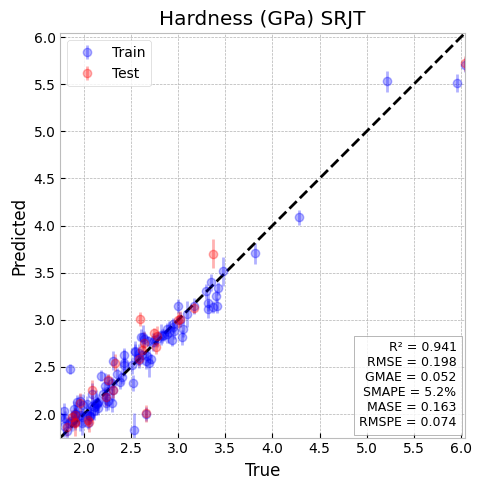

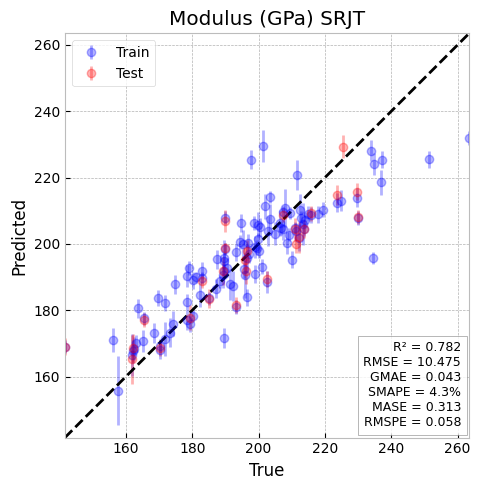

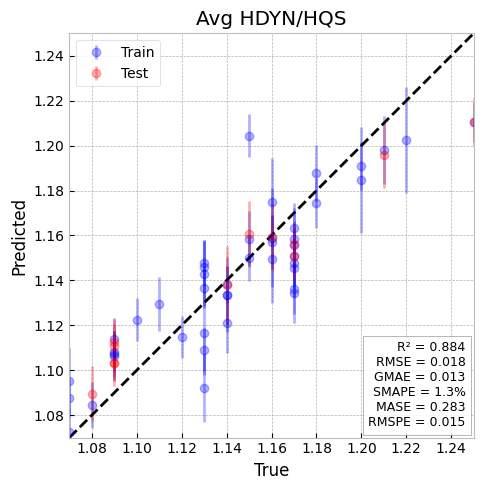

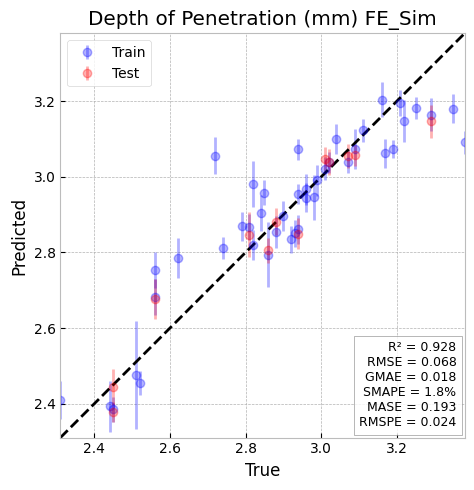


=== Split 4 ===
✓ Prior predictions loaded successfully
8 ___________________________
8 ___________________________
8 ___________________________
8 ___________________________
train_fullx_scaled: (717, 9)
train_fully: (717, 1)
train_fully_scaled: (717, 1)
train_fullprior: (717,)
test_fullx_scaled: (191, 9)
test_fully: (191, 1)
test_fully_scaled: (191, 1)
test_fullprior: (191,)
output_scaler: 8
7 __________________________final i_______________________________--
Epoch 1/3000 - Train Loss: 5.622 - Val Loss: 5.597
Epoch 51/3000 - Train Loss: 1.880 - Val Loss: 2.055
Epoch 101/3000 - Train Loss: 1.597 - Val Loss: 1.753
Epoch 151/3000 - Train Loss: 1.535 - Val Loss: 1.685
Epoch 201/3000 - Train Loss: 1.489 - Val Loss: 1.675
Epoch 251/3000 - Train Loss: 1.462 - Val Loss: 1.654
Epoch 301/3000 - Train Loss: 1.444 - Val Loss: 1.655
Epoch 351/3000 - Train Loss: 1.436 - Val Loss: 1.629
Epoch 401/3000 - Train Loss: 1.403 - Val Loss: 1.622
Early stopping at epoch 443
[  1.15636643   0.21036119   1.

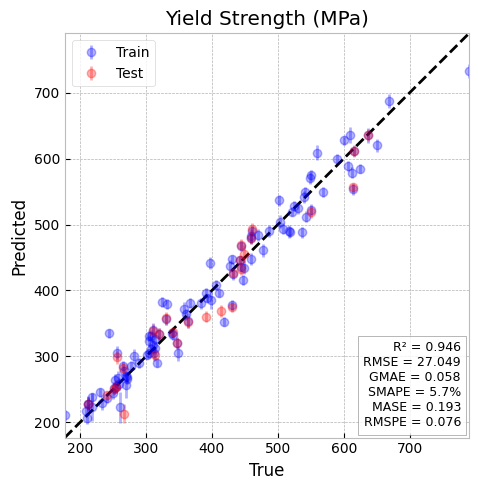

[ 1.23872691e+01  3.55264141e+00  2.45307683e+01 -5.11230027e+01
 -1.26110751e+02 -6.48720677e+01  2.84975086e+01 -2.11862003e+00
 -1.16631460e+01  1.82051015e+01 -6.88694791e+00  1.29408173e+01
 -1.57419608e+01  2.73933040e+01 -1.04201110e+01  1.19078269e+01
  1.21424955e+01 -5.69172561e+00  2.43290221e+01  3.62040437e+01
 -6.95216305e+00 -8.46940609e+00  2.75079498e+01 -1.34478245e+01
 -1.06569446e+01 -2.25462887e+01 -3.82650040e+01  1.11625928e+01
  2.35558113e+01  8.96935751e+00 -3.14344744e+01  8.54690100e+00
  1.99739843e+01  2.19298936e+01 -6.58425869e+00 -1.13762829e+01
  9.31081013e-01  2.00973968e+01 -1.26396491e+01  2.01728555e+01
  2.58319478e+00 -2.43482631e+01  2.42495298e+01  2.68437718e+01
 -2.41647833e+01  4.55625634e+00 -4.35734931e+01 -1.79969233e+01
  3.19189096e+01  4.47819263e+00  7.76713074e+00 -3.91775614e+01
  1.98260205e+01  2.05978748e+01 -4.44865075e+01  2.49113667e+00
  3.31953574e+00  3.03187988e+01  1.35308109e+00 -1.28308447e+01
  3.55402223e+00 -1.12326

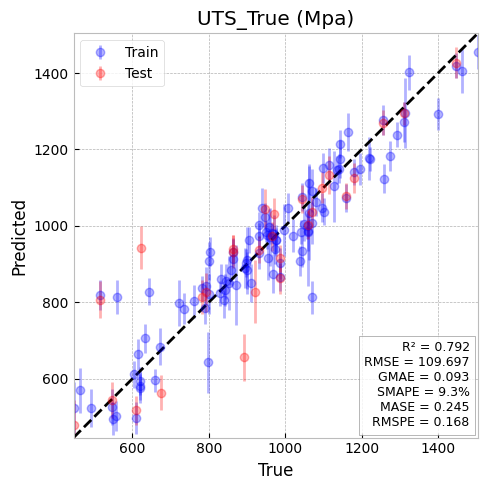

[-1.12807627e-01  5.73424775e-02  1.01219714e-01  1.18864432e-01
 -1.42948858e+00 -1.05575380e+00 -1.71627465e-01  7.93923697e-02
  9.51332704e-02 -1.42679086e-02  5.01874711e-03  2.62495627e-02
 -6.93810888e-03 -4.97408277e-02  3.28462147e-02  1.49627866e-01
  4.93150427e-03 -4.80144687e-02  3.32517726e-02 -2.34932697e-01
  4.33891852e-03  1.05456145e-02  7.62950921e-02 -1.10225560e-01
  6.76662443e-02 -4.24152983e-02 -2.89532102e-02 -7.75390912e-02
  2.85787276e-03  6.72941337e-02  2.67817759e-02 -4.29907710e-01
  3.18625806e-02  2.51654768e-02  8.05772017e-02 -1.12096489e-03
  1.65568985e-02  6.80682003e-02 -9.83148529e-02 -1.54715594e-02
  6.44243619e-02  7.24944223e-02 -2.13750638e-02  1.56568590e-02
  8.96637589e-03  3.87688219e-02  1.06254081e-01  1.09032253e-01
 -2.72095972e-01  7.82124474e-03  1.46861628e-03  1.37668836e-02
 -2.35005431e-01 -7.22393554e-02  3.72595314e-02 -8.27164674e-02
  1.36262549e-01  4.73138815e-02  4.41534314e-02 -5.06605956e-02
  2.48289546e-02 -1.90236

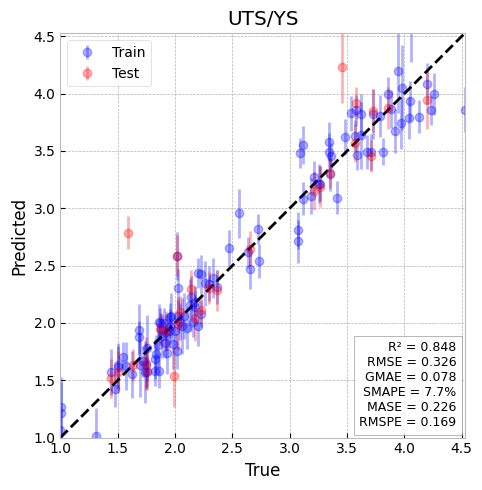

<ipython-input-17-1588568327>:2153: RuntimeWarning: divide by zero encountered in divide
  train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))


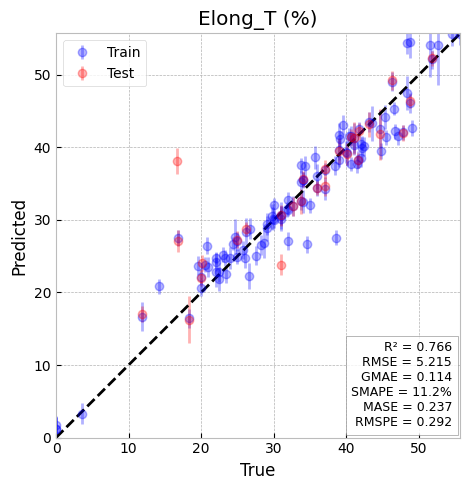

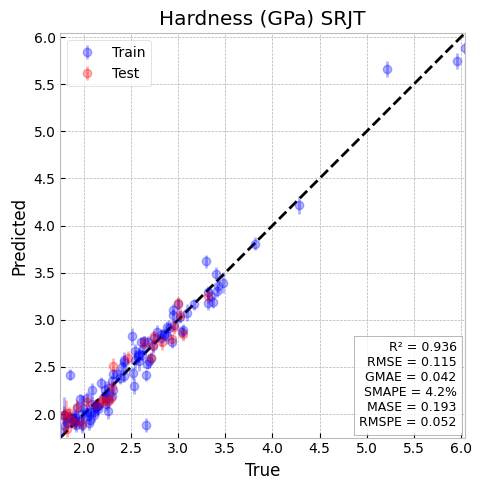

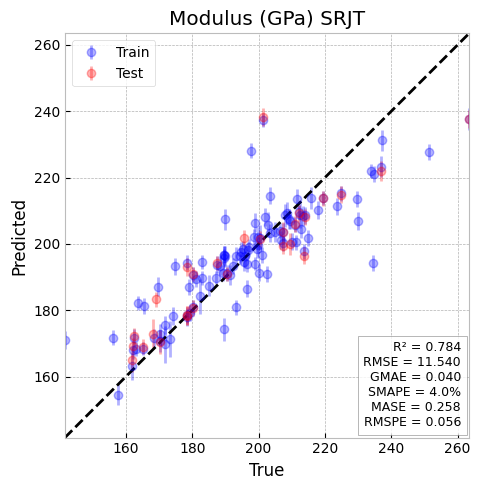

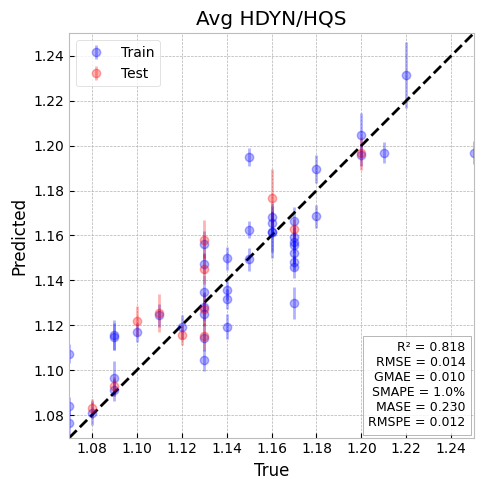

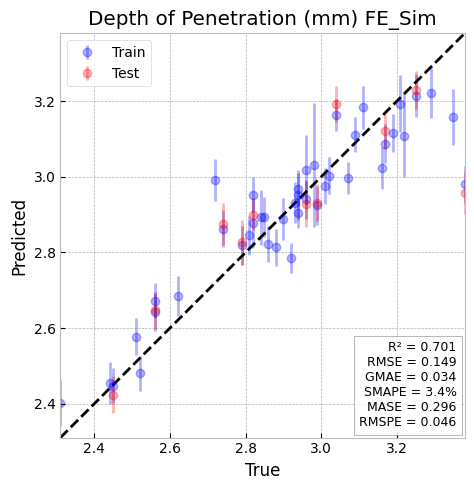

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


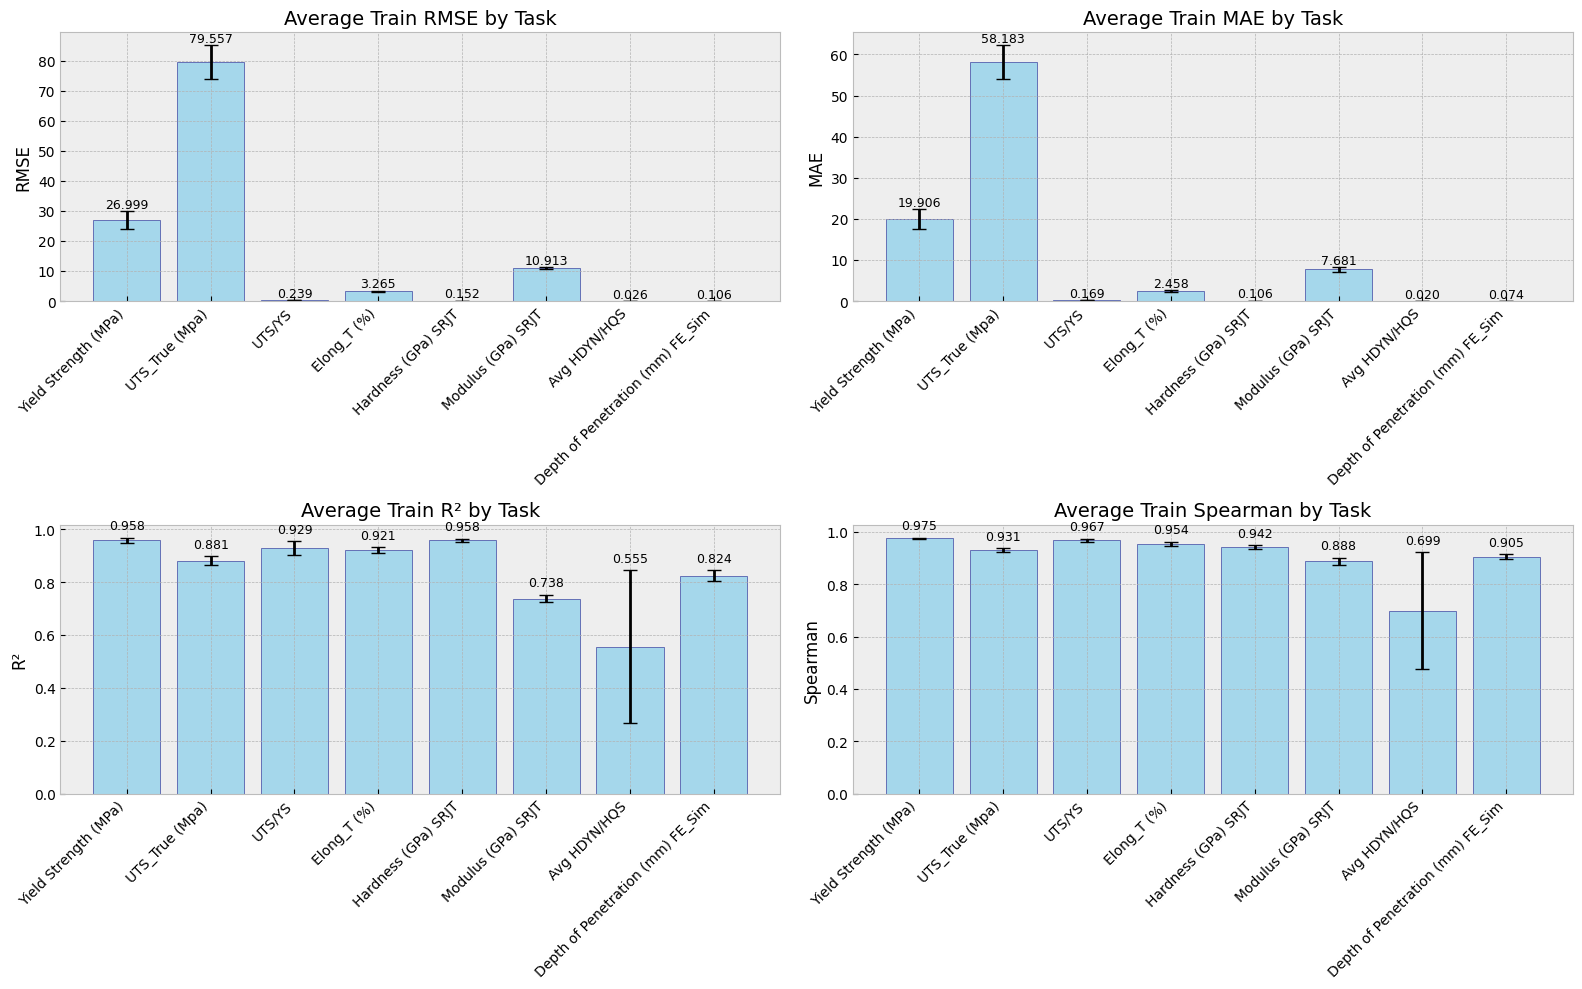

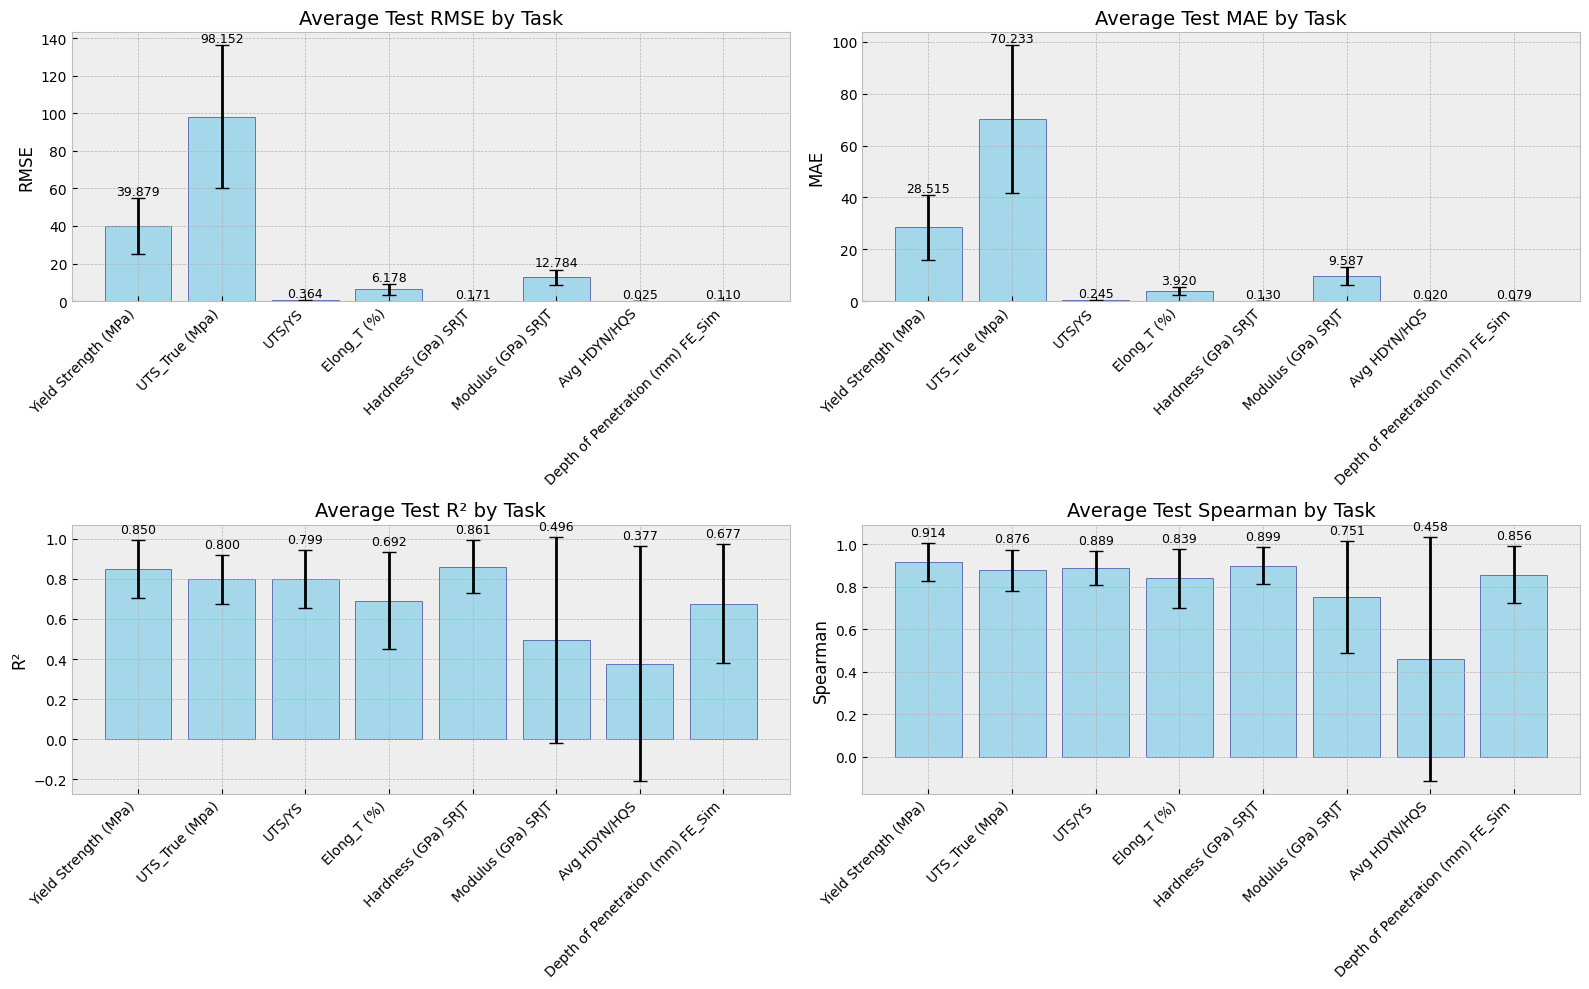


Average Train Metrics Across All Splits:

Task: Yield Strength (MPa) (averaged over 5 splits)
----------------------------------------
Train RMSE: 26.9989 ± 3.0074
Train MAE: 19.9060 ± 2.4751
Train R²: 0.9585 ± 0.0098
Train Spearman: 0.9750 ± 0.0033
Train Kendall: 0.8775 ± 0.0119
GMAE: 0.0530 ± 0.0066
SMAPE: 5.29% ± 0.66%
MASE: 0.1154 ± 0.0144
RMSPE: 0.0778 ± 0.0072
Avg. Train Samples: 105.0

Task: UTS_True (Mpa) (averaged over 5 splits)
----------------------------------------
Train RMSE: 79.5568 ± 5.5911
Train MAE: 58.1831 ± 4.0728
Train R²: 0.8808 ± 0.0171
Train Spearman: 0.9313 ± 0.0073
Train Kendall: 0.7926 ± 0.0144
GMAE: 0.0675 ± 0.0046
SMAPE: 6.73% ± 0.46%
MASE: 0.2298 ± 0.0161
RMSPE: 0.1117 ± 0.0075
Avg. Train Samples: 105.0

Task: UTS/YS (averaged over 5 splits)
----------------------------------------
Train RMSE: 0.2389 ± 0.0432
Train MAE: 0.1694 ± 0.0254
Train R²: 0.9289 ± 0.0271
Train Spearman: 0.9673 ± 0.0073
Train Kendall: 0.8486 ± 0.0180
GMAE: 0.0664 ± 0.0089
SMAPE: 6.6

In [17]:
import pandas as pd
import numpy as np
import torch
import gpytorch
from gpytorch.means import ConstantMean, LinearMean
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.variational import VariationalStrategy, CholeskyVariationalDistribution
from gpytorch.distributions import MultivariateNormal
from gpytorch.models.deep_gps import DeepGPLayer, DeepGP
from gpytorch.mlls import DeepApproximateMLL, VariationalELBO
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

class DGPLastLayer3(gpytorch.models.ApproximateGP):
    def __init__(self, input_dims, output_dims, num_inducing=128, linear_mean=True):
        num_latents = 10
        inducing_points = torch.randn(10, num_inducing, input_dims)

        variational_distribution = CholeskyVariationalDistribution(
            num_inducing_points=num_inducing,
            batch_shape=torch.Size([num_latents]))

        variational_strategy = gpytorch.variational.LMCVariationalStrategy(
            gpytorch.variational.VariationalStrategy(
                self, inducing_points, variational_distribution, learn_inducing_locations=True
            ),
            num_tasks=output_dims,
            num_latents=10,
            latent_dim=-1
        )

        super().__init__(variational_strategy)
        self.mean_module = ConstantMean(batch_shape=torch.Size([10])) if linear_mean else LinearMean(input_dims) #gpytorch.means.ConstantMean(batch_shape=torch.Size([10]))
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(batch_shape=torch.Size([10])),
            batch_shape=torch.Size([10])
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)

class DGPHiddenLayer(DeepGPLayer):
    def __init__(self, input_dims, output_dims, num_inducing=32, linear_mean=True):
        inducing_points = torch.randn(output_dims, num_inducing, input_dims)
        batch_shape = torch.Size([output_dims])

        variational_distribution = CholeskyVariationalDistribution(
            num_inducing_points=num_inducing,
            batch_shape=batch_shape
        )
        variational_strategy = VariationalStrategy(
            self,
            inducing_points,
            variational_distribution,
            learn_inducing_locations=True
        )

        super().__init__(variational_strategy, input_dims, output_dims)
        self.mean_module = ConstantMean(batch_shape=batch_shape) if linear_mean else LinearMean(input_dims)
        self.covar_module = ScaleKernel(
            MaternKernel(nu=2.5, batch_shape=batch_shape, ard_num_dims=input_dims),
            batch_shape=batch_shape
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)


import gpytorch
import math
from typing import Any, Dict, List, Optional, Tuple, Union

import torch
from botorch.acquisition.objective import PosteriorTransform
from botorch.exceptions.errors import UnsupportedError
from botorch.models.gpytorch import GPyTorchModel, MultiTaskGPyTorchModel
from botorch.models.model import FantasizeMixin
from botorch.models.transforms.input import InputTransform
from botorch.models.transforms.outcome import OutcomeTransform
from botorch.models.utils.gpytorch_modules import (
    get_matern_kernel_with_gamma_prior,
    MIN_INFERRED_NOISE_LEVEL,
)
from botorch.posteriors.multitask import MultitaskGPPosterior
from botorch.utils.datasets import MultiTaskDataset, SupervisedDataset
from gpytorch.constraints import GreaterThan
from gpytorch.distributions.multitask_multivariate_normal import (
    MultitaskMultivariateNormal,
)
from gpytorch.distributions.multivariate_normal import MultivariateNormal
from gpytorch.kernels.index_kernel import IndexKernel
from gpytorch.kernels.matern_kernel import MaternKernel
from gpytorch.kernels.multitask_kernel import MultitaskKernel
from gpytorch.likelihoods.gaussian_likelihood import (
    FixedNoiseGaussianLikelihood,
    GaussianLikelihood,
)
from gpytorch.likelihoods.likelihood import Likelihood
from gpytorch.likelihoods.multitask_gaussian_likelihood import (
    MultitaskGaussianLikelihood,
)
from gpytorch.means import MultitaskMean
from gpytorch.means.constant_mean import ConstantMean
from gpytorch.models.exact_gp import ExactGP
from gpytorch.module import Module
from gpytorch.priors.lkj_prior import LKJCovariancePrior
from gpytorch.priors.prior import Prior
from gpytorch.priors.smoothed_box_prior import SmoothedBoxPrior
from gpytorch.priors.torch_priors import GammaPrior
from gpytorch.settings import detach_test_caches
from gpytorch.utils.errors import CachingError
from gpytorch.utils.memoize import cached, pop_from_cache
from linear_operator.operators import (
    BatchRepeatLinearOperator,
    CatLinearOperator,
    DiagLinearOperator,
    KroneckerProductDiagLinearOperator,
    KroneckerProductLinearOperator,
    RootLinearOperator,
    to_linear_operator,
)
from torch import Tensor
def get_task_value_remapping(
    task_values: Tensor, dtype: torch.dtype
) -> Optional[Tensor]:
    """Construct an mapping of discrete task values to contiguous int-valued floats.

    Args:
        task_values: A sorted long-valued tensor of task values.
        dtype: The dtype of the model inputs (e.g. `X`), which the new
            task values should have mapped to (e.g. float, double).

    Returns:
        A tensor of shape `task_values.max() + 1` that maps task values
        to new task values. The indexing operation `mapper[task_value]`
        will produce a tensor of new task values, of the same shape as
        the original. The elements of the `mapper` tensor that do not
        appear in the original `task_values` are mapped to `nan`. The
        return value will be `None`, when the task values are contiguous
        integers starting from zero.
    """
    task_range = torch.arange(
        len(task_values), dtype=task_values.dtype, device=task_values.device
    )
    mapper = None
    if not torch.equal(task_values, task_range):
        # Create a tensor that maps task values to new task values.
        # The number of tasks should be small, so this should be quite efficient.
        mapper = torch.full(
            (task_values.max().item() + 1,),
            float("nan"),
            dtype=dtype,
            device=task_values.device,
        )
        mapper[task_values] = task_range.to(dtype=dtype)
    return mapper


class MultiTaskDeepGP(DeepGP, MultiTaskGPyTorchModel):
    def __init__(
        self,
        train_X: Tensor,
        train_Y: Tensor,
        task_feature: int,
        reduction: Optional[int] = 8,
        train_Yvar: Optional[Tensor] = None,
        mean_module: Optional[Module] = None,
        covar_module: Optional[Module] = None,
        likelihood: Optional[Likelihood] = None,
        task_covar_prior: Optional[Prior] = None,
        output_tasks: Optional[List[int]] = None,
        rank: Optional[int] = None,
        all_tasks: Optional[List[int]] = None,
        input_transform: Optional[InputTransform] = None,
        outcome_transform: Optional[OutcomeTransform] = None,
    ) -> None:
        super().__init__()
        self.reduction=reduction
        with torch.no_grad():
            transformed_X = self.transform_inputs(
                X=train_X, input_transform=input_transform
            )
        self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)
        (
            all_tasks_inferred,
            task_feature,
            self.num_non_task_features,
        ) = self.get_all_tasks(transformed_X, task_feature, output_tasks)
        if all_tasks is not None and not set(all_tasks_inferred).issubset(all_tasks):
            raise UnsupportedError(
                f"The provided {all_tasks=} does not contain all the task features "
                f"inferred from the training data {all_tasks_inferred=}. "
                "This is not allowed as it will lead to errors during model training."
            )
        all_tasks = all_tasks or all_tasks_inferred
        self.num_tasks = len(all_tasks)
        if outcome_transform is not None:
            train_Y, train_Yvar = outcome_transform(Y=train_Y, Yvar=train_Yvar)

        # squeeze output dim
        train_Y = train_Y.squeeze(-1)
        if output_tasks is None:
            output_tasks = all_tasks
        else:
            if set(output_tasks) - set(all_tasks):
                raise RuntimeError("All output tasks must be present in input data.")
        self._output_tasks = output_tasks
        self._num_outputs = len(output_tasks)

        if likelihood is None:
            if train_Yvar is None:
                likelihood = GaussianLikelihood(noise_prior=GammaPrior(1.1, 0.05))
            else:
                likelihood = FixedNoiseGaussianLikelihood(noise=train_Yvar.squeeze(-1))

        self._task_feature = task_feature
        self._base_idxr = torch.arange(self.num_non_task_features)
        self._base_idxr[task_feature:] += 1

        # Single hidden layer with moderate dimension
        # Single hidden layer with fixed dimension
        hidden_layer = DGPHiddenLayer(
            input_dims=train_X.shape[-1]-1,  # Exclude task feature
            output_dims=self.num_tasks-self.reduction,  # Moderate expansion of dimension
            linear_mean=True
        )

        last_layer = DGPLastLayer3(
            input_dims=self.num_tasks-self.reduction,
            output_dims=self.num_tasks,
            linear_mean=True
        )

        self.hidden_layer = hidden_layer
        self.last_layer = last_layer



        self.likelihood = gpytorch.likelihoods.GaussianLikelihood(num_tasks=self.num_tasks)#,noise_constraint=gpytorch.constraints.Interval(0.0001, 0.001))

        self._rank = rank if rank is not None else self.num_tasks
        task_mapper = get_task_value_remapping(
            task_values=torch.tensor(
                all_tasks, dtype=torch.long, device=train_X.device
            ),
            dtype=train_X.dtype,
        )
        self.register_buffer("_task_mapper", task_mapper)
        self._expected_task_values = set(all_tasks)
        if input_transform is not None:
            self.input_transform = input_transform
        if outcome_transform is not None:
            self.outcome_transform = outcome_transform
        self.to(train_X)
    def _split_inputs(self, x: Tensor) -> Tuple[Tensor, Tensor]:
        r"""Extracts base features and task indices from input data.

        Args:
            x: The full input tensor with trailing dimension of size `d + 1`.
                Should be of float/double data type.

        Returns:
            2-element tuple containing

            - A `q x d` or `b x q x d` (batch mode) tensor with trailing
            dimension made up of the `d` non-task-index columns of `x`, arranged
            in the order as specified by the indexer generated during model
            instantiation.
            - A `q` or `b x q` (batch mode) tensor of long data type containing
            the task indices.
        """
        batch_shape, d = x.shape[:-2], x.shape[-1]
        x_basic = x[..., self._base_idxr].view(batch_shape + torch.Size([-1, d - 1]))
        task_idcs = (
            x[..., self._task_feature]
            .view(batch_shape + torch.Size([-1, 1]))
            .to(dtype=torch.long)
        )
        task_idcs = self._map_tasks(task_values=task_idcs)
        return x_basic, task_idcs

    def forward(self, x: Tensor) -> MultivariateNormal:
        if self.training:
            x = self.transform_inputs(x)

        x_basic, task_idcs = self._split_inputs(x)
        hidden=self.hidden_layer(x_basic)
#         hidden = self.hidden_layer2(hidden_rep1)

        if len(torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape) == 3:
            task_id = torch.broadcast_to(
                task_idcs.squeeze(-1),
                (torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-3],
                 task_idcs.squeeze(-1).shape[-1])
            )
        else:
            task_id = torch.broadcast_to(
                task_idcs.squeeze(-1),
                (torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-4],
                 torch.distributions.Normal(loc=hidden.mean, scale=hidden.variance.sqrt()).rsample().shape[-3],
                 task_idcs.squeeze(-1).shape[-1])
            )

        output = self.last_layer(
            torch.distributions.Normal(
                loc=hidden.mean,
                scale=hidden.variance.sqrt()
            ).rsample(),
            task_indices=task_id
        )
        return output

    @classmethod
    def get_all_tasks(
        cls,
        train_X: Tensor,
        task_feature: int,
        output_tasks: Optional[List[int]] = None,
    ) -> Tuple[List[int], int, int]:
        if train_X.ndim != 2:
            # Currently, batch mode MTGPs are blocked upstream in GPyTorch
            raise ValueError(f"Unsupported shape {train_X.shape} for train_X.")

        d = train_X.shape[-1] - 1
        if not (-d <= task_feature <= d):
            raise ValueError(f"Must have that -{d} <= task_feature <= {d}")
        task_feature = task_feature % (d + 1)
        all_tasks = (
            train_X[..., task_feature].unique(sorted=True).to(dtype=torch.long).tolist()
        )
        return all_tasks, task_feature, d

    @classmethod
    def construct_inputs(
        cls,
        training_data: Union[SupervisedDataset, MultiTaskDataset],
        task_feature: int,
        output_tasks: Optional[List[int]] = None,
        task_covar_prior: Optional[Prior] = None,
        prior_config: Optional[dict] = None,
        rank: Optional[int] = None,
    ) -> Dict[str, Any]:
        r"""Construct `Model` keyword arguments from a dataset and other args.

        Args:
            training_data: A `SupervisedDataset` or a `MultiTaskDataset`.
            task_feature: Column index of embedded task indicator features.
            output_tasks: A list of task indices for which to compute model
                outputs for. If omitted, return outputs for all task indices.
            task_covar_prior: A GPyTorch `Prior` object to use as prior on
                the cross-task covariance matrix,
            prior_config: Configuration for inter-task covariance prior.
                Should only be used if `task_covar_prior` is not passed directly. Must
                contain `use_LKJ_prior` indicator and should contain float value `eta`.
            rank: The rank of the cross-task covariance matrix.
        """
        if task_covar_prior is not None and prior_config is not None:
            raise ValueError(
                "Only one of `task_covar_prior` and `prior_config` arguments expected."
            )

        if prior_config is not None:
            if not prior_config.get("use_LKJ_prior"):
                raise ValueError("Currently only config for LKJ prior is supported.")

            num_tasks = training_data.X[task_feature].unique().numel()
            sd_prior = GammaPrior(1.0, 0.15)
            sd_prior._event_shape = torch.Size([num_tasks])
            eta = prior_config.get("eta", 0.5)
            if not isinstance(eta, float) and not isinstance(eta, int):
                raise ValueError(f"eta must be a real number, your eta was {eta}.")
            task_covar_prior = LKJCovariancePrior(num_tasks, eta, sd_prior)

        # Call Model.construct_inputs to parse training data
        base_inputs = super().construct_inputs(training_data=training_data)
        if (
            isinstance(training_data, MultiTaskDataset)
            # If task features are included in the data, all tasks will have
            # some observations and they may have different task features.
            and training_data.task_feature_index is None
        ):
            all_tasks = list(range(len(training_data.datasets)))
            base_inputs["all_tasks"] = all_tasks
        if task_covar_prior is not None:
            base_inputs["task_covar_prior"] = task_covar_prior
        if rank is not None:
            base_inputs["rank"] = rank
        base_inputs["task_feature"] = task_feature
        base_inputs["output_tasks"] = output_tasks
        return base_inputs







import numpy as np
from sklearn.preprocessing import StandardScaler

def prepare_and_standardize_data(df, input_vars, output_vars, yvar_cols=None, verbose=True):
    """Added yvar_cols parameter and Yvar scaling"""

    """
    Prepare and standardize data while properly handling partial task observations.
    Applies column-wise standardization for both inputs and outputs.

    Args:
        df: pandas DataFrame containing the data
        input_vars: list of input variable names
        output_vars: list of output variable names
        verbose: whether to print information about observations

    Returns:
        tuple containing:
        - scaled input array
        - scaled output array
        - dictionary of input scalers (one per column)
        - dictionary of output scalers (one per column)
    """
    # Initialize scaled input array and input scalers dictionary
    input_scaled = np.full_like(df[input_vars].values, np.nan, dtype=np.float64)
    input_scalers = {}

    # Standardize inputs separately for each column
    for j, col in enumerate(input_vars):
        # Get non-NaN mask for this input
        mask = ~np.isnan(df[input_vars].values[:, j])

        if mask.any():
            scaler = StandardScaler()
            input_scaled[mask, j] = scaler.fit_transform(
                df[input_vars].values[mask, j].reshape(-1, 1)
            ).ravel()
            input_scalers[col] = scaler

            if verbose:
                print(f"Input {col}: {np.sum(mask)}/{len(mask)} valid observations")

    # Initialize scaled output array and output scalers dictionary
    output_scaled = np.full_like(df[output_vars].values, np.nan, dtype=np.float64)
    output_scalers = {}

    # Standardize outputs separately for each task
    for j, col in enumerate(output_vars):
        # Get non-NaN mask for this task
        mask = ~np.isnan(df[output_vars].values[:, j])

        if mask.any():
            scaler = StandardScaler()
            output_scaled[mask, j] = scaler.fit_transform(
                df[output_vars].values[mask, j].reshape(-1, 1)
            ).ravel()
            output_scalers[col] = scaler

            if verbose:
                print(f"Output {col}: {np.sum(mask)}/{len(mask)} valid observations")
    # Original input/output scaling code remains the same

    # Add Yvar handling
    yvar_scaled = None
    if yvar_cols is not None:
        yvar_scaled = np.full_like(df[output_vars].values, 1e-6, dtype=np.float64)  # Default to small noise

        for j, (output_col, yvar_col) in enumerate(zip(output_vars, yvar_cols)):
            if yvar_col is not None and yvar_col in df.columns:
                # Get non-NaN mask for this task's Yvar
                mask = ~np.isnan(df[yvar_col].values)

                if mask.any():
                    # Scale Yvar using the output scaler's variance
                    output_scaler = output_scalers[output_col]
                    yvar_scaled[mask, j] = df[yvar_col].values[mask] / output_scaler.var_

                    if verbose:
                        print(f"Yvar for {output_col}: {np.sum(mask)}/{len(mask)} valid observations")

    return input_scaled, output_scaled, yvar_scaled, input_scalers, output_scalers




def train_model(train_x, train_y, num_tasks, train_yvar=None, num_epochs=500, reduction=8):
    """Train the Deep GP model."""
    """Added train_yvar parameter"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)





    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    model.train()
    model.likelihood.train()

    losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        losses.append(loss.item())

        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        loss.backward()
        optimizer.step()

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Loss: {loss.item():.3f}')

    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    return model



def evaluate_model(model, train_x, train_y, task_names, output_scalers,df_p=None):
    """Evaluate model performance with uncertainty visualization."""
    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        posterior = model.posterior(torch.tensor(train_x).to(device))
        mean = posterior.mean.squeeze().cpu().numpy().T
        # Extract standard deviation from the posterior
        std = posterior.variance.sqrt().squeeze().cpu().numpy().T
        print("Mean shape:", mean.shape)
        print("Std shape:", std.shape)

    predictions = mean
    uncertainties = std

    metrics = []
    for task_idx, task_name in enumerate(task_names):
        task_mask = (train_x[:, -1] == task_idx)

        if np.sum(task_mask) > 0:
            task_preds = predictions[task_mask]
            task_std = uncertainties[task_mask]
            task_true = train_y[task_mask]

            mae = mean_absolute_error(task_true, task_preds)
            rmse = np.sqrt(mean_squared_error(task_true, task_preds))
            kendall = kendalltau(task_true, task_preds)[0]
            spearman = spearmanr(task_true, task_preds)[0]

            metrics.append({
                'task': task_name,
                'mae': mae,
                'rmse': rmse,
                'kendall': kendall,
                'spearman': spearman,
                'n_samples': np.sum(task_mask)
            })

            plt.figure(figsize=(12, 5))

            plt.subplot(121)
            # Plot prediction with error bars
            plt.errorbar(task_true, task_preds, yerr=2*task_std, fmt='o', alpha=0.5,
                        capsize=3, markersize=4, elinewidth=1, label='Predictions with 2σ')

            # Plot diagonal line
            plt.plot([min(task_true), max(task_true)],
                    [min(task_true), max(task_true)],
                    'r--', lw=2, label='Perfect prediction')
            plt.xlabel('True Values')
            plt.ylabel('Predicted Values')
            plt.title(f'{task_name}\nRMSE: {rmse:.3f}, Spearman: {spearman:.3f}')
            plt.legend()

            plt.subplot(122)
            plt.hist(task_true, bins=20, alpha=0.5, label='True')
            plt.hist(task_preds, bins=20, alpha=0.5, label='Predicted')
            # Add uncertainty band to histogram
#             plt.fill_between(np.linspace(min(task_preds), max(task_preds), 100),
#                            np.histogram(task_preds - 2*task_std, bins=100)[0],
#                            np.histogram(task_preds + 2*task_std, bins=100)[0],
#                            alpha=0.2, color='blue', label='2σ uncertainty')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.legend()

            plt.tight_layout()
            plt.show()

    return metrics



# if __name__ == "__main__":
#     # Define variables
#     input_vars = ['Al', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Ni', 'V']
#     output_vars = [
#         'VarvYS_pred(MPa) at 298K','SFE_calc', 'VEC Avg',
#         'Yield Strength(Mpa)', 'UTS_True(Mpa)', 'UTS/YS',
#         'Elong_T(%)', 'Hardness (GPa)', 'Modulus(Gpa)',
#         'Grain Size(um)','Avg HDYN/HQS'
#     ]

#     # Load data
#     df = pd.read_csv('HTMDEC_MasterTable_Iterations2.csv', encoding='latin1')

#     # Prepare data
#     print("Preparing and standardizing data...")
#     input_scaled, output_scaled, input_scaler, output_scalers = prepare_and_standardize_data(
#         df, input_vars, output_vars
#     )

#     train_x, train_y = prepare_training_pairs(input_scaled, output_scaled)
#     print(f"Total training pairs: {len(train_x)}")

#     # Train model
#     print("\nTraining model...")
#     model = train_model(
#         train_x,
#         train_y,
#         num_tasks=len(output_vars),
#         num_epochs=5000,
#         reduction=7# Increased epochs
#     )

#     # Evaluate model
#     print("\nEvaluating model...")
#     metrics = evaluate_model(model, train_x, train_y, output_vars, output_scalers)

#     # Print metrics
#     for metric in metrics:
#         print(f"\nTask: {metric['task']}")
#         print(f"MAE: {metric['mae']:.4f}")
#         print(f"RMSE: {metric['rmse']:.4f}")
#         print(f"Kendall's Tau: {metric['kendall']:.4f}")
#         print(f"Spearman's R: {metric['spearman']:.4f}")
#         print(f"Number of samples: {metric['n_samples']}")






















from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # This needs to be imported first
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor







from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import kendalltau, spearmanr
import numpy as np
import matplotlib.pyplot as plt









def plot_split_comparison(model_results):
    """
    Plot comparison of models with different reduction parameters for train-test split results.
    """
    reductions = list(model_results.keys())
    metrics = ['test_rmse', 'test_spearman']  # Updated metric names

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, metric in enumerate(metrics):
        mean_scores = []
        std_scores = []

        for reduction in reductions:
            # Calculate mean and std across tasks
            task_scores = [task_metric[metric] for task_metric in model_results[reduction]]
            mean_scores.append(np.mean(task_scores))
            std_scores.append(np.std(task_scores))

        axes[idx].errorbar(reductions, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
        axes[idx].set_xlabel('Reduction Parameter')
        axes[idx].set_ylabel(f'Mean {metric.upper()}')
        axes[idx].set_title(f'Test Set {metric.upper()} vs Reduction Parameter')
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()

def print_model_comparison(model_results):
    """
    Print detailed comparison of models with different reduction parameters.
    """
    print("\nDetailed Model Comparison:")
    print("=" * 50)

    for reduction, metrics in model_results.items():
        print(f"\nReduction Parameter: {reduction}")
        print("-" * 30)

        # Calculate average metrics across tasks
        avg_test_rmse = np.mean([m['test_rmse'] for m in metrics])
        avg_test_spearman = np.mean([m['test_spearman'] for m in metrics])

        print(f"Average Test RMSE: {avg_test_rmse:.4f}")
        print(f"Average Test Spearman: {avg_test_spearman:.4f}")

        # Print per-task metrics
        print("\nPer-task metrics:")
        for metric in metrics:
            print(f"\n{metric['task']}:")
            print(f"  Test RMSE: {metric['test_rmse']:.4f}")
            print(f"  Test Spearman: {metric['test_spearman']:.4f}")
            print(f"  Train samples: {metric['n_train_samples']}")
            print(f"  Test samples: {metric['n_test_samples']}")




def train_model_with_validation(train_x, train_y, val_x, val_y, num_tasks, train_yvar=None, test_yvar=None, num_epochs=3000, reduction=8):
    """Train the Deep GP model with validation monitoring and Yvar support."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert to tensors
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    val_x = torch.tensor(val_x, dtype=torch.float64).to(device)
    val_y = torch.tensor(val_y, dtype=torch.float64).to(device)

    # Convert Yvar to tensors if provided
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)
    if test_yvar is not None:
        test_yvar = torch.tensor(test_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)

    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    train_losses = []
    val_losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        train_losses.append(loss.item())

        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_output = model(val_x)
            val_loss = -mll(val_output, val_y)
            val_losses.append(val_loss.item())

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Train Loss: {loss.item():.3f} - Val Loss: {val_loss.item():.3f}')

    return model
def evaluate_model_train_test(model, train_x, train_y, test_x, test_y, task_names, output_scalers,
                            df_prior=None, train_orig_idx=None, test_orig_idx=None, **kwargs):
    """Evaluate model performance with prior values added back."""
    # Get optional parameters with defaults
    split_idx = kwargs.get('split_idx', None)
    save_plots = kwargs.get('save_plots', False)

    # Set plot style to bmh
    plt.style.use('bmh')

    model.eval()
    device = next(model.parameters()).device

    # Get predictions
    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    metrics = []
    for task_idx, task_name in enumerate(task_names):
        # Get masks for current task
        train_task_mask = (train_x[:, -1] == task_idx)
        test_task_mask = (test_x[:, -1] == task_idx)

        if np.sum(train_task_mask) > 0 and np.sum(test_task_mask) > 0:
            # Get predictions and true values for this task
            train_preds_scaled = train_mean[train_task_mask]
            train_uncertainties_scaled = train_std[train_task_mask]
            train_true_scaled = train_y[train_task_mask]

            test_preds_scaled = test_mean[test_task_mask]
            test_uncertainties_scaled = test_std[test_task_mask]
            test_true_scaled = test_y[test_task_mask]

            # Descale values
            scaler = output_scalers[task_name]
            train_preds = scaler.inverse_transform(train_preds_scaled.reshape(-1, 1)).ravel()
            train_true = scaler.inverse_transform(train_true_scaled.reshape(-1, 1)).ravel()
            train_uncertainties = train_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            test_preds = scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()
            test_true = scaler.inverse_transform(test_true_scaled.reshape(-1, 1)).ravel()
            test_uncertainties = test_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            # Add prior back if available
            if df_prior is not None and task_name in df_prior.columns:
                # Get indices for current task
                train_task_indices = np.where(train_task_mask)[0]
                test_task_indices = np.where(test_task_mask)[0]

                # Get corresponding original indices
                train_data_indices = train_orig_idx[train_task_indices]
                test_data_indices = test_orig_idx[test_task_indices]

                # Add prior values
                train_prior = df_prior[task_name].iloc[train_data_indices].values
                test_prior = df_prior[task_name].iloc[test_data_indices].values

                print(f"\nTask: {task_name}")
                print(f"Train prior range: {train_prior.min():.2f} to {train_prior.max():.2f}")
                print(f"Test prior range: {test_prior.min():.2f} to {test_prior.max():.2f}")

                train_preds += train_prior
                train_true += train_prior
                test_preds += test_prior
                test_true += test_prior

            # Calculate metrics
            test_mae = mean_absolute_error(test_true, test_preds)
            test_rmse = np.sqrt(mean_squared_error(test_true, test_preds))
            test_r2 = r2_score(test_true, test_preds)
            test_kendall = kendalltau(test_true, test_preds)[0]
            test_spearman = spearmanr(test_true, test_preds)[0]

            # Additional metrics
            test_log_safe = np.where(test_true <= 0, 1e-10, test_true)
            preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
            gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(preds_log_safe)))

            smape = np.mean(2 * np.abs(test_preds - test_true) /
                          (np.abs(test_preds) + np.abs(test_true))) * 100

            scaling_factor = np.mean(np.abs(np.diff(test_true)))
            mase = np.nan if scaling_factor == 0 else mean_absolute_error(test_true, test_preds) / scaling_factor

            rmspe = np.sqrt(np.mean(np.square((test_true - test_preds) / test_true)))

            metrics.append({
                'task': task_name,
                'test_mae': test_mae,
                'test_rmse': test_rmse,
                'test_r2': test_r2,
                'test_kendall': test_kendall,
                'test_spearman': test_spearman,
                'gmae': gmae,
                'smape': smape,
                'mase': mase,
                'rmspe': rmspe,
                'n_train_samples': np.sum(train_task_mask),
                'n_test_samples': np.sum(test_task_mask)
            })

            # Create plots
            plt.figure(figsize=(15, 5))

            # Parity plot
            plt.subplot(121)
            plt.errorbar(train_true, train_preds, yerr=2*train_uncertainties,
                        fmt='o', alpha=0.3, capsize=3, markersize=4,
                        elinewidth=1, label='Training', color='blue')
            plt.errorbar(test_true, test_preds, yerr=2*test_uncertainties,
                        fmt='o', alpha=0.3, capsize=3, markersize=4,
                        elinewidth=1, label='Test', color='red')

            all_true = np.concatenate([train_true, test_true])
            plt.plot([min(all_true), max(all_true)],
                    [min(all_true), max(all_true)],
                    'k--', lw=2, label='Perfect prediction')

            plt.xlabel(f'True {task_name}')
            plt.ylabel(f'Predicted {task_name}')

            metrics_text = (f'R² = {test_r2:.3f}\n'
                          f'RMSE = {test_rmse:.3f}\n'
                          f'GMAE = {gmae:.3f}\n'
                          f'SMAPE = {smape:.1f}%\n'
                          f'MASE = {mase:.3f}\n'
                          f'RMSPE = {rmspe:.3f}')

            plt.text(0.98, 0.02, metrics_text,
                    transform=plt.gca().transAxes,
                    fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
                    verticalalignment='bottom',
                    horizontalalignment='right')

            plt.title(f'{task_name}\nTest Spearman: {test_spearman:.3f}')
            plt.legend()

            # Distribution plot
            plt.subplot(122)
            plt.hist(train_true, bins=20, alpha=0.5, label='Train True', color='blue')
            plt.hist(train_preds, bins=20, alpha=0.5, label='Train Predicted', color='lightblue')
            plt.hist(test_true, bins=20, alpha=0.5, label='Test True', color='red')
            plt.hist(test_preds, bins=20, alpha=0.5, label='Test Predicted', color='lightcoral')
            plt.xlabel(f'{task_name}')
            plt.ylabel('Frequency')
            plt.legend()

            plt.tight_layout()

            # Save plot if requested
            if save_plots and split_idx is not None:
                # Create a clean task name for filename
                clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                plt.savefig(f'task_{task_idx}_{clean_task_name}_split_{split_idx}_alltask.png', dpi=300, bbox_inches='tight')
                print(f"Saved plot for task {task_idx}: {task_name}")

            plt.show()

    return metrics

def compare_models_with_split(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reductions=[1, 3, 5, 7, 8, 9]):
    """Compare models with different reduction parameters using train-test split."""
    model_results = {}

    for reduction in reductions:
        print(f"\nEvaluating model with reduction={reduction}")

        # Prepare training pairs with indices
        train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
            input_scaled, output_scaled, yvar_scaled)

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(42).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model
        model = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Rest remains the same...
        # Evaluate model
        metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices
        )

        model_results[reduction] = metrics

    return model_results
def prepare_training_pairs_with_indices(input_scaled, output_scaled, yvar_scaled=None):
    """Create training pairs while keeping track of original indices."""
    n_samples, n_tasks = output_scaled.shape
    n_features = input_scaled.shape[1]

    # Count total valid pairs
    total_pairs = np.sum(~np.isnan(output_scaled))

    train_x = np.zeros((total_pairs, n_features + 1))
    train_y = np.zeros(total_pairs)
    train_yvar = np.zeros(total_pairs) if yvar_scaled is not None else None
    original_indices = np.zeros(total_pairs, dtype=int)
    task_indices = np.zeros(total_pairs, dtype=int)

    idx = 0
    for i in range(n_samples):
        for task in range(n_tasks):
            if not np.isnan(output_scaled[i, task]):
                train_x[idx, :-1] = input_scaled[i]
                train_x[idx, -1] = task
                train_y[idx] = output_scaled[i, task]
                if yvar_scaled is not None:
                    train_yvar[idx] = yvar_scaled[i, task]
                original_indices[idx] = i
                task_indices[idx] = task
                idx += 1

    return train_x, train_y, train_yvar, original_indices, task_indices


def compare_models_with_multiple_splits(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reduction=8, n_splits=5, random_seed=42):
    """
    Compare model performance across multiple random train-test splits with a single reduction parameter.

    Args:
        input_scaled: Scaled input features
        output_scaled: Scaled output targets
        yvar_scaled: Scaled variance values (optional)
        df_prior: DataFrame with prior values to add back (optional)
        reduction: Single reduction parameter to use
        n_splits: Number of different train-test splits to evaluate
        random_seed: Base random seed

    Returns:
        Dictionary with average metrics across all splits
    """
    # Lists to store metrics from all splits
    all_metrics = []

    print(f"\nEvaluating model with reduction={reduction} across {n_splits} train-test splits")

    # Prepare training pairs with indices
    train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
        input_scaled, output_scaled, yvar_scaled)

    # Run multiple splits with different random seeds
    for split_idx in range(n_splits):
        print(f"\nTrain-test split {split_idx + 1}/{n_splits}")

        # Set different random seed for each split
        current_seed = random_seed + split_idx

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(current_seed).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model
        model = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Determine if we should save plots for this split (only save for the first split)
        save_plots = (split_idx == 0)

        # Evaluate model
        split_metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices,
            split_idx=split_idx,  # Pass split index to the function
            save_plots=save_plots  # Save plots only for the first split
        )

        # Add split index to metrics
        for metric in split_metrics:
            metric['split_idx'] = split_idx

        # Store metrics for this split
        all_metrics.extend(split_metrics)

    # Calculate average metrics across all splits
    avg_metrics = calculate_average_metrics(all_metrics, n_splits, output_vars)

    # Print average metrics
    print_average_metrics(avg_metrics)

    return avg_metrics

def calculate_average_metrics(all_metrics, n_splits, output_vars):
    """
    Calculate average metrics across all splits for each task.

    Args:
        all_metrics: List of all metrics from all splits
        n_splits: Number of splits performed
        output_vars: List of output variable names

    Returns:
        Dictionary with average metrics for each task
    """
    # Initialize container for average metrics
    avg_metrics = {}

    # Metric keys to average
    metric_keys = [
        'test_mae', 'test_rmse', 'test_r2', 'test_kendall',
        'test_spearman', 'gmae', 'smape', 'mase', 'rmspe'
    ]

    # Calculate averages for each task
    for task_name in output_vars:
        # Get all metrics for this task
        task_metrics = [m for m in all_metrics if m['task'] == task_name]

        if task_metrics:
            # Initialize average metrics for this task
            avg_metrics[task_name] = {
                'task': task_name,
                'n_splits': len(task_metrics)  # May be less than n_splits if task wasn't available in all splits
            }

            # Calculate average for each metric
            for key in metric_keys:
                values = [m[key] for m in task_metrics if key in m]
                if values:
                    avg_metrics[task_name][key] = np.mean(values)
                    avg_metrics[task_name][f'{key}_std'] = np.std(values)
                    avg_metrics[task_name][f'{key}_min'] = np.min(values)
                    avg_metrics[task_name][f'{key}_max'] = np.max(values)

            # Calculate average sample counts
            avg_metrics[task_name]['avg_train_samples'] = np.mean([m['n_train_samples'] for m in task_metrics])
            avg_metrics[task_name]['avg_test_samples'] = np.mean([m['n_test_samples'] for m in task_metrics])

    return avg_metrics

def print_average_metrics(avg_metrics, set_type="Test"):
    """
    Print average metrics in a nicely formatted way.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    print(f"\nAverage {set_type} Metrics Across All Splits:")
    print("=" * 60)

    for task_name, metrics in avg_metrics.items():
        print(f"\nTask: {task_name} (averaged over {metrics['n_splits']} splits)")
        print("-" * 40)

        # Print core metrics with standard deviation
        print(f"{set_type} RMSE: {metrics['rmse']:.4f} $\pm$ {metrics['rmse_std']:.4f}")
        print(f"{set_type} MAE: {metrics['mae']:.4f} $\pm$ {metrics['mae_std']:.4f}")
        print(f"{set_type} R²: {metrics['r2']:.4f} $\pm$ {metrics['r2_std']:.4f}")
        print(f"{set_type} Spearman: {metrics['spearman']:.4f} $\pm$ {metrics['spearman_std']:.4f}")
        print(f"{set_type} Kendall: {metrics['kendall']:.4f} $\pm$ {metrics['kendall_std']:.4f}")

        # Print additional error metrics
        print(f"GMAE: {metrics['gmae']:.4f} $\pm$ {metrics['gmae_std']:.4f}")
        print(f"SMAPE: {metrics['smape']:.2f}\% $\pm$ {metrics['smape_std']:.2f}\%")
        print(f"MASE: {metrics['mase']:.4f} $\pm$ {metrics['mase_std']:.4f}")
        print(f"RMSPE: {metrics['rmspe']:.4f} $\pm$ {metrics['rmspe_std']:.4f}")

        # Print sample counts
        print(f"Avg. {set_type} Samples: {metrics['avg_samples']:.1f}")

def plot_average_metrics(avg_metrics):
    """
    Plot average metrics with error bars across all tasks.

    Args:
        avg_metrics: Dictionary with average metrics
    """
    # Get task names and core metrics to plot
    task_names = list(avg_metrics.keys())
    metrics_to_plot = ['test_rmse', 'test_mae', 'test_r2', 'test_spearman']
    metric_labels = ['RMSE', 'MAE', 'R²', 'Spearman']

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        # Extract values and errors for this metric
        values = [avg_metrics[task][metric] for task in task_names]
        errors = [avg_metrics[task][f'{metric}_std'] for task in task_names]

        # Create bar plot with error bars
        bars = axes[i].bar(range(len(task_names)), values, yerr=errors, capsize=5,
                           alpha=0.7, color='skyblue', edgecolor='navy')

        # Customize plot
        axes[i].set_title(f'Average {label} by Task', fontsize=14)
        axes[i].set_ylabel(label, fontsize=12)
        axes[i].set_xticks(range(len(task_names)))
        axes[i].set_xticklabels(task_names, rotation=45, ha='right', fontsize=10)

        # Add value labels on top of bars
        for bar, value, error in zip(bars, values, errors):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + error + 0.02,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


def train_model_with_validation(train_x, train_y, val_x, val_y, num_tasks, train_yvar=None, test_yvar=None, num_epochs=3000, reduction=8):
    """Train the Deep GP model with validation monitoring and Yvar support. Returns losses for plotting."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert to tensors
    train_x = torch.tensor(train_x, dtype=torch.float64).to(device)
    train_y = torch.tensor(train_y, dtype=torch.float64).to(device)
    val_x = torch.tensor(val_x, dtype=torch.float64).to(device)
    val_y = torch.tensor(val_y, dtype=torch.float64).to(device)

    # Convert Yvar to tensors if provided
    if train_yvar is not None:
        train_yvar = torch.tensor(train_yvar, dtype=torch.float64).to(device)
    if test_yvar is not None:
        test_yvar = torch.tensor(test_yvar, dtype=torch.float64).to(device)

    model = MultiTaskDeepGP(
        train_X=train_x,
        train_Y=train_y.unsqueeze(-1),
        task_feature=-1,
        train_Yvar=train_yvar.unsqueeze(-1) if train_yvar is not None else None,
        reduction=reduction
    ).to(device)

    model = model.double()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
    ], lr=0.01)

    mll = DeepApproximateMLL(
        VariationalELBO(
            model.likelihood,
            model,
            num_data=train_x.shape[0],
            beta=0.5
        )
    )

    train_losses = []
    val_losses = []
    best_loss = float('inf')
    patience = 50
    patience_counter = 0

    for i in range(num_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        train_losses.append(loss.item())

        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_output = model(val_x)
            val_loss = -mll(val_output, val_y)
            val_losses.append(val_loss.item())

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break

        if i % 50 == 0:
            print(f'Epoch {i+1}/{num_epochs} - Train Loss: {loss.item():.3f} - Val Loss: {val_loss.item():.3f}')

    # Don't plot the training curve here as we'll aggregate across all splits

    # Return the trained model and the loss histories
    return model, train_losses, val_losses

def evaluate_model_train_test(model, train_x, train_y, test_x, test_y, task_names, output_scalers,
                            df_prior=None, train_orig_idx=None, test_orig_idx=None, **kwargs):
    """Evaluate model performance with prior values added back."""
    # Get optional parameters with defaults
    split_idx = kwargs.get('split_idx', None)
    save_plots = kwargs.get('save_plots', False)

    # Set plot style to bmh
    plt.style.use('bmh')

    model.eval()
    device = next(model.parameters()).device

    # Get predictions
    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    train_metrics = []
    test_metrics = []

    for task_idx, task_name in enumerate(task_names):
        # Get masks for current task
        train_task_mask = (train_x[:, -1] == task_idx)
        test_task_mask = (test_x[:, -1] == task_idx)

        if np.sum(train_task_mask) > 0 and np.sum(test_task_mask) > 0:
            # Get predictions and true values for this task
            train_preds_scaled = train_mean[train_task_mask]
            train_uncertainties_scaled = train_std[train_task_mask]
            train_true_scaled = train_y[train_task_mask]

            test_preds_scaled = test_mean[test_task_mask]
            test_uncertainties_scaled = test_std[test_task_mask]
            test_true_scaled = test_y[test_task_mask]

            # Descale values
            scaler = output_scalers[task_name]
            train_preds = scaler.inverse_transform(train_preds_scaled.reshape(-1, 1)).ravel()
            train_true = scaler.inverse_transform(train_true_scaled.reshape(-1, 1)).ravel()
            train_uncertainties = train_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            test_preds = scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()
            test_true = scaler.inverse_transform(test_true_scaled.reshape(-1, 1)).ravel()
            test_uncertainties = test_uncertainties_scaled * np.sqrt(scaler.var_)[0]

            # Add prior back if available
            if df_prior is not None and task_name in df_prior.columns:
                # Get indices for current task
                train_task_indices = np.where(train_task_mask)[0]
                test_task_indices = np.where(test_task_mask)[0]

                # Get corresponding original indices
                train_data_indices = train_orig_idx[train_task_indices]
                test_data_indices = test_orig_idx[test_task_indices]

                # Add prior values
                train_prior = df_prior[task_name].iloc[train_data_indices].values
                test_prior = df_prior[task_name].iloc[test_data_indices].values

                print(f"\nTask: {task_name}")
                print(f"Train prior range: {train_prior.min():.2f} to {train_prior.max():.2f}")
                print(f"Test prior range: {test_prior.min():.2f} to {test_prior.max():.2f}")

                train_preds += train_prior
                train_true += train_prior
                test_preds += test_prior
                test_true += test_prior

            # Calculate training metrics
            train_mae = mean_absolute_error(train_true, train_preds)
            train_rmse = np.sqrt(mean_squared_error(train_true, train_preds))
            train_r2 = r2_score(train_true, train_preds)
            train_kendall = kendalltau(train_true, train_preds)[0]
            train_spearman = spearmanr(train_true, train_preds)[0]

            # Calculate additional training metrics
            train_log_safe = np.where(train_true <= 0, 1e-10, train_true)
            train_preds_log_safe = np.where(train_preds <= 0, 1e-10, train_preds)
            train_gmae = np.mean(np.abs(np.log(train_log_safe) - np.log(train_preds_log_safe)))

            train_smape = np.mean(2 * np.abs(train_preds - train_true) /
                              (np.abs(train_preds) + np.abs(train_true))) * 100

            train_scaling_factor = np.mean(np.abs(np.diff(train_true)))
            train_mase = np.nan if train_scaling_factor == 0 else mean_absolute_error(train_true, train_preds) / train_scaling_factor

            train_rmspe = np.sqrt(np.mean(np.square((train_true - train_preds) / train_true)))

            # Calculate test metrics
            test_mae = mean_absolute_error(test_true, test_preds)
            test_rmse = np.sqrt(mean_squared_error(test_true, test_preds))
            test_r2 = r2_score(test_true, test_preds)
            test_kendall = kendalltau(test_true, test_preds)[0]
            test_spearman = spearmanr(test_true, test_preds)[0]

            # Calculate additional test metrics
            test_log_safe = np.where(test_true <= 0, 1e-10, test_true)
            preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
            gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(preds_log_safe)))

            smape = np.mean(2 * np.abs(test_preds - test_true) /
                          (np.abs(test_preds) + np.abs(test_true))) * 100

            scaling_factor = np.mean(np.abs(np.diff(test_true)))
            mase = np.nan if scaling_factor == 0 else mean_absolute_error(test_true, test_preds) / scaling_factor

            rmspe = np.sqrt(np.mean(np.square((test_true - test_preds) / test_true)))

            # Store training metrics
            train_metrics.append({
                'task': task_name,
                'mae': train_mae,
                'rmse': train_rmse,
                'r2': train_r2,
                'kendall': train_kendall,
                'spearman': train_spearman,
                'gmae': train_gmae,
                'smape': train_smape,
                'mase': train_mase,
                'rmspe': train_rmspe,
                'n_samples': np.sum(train_task_mask)
            })

            # Store test metrics
            test_metrics.append({
                'task': task_name,
                'mae': test_mae,
                'rmse': test_rmse,
                'r2': test_r2,
                'kendall': test_kendall,
                'spearman': test_spearman,
                'gmae': gmae,
                'smape': smape,
                'mase': mase,
                'rmspe': rmspe,
                'n_samples': np.sum(test_task_mask)
            })

            # Create plots
            if save_plots:
                # force white background
                plt.rcParams['figure.facecolor'] = 'white'
                plt.rcParams['axes.facecolor']   = 'white'

                # create a single square parity plot
                fig, ax1 = plt.subplots(figsize=(5, 5), facecolor='white')

                # Parity plot
                ax1.errorbar(train_true_task, train_preds, yerr=2 * train_uncert,
                            fmt='o', alpha=0.3, label='Train', color='blue')
                ax1.errorbar(test_true_task, test_preds, yerr=2 * test_uncert,
                            fmt='o', alpha=0.3, label='Test', color='red')
                mn = min(train_true_task.min(), test_true_task.min())
                mx = max(train_true_task.max(), test_true_task.max())
                ax1.plot([mn, mx], [mn, mx], 'k--', lw=2)

                # force equal data scaling & square axes
                ax1.set_xlim(mn, mx)
                ax1.set_ylim(mn, mx)
                ax1.set_aspect('equal', adjustable='box')

                # insert metrics box
                metrics_text = (
                    f'R² = {test_r2:.3f}\n'
                    f'RMSE = {test_rmse:.3f}\n'
                    f'GMAE = {test_gmae:.3f}\n'
                    f'SMAPE = {test_smape:.1f}%\n'
                    f'MASE = {test_mase:.3f}\n'
                    f'RMSPE = {test_rmspe:.3f}'
                )
                ax1.text(0.98, 0.02, metrics_text,
                        transform=ax1.transAxes,
                        fontsize=9,
                        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
                        ha='right', va='bottom')

                ax1.set_title(f'{task_name}')
                ax1.set_xlabel("True")
                ax1.set_ylabel("Predicted")
                ax1.legend()

                # save only the parity plot
                if split_idx is not None:
                    clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                    fig.savefig(
                        f'task_{task_idx}_{clean_task_name}_split_{split_idx}.png',
                        dpi=300,
                        bbox_inches='tight'
                    )

                plt.tight_layout()
                plt.show()

    return train_metrics, test_metrics

def compare_models_with_multiple_splits(input_scaled, output_scaled, yvar_scaled=None, df_prior=None, reduction=8, n_splits=5, random_seed=42):
    """
    Compare model performance across multiple random train-test splits with a single reduction parameter.
    Also generates loss-epoch curves across all splits.

    Args:
        input_scaled: Scaled input features
        output_scaled: Scaled output targets
        yvar_scaled: Scaled variance values (optional)
        df_prior: DataFrame with prior values to add back (optional)
        reduction: Single reduction parameter to use
        n_splits: Number of different train-test splits to evaluate
        random_seed: Base random seed

    Returns:
        Dictionary with average metrics across all splits
    """
    # Lists to store metrics from all splits
    all_train_metrics = []
    all_test_metrics = []

    # Lists to store loss curves
    all_train_losses = []
    all_val_losses = []

    print(f"\nEvaluating model with reduction={reduction} across {n_splits} train-test splits")

    # Prepare training pairs with indices
    train_x, train_y, train_yvar, original_indices, task_indices = prepare_training_pairs_with_indices(
        input_scaled, output_scaled, yvar_scaled)

    # Run multiple splits with different random seeds
    for split_idx in range(n_splits):
        print(f"\nTrain-test split {split_idx + 1}/{n_splits}")

        # Set different random seed for each split
        current_seed = random_seed + split_idx

        # Create train-test split
        n_samples = len(train_x)
        shuffled_indices = np.random.RandomState(current_seed).permutation(n_samples)
        train_size = int(0.8 * n_samples)

        train_idx = shuffled_indices[:train_size]
        test_idx = shuffled_indices[train_size:]

        # Split the data
        train_x_split = train_x[train_idx]
        train_y_split = train_y[train_idx]
        test_x_split = train_x[test_idx]
        test_y_split = train_y[test_idx]

        # Split Yvar if available
        train_yvar_split = train_yvar[train_idx] if train_yvar is not None else None
        test_yvar_split = train_yvar[test_idx] if train_yvar is not None else None

        # Track original indices
        train_original_indices = original_indices[train_idx]
        test_original_indices = original_indices[test_idx]

        # Train model - now returns losses for plotting
        model, train_losses, val_losses = train_model_with_validation(
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            num_tasks=output_scaled.shape[1],
            train_yvar=train_yvar_split,
            test_yvar=test_yvar_split,
            num_epochs=3000,
            reduction=reduction
        )

        # Store losses for this split
        all_train_losses.append(train_losses)
        all_val_losses.append(val_losses)

        # Determine if we should save plots for this split (only save for the first split)
        save_plots = (split_idx == 0)

        # Evaluate model - now returns separate train and test metrics
        split_train_metrics, split_test_metrics = evaluate_model_train_test(
            model,
            train_x_split,
            train_y_split,
            test_x_split,
            test_y_split,
            output_vars,
            output_scalers,
            df_prior=df_prior,
            train_orig_idx=train_original_indices,
            test_orig_idx=test_original_indices,
            split_idx=split_idx,  # Pass split index to the function
            save_plots=save_plots  # Save plots only for the first split
        )

        # Add split index to metrics
        for metric in split_train_metrics:
            metric['split_idx'] = split_idx
        for metric in split_test_metrics:
            metric['split_idx'] = split_idx

        # Store metrics for this split
        all_train_metrics.extend(split_train_metrics)
        all_test_metrics.extend(split_test_metrics)

    # Plot loss-epoch curves across all splits
    plot_loss_epoch_curves(all_train_losses, all_val_losses, reduction)

    # Calculate average metrics across all splits
    avg_train_metrics = calculate_average_metrics(all_train_metrics, n_splits, output_vars)
    avg_test_metrics = calculate_average_metrics(all_test_metrics, n_splits, output_vars)

    # Print average metrics
    print_average_metrics(avg_train_metrics, set_type="Train")
    print_average_metrics(avg_test_metrics, set_type="Test")

    # Return both train and test metrics
    return {
        'train': avg_train_metrics,
        'test': avg_test_metrics
    }

def plot_loss_epoch_curves(all_train_losses, all_val_losses, reduction):
    """
    Plot loss-epoch curves with ranges across all splits.

    Args:
        all_train_losses: List of training loss curves from all splits
        all_val_losses: List of validation loss curves from all splits
        reduction: Reduction parameter used (for title)
    """
    plt.style.use('bmh')

    # Find the minimum length across all loss arrays
    min_train_len = min(len(losses) for losses in all_train_losses)
    min_val_len = min(len(losses) for losses in all_val_losses)

    # Trim all arrays to the minimum length
    train_losses_trimmed = [losses[:min_train_len] for losses in all_train_losses]
    val_losses_trimmed = [losses[:min_val_len] for losses in all_val_losses]

    # Convert to numpy arrays for easier manipulation
    train_losses_array = np.array(train_losses_trimmed)
    val_losses_array = np.array(val_losses_trimmed)

    # Calculate mean and std for each epoch
    train_mean = np.mean(train_losses_array, axis=0)
    train_std = np.std(train_losses_array, axis=0)
    val_mean = np.mean(val_losses_array, axis=0)
    val_std = np.std(val_losses_array, axis=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create x-axis (epochs)
    epochs = np.arange(len(train_mean))

    # Plot mean and fill between for train losses
    ax.plot(epochs, train_mean, color='blue', label='Train Mean')
    ax.fill_between(epochs, train_mean - train_std, train_mean + train_std,
                    color='blue', alpha=0.3, label='Train Range')

    # Plot mean and fill between for validation losses
    ax.plot(epochs, val_mean, color='orange', label='Test Mean')
    ax.fill_between(epochs, val_mean - val_std, val_mean + val_std,
                    color='orange', alpha=0.3, label='Test Range')

    # Set labels and title
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Loss-Epoch Curve for Training and Test Sets\nReduction={reduction}')
    ax.grid(True)
    ax.legend()

    # Save the plot
    plt.savefig(f'loss_epoch_curve_reduction_hdgppall_{reduction}.png', dpi=300, bbox_inches='tight')
    plt.show()

def calculate_average_metrics(all_metrics, n_splits, output_vars):
    """
    Calculate average metrics across all splits for each task.

    Args:
        all_metrics: List of all metrics from all splits
        n_splits: Number of splits performed
        output_vars: List of output variable names

    Returns:
        Dictionary with average metrics for each task
    """
    # Initialize container for average metrics
    avg_metrics = {}

    # Metric keys to average
    metric_keys = [
        'mae', 'rmse', 'r2', 'kendall',
        'spearman', 'gmae', 'smape', 'mase', 'rmspe'
    ]

    # Calculate averages for each task
    for task_name in output_vars:
        # Get all metrics for this task
        task_metrics = [m for m in all_metrics if m['task'] == task_name]

        if task_metrics:
            # Initialize average metrics for this task
            avg_metrics[task_name] = {
                'task': task_name,
                'n_splits': len(task_metrics)  # May be less than n_splits if task wasn't available in all splits
            }

            # Calculate average for each metric
            for key in metric_keys:
                values = [m[key] for m in task_metrics if key in m]
                if values:
                    avg_metrics[task_name][key] = np.mean(values)
                    avg_metrics[task_name][f'{key}_std'] = np.std(values)
                    avg_metrics[task_name][f'{key}_min'] = np.min(values)
                    avg_metrics[task_name][f'{key}_max'] = np.max(values)

            # Calculate average sample counts
            avg_metrics[task_name]['avg_samples'] = np.mean([m['n_samples'] for m in task_metrics])

    return avg_metrics

def print_average_metrics(avg_metrics, set_type="Test"):
    """
    Print average metrics in a nicely formatted way.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    print(f"\nAverage {set_type} Metrics Across All Splits:")
    print("=" * 60)

    for task_name, metrics in avg_metrics.items():
        print(f"\nTask: {task_name} (averaged over {metrics['n_splits']} splits)")
        print("-" * 40)

        # Print core metrics with standard deviation
        print(f"{set_type} RMSE: {metrics['rmse']:.4f} ± {metrics['rmse_std']:.4f}")
        print(f"{set_type} MAE: {metrics['mae']:.4f} ± {metrics['mae_std']:.4f}")
        print(f"{set_type} R²: {metrics['r2']:.4f} ± {metrics['r2_std']:.4f}")
        print(f"{set_type} Spearman: {metrics['spearman']:.4f} ± {metrics['spearman_std']:.4f}")
        print(f"{set_type} Kendall: {metrics['kendall']:.4f} ± {metrics['kendall_std']:.4f}")

        # Print additional error metrics
        print(f"GMAE: {metrics['gmae']:.4f} ± {metrics['gmae_std']:.4f}")
        print(f"SMAPE: {metrics['smape']:.2f}% ± {metrics['smape_std']:.2f}%")
        print(f"MASE: {metrics['mase']:.4f} ± {metrics['mase_std']:.4f}")
        print(f"RMSPE: {metrics['rmspe']:.4f} ± {metrics['rmspe_std']:.4f}")

        # Print sample counts
        print(f"Avg. {set_type} Samples: {metrics['avg_samples']:.1f}")

def plot_average_metrics(avg_metrics, set_type="Test"):
    """
    Plot average metrics with error bars across all tasks.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    # Set bmh style for plot
    plt.style.use('bmh')

    # Get task names and core metrics to plot
    task_names = list(avg_metrics.keys())
    metrics_to_plot = ['rmse', 'mae', 'r2', 'spearman']
    metric_labels = ['RMSE', 'MAE', 'R²', 'Spearman']

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        # Extract values and errors for this metric
        values = [avg_metrics[task][metric] for task in task_names]
        errors = [avg_metrics[task][f'{metric}_std'] for task in task_names]

        # Create bar plot with error bars
        bars = axes[i].bar(range(len(task_names)), values, yerr=errors, capsize=5,
                           alpha=0.7, color='skyblue', edgecolor='navy')

        # Customize plot
        axes[i].set_title(f'Average {set_type} {label} by Task', fontsize=14)
        axes[i].set_ylabel(label, fontsize=12)
        axes[i].set_xticks(range(len(task_names)))
        axes[i].set_xticklabels(task_names, rotation=45, ha='right', fontsize=10)

        # Add value labels on top of bars
        for bar, value, error in zip(bars, values, errors):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + error + 0.02,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig(f'average_{set_type.lower()}_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()






"""
Corrected functions for MultiTask Deep GP with residual learning.

Key changes:
1. When prior predictions are available from model_predictions files:
   - We compute residuals: actual - predictions
   - Scale the residuals (not the actual values)
   - Train the model to predict these scaled residuals
   - During evaluation: descale residuals and add back the prior predictions

2. When no prior predictions are available:
   - Use data directly from the split CSV files
   - Standard scaling and prediction workflow

This allows the model to learn the correction (residual) on top of existing predictions,
rather than learning the full values from scratch.
"""

import os
import pandas as pd
import numpy as np
import torch
import gpytorch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
from gpytorch.mlls import DeepApproximateMLL, VariationalELBO


# Note: MultiTaskDeepGP class should be defined elsewhere in your code





def load_prior_predictions(split: int, directory: str = "."):
    """Load actual values and prior predictions from model prediction files."""
    property_mapping = {
        "YS": "Yield Strength (MPa)",
        "UTS": "UTS_True (Mpa)",
        "UTS_YS" : 'UTS/YS',
        "Ei": "Elong_T (%)",
        "Hard": "Hardness (GPa) SRJT",
        "Mod": "Modulus (GPa) SRJT",
        "Avg": "Avg HDYN/HQS",
        "DoP": "Depth of Penetration (mm) FE_Sim",
    }

    actual_values = {}  # Store actual values from prediction files
    prior_predictions = {}  # Store predictions as priors
    success = True
    df_train_list=[]
    df_train_p_list=[]

    df_test_list=[]
    df_test_p_list=[]

    for outputcol in output_vars:
        if outputcol not in property_mapping.values():
            df6=pd.DataFrame()
            df7=pd.DataFrame()
            df8=pd.DataFrame()
            df9=pd.DataFrame()
            df_tr=pd.read_csv(f"split_{split}_train.csv")
            df_trf = df_tr[df_tr[outputcol].notna()]

            df_ts=pd.read_csv(f"split_{split}_test.csv")
            df_tsf = df_ts[df_ts[outputcol].notna()]

            df6[input_vars]=df_trf[input_vars]
            df6[outputcol]=df_trf[outputcol]
            df7[input_vars]=df_trf[input_vars]
            df7[outputcol]=np.zeros(df_trf[outputcol].shape[0])

            df8[input_vars]=df_tsf[input_vars]
            df8[outputcol]=df_tsf[outputcol]
            df9[input_vars]=df_tsf[input_vars]
            df9[outputcol]=np.zeros(df_tsf[outputcol].shape[0])

            df_train_list.append(df6)
            df_train_p_list.append(df7)

            df_test_list.append(df8)
            df_test_p_list.append(df9)

        else:

            keys = [k for k, v in property_mapping.items() if v == outputcol]
            short_key=keys[0]

            full_col=property_mapping[short_key]



            filename = f"model_predictions{short_key}_{split}.xlsx"
            filepath = os.path.join(directory, filename)

            if not os.path.exists(filepath):
                print(f"⚠️ Prior file not found: {filename}")
                continue

            try:
                xl = pd.read_excel(filepath, sheet_name=None)

                # Load train data
                if "Train Results" in xl:
                    df = xl["Train Results"]
                    df2=pd.DataFrame()
                    df3=pd.DataFrame()
                    df2[input_vars]=df[input_vars]
                    df3[input_vars]=df[input_vars]
                    actual_col = next((col for col in df.columns if "Actual" in col), None)
                    pred_col = next((col for col in df.columns if "Predicted" in col), None)

                    if actual_col and pred_col:
                        actual_values[f"{full_col}_train"] = df[actual_col].values
                        prior_predictions[f"{full_col}_train"] = df[pred_col].values
                        df2[full_col]=actual_values[f"{full_col}_train"]
                        df3[full_col]=prior_predictions[f"{full_col}_train"]
                    df_train_list.append(df2)
                    df_train_p_list.append(df3)



                # Load test data
                if "Test Results" in xl:
                    df = xl["Test Results"]
                    df4=pd.DataFrame()
                    df5=pd.DataFrame()
                    df4[input_vars]=df[input_vars]
                    df5[input_vars]=df[input_vars]
                    actual_col = next((col for col in df.columns if "Actual" in col), None)
                    pred_col = next((col for col in df.columns if "Predicted" in col), None)

                    if actual_col and pred_col:
                        actual_values[f"{full_col}_test"] = df[actual_col].values
                        prior_predictions[f"{full_col}_test"] = df[pred_col].values
                        df4[full_col]=actual_values[f"{full_col}_test"]
                        df5[full_col]=prior_predictions[f"{full_col}_test"]
                    df_test_list.append(df4)
                    df_test_p_list.append(df5)


            except Exception as e:
                print(f"❌ Failed to load {filename}: {e}")
                success = False

    return df_train_list,df_train_p_list,df_test_list,df_test_p_list, success





def evaluate_model_train_test_aligned(model,
                                      train_x, train_y_scaled, test_x, test_y_scaled,
                                      train_true, test_true,
                                      train_prior, test_prior,
                                      output_scalers, task_names,
                                      save_plots=False, split_idx=None):
    """Evaluate model using aligned data arrays. Returns train and test metrics separately."""

    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        train_posterior = model.posterior(torch.tensor(train_x).to(device))
        train_mean = train_posterior.mean.squeeze().cpu().numpy()
        train_std = train_posterior.variance.sqrt().squeeze().cpu().numpy()

        test_posterior = model.posterior(torch.tensor(test_x).to(device))
        test_mean = test_posterior.mean.squeeze().cpu().numpy()
        test_std = test_posterior.variance.sqrt().squeeze().cpu().numpy()

    train_metrics = []
    test_metrics = []

    for task_idx, task_name in enumerate(task_names):
        train_mask = train_x[:, -1] == task_idx
        test_mask = test_x[:, -1] == task_idx


        if not np.any(train_mask) or not np.any(test_mask):
            continue

        scaler = output_scalers[task_idx]

        # Train predictions and true values
        train_preds = scaler.inverse_transform(train_mean[train_mask].reshape(-1, 1)).ravel() + train_prior[train_mask]
        train_uncert = train_std[train_mask] * np.sqrt(scaler.var_)[0]
        train_true_task = train_true[train_mask].ravel()


        if task_idx<3:
            print(scaler.inverse_transform(train_mean[train_mask].reshape(-1, 1)).ravel(),f"mean-{task_name}")
            print(train_prior[train_mask],f"prior-{task_name}")
            print(train_preds,f"preds-{task_name}")

        # Test predictions and true values
        test_preds = scaler.inverse_transform(test_mean[test_mask].reshape(-1, 1)).ravel() + test_prior[test_mask]
        test_uncert = test_std[test_mask] * np.sqrt(scaler.var_)[0]
        test_true_task = test_true[test_mask].ravel()

        # === Train metrics ===
        train_mae = mean_absolute_error(train_true_task, train_preds)
        train_rmse = np.sqrt(mean_squared_error(train_true_task, train_preds))
        train_r2 = r2_score(train_true_task, train_preds)
        train_kendall = kendalltau(train_true_task, train_preds)[0]
        train_spearman = spearmanr(train_true_task, train_preds)[0]

        train_log_safe = np.where(train_true_task <= 0, 1e-10, train_true_task)
        train_preds_log_safe = np.where(train_preds <= 0, 1e-10, train_preds)
        train_gmae = np.mean(np.abs(np.log(train_log_safe) - np.log(train_preds_log_safe)))

        train_smape = np.mean(2 * np.abs(train_preds - train_true_task) /
                              (np.abs(train_preds) + np.abs(train_true_task))) * 100
        train_scaling_factor = np.mean(np.abs(np.diff(train_true_task)))
        train_mase = np.nan if train_scaling_factor == 0 else train_mae / train_scaling_factor
        train_rmspe = np.sqrt(np.mean(np.square((train_true_task - train_preds) / train_true_task)))

        train_metrics.append({
            'task': task_name,
            'mae': train_mae,
            'rmse': train_rmse,
            'r2': train_r2,
            'kendall': train_kendall,
            'spearman': train_spearman,
            'gmae': train_gmae,
            'smape': train_smape,
            'mase': train_mase,
            'rmspe': train_rmspe,
            'n_samples': np.sum(train_mask)
        })

        # === Test metrics ===
        test_mae = mean_absolute_error(test_true_task, test_preds)
        test_rmse = np.sqrt(mean_squared_error(test_true_task, test_preds))
        test_r2 = r2_score(test_true_task, test_preds)
        test_kendall = kendalltau(test_true_task, test_preds)[0]
        test_spearman = spearmanr(test_true_task, test_preds)[0]

        test_log_safe = np.where(test_true_task <= 0, 1e-10, test_true_task)
        test_preds_log_safe = np.where(test_preds <= 0, 1e-10, test_preds)
        test_gmae = np.mean(np.abs(np.log(test_log_safe) - np.log(test_preds_log_safe)))

        test_smape = np.mean(2 * np.abs(test_preds - test_true_task) /
                             (np.abs(test_preds) + np.abs(test_true_task))) * 100
        test_scaling_factor = np.mean(np.abs(np.diff(test_true_task)))
        test_mase = np.nan if test_scaling_factor == 0 else test_mae / test_scaling_factor
        test_rmspe = np.sqrt(np.mean(np.square((test_true_task - test_preds) / test_true_task)))

        test_metrics.append({
            'task': task_name,
            'mae': test_mae,
            'rmse': test_rmse,
            'r2': test_r2,
            'kendall': test_kendall,
            'spearman': test_spearman,
            'gmae': test_gmae,
            'smape': test_smape,
            'mase': test_mase,
            'rmspe': test_rmspe,
            'n_samples': np.sum(test_mask)
        })

        if save_plots:
            # force white background
            plt.rcParams['figure.facecolor'] = 'white'
            plt.rcParams['axes.facecolor']   = 'white'

            # create a single square parity plot
            fig, ax1 = plt.subplots(figsize=(5, 5), facecolor='white')

            # Parity plot
            ax1.errorbar(train_true_task, train_preds, yerr=2 * train_uncert,
                        fmt='o', alpha=0.3, label='Train', color='blue')
            ax1.errorbar(test_true_task, test_preds, yerr=2 * test_uncert,
                        fmt='o', alpha=0.3, label='Test', color='red')
            mn = min(train_true_task.min(), test_true_task.min())
            mx = max(train_true_task.max(), test_true_task.max())
            ax1.plot([mn, mx], [mn, mx], 'k--', lw=2)

            # force equal data scaling & square axes
            ax1.set_xlim(mn, mx)
            ax1.set_ylim(mn, mx)
            ax1.set_aspect('equal', adjustable='box')

            # insert metrics box
            metrics_text = (
                f'R² = {test_r2:.3f}\n'
                f'RMSE = {test_rmse:.3f}\n'
                f'GMAE = {test_gmae:.3f}\n'
                f'SMAPE = {test_smape:.1f}%\n'
                f'MASE = {test_mase:.3f}\n'
                f'RMSPE = {test_rmspe:.3f}'
            )
            ax1.text(0.98, 0.02, metrics_text,
                    transform=ax1.transAxes,
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
                    ha='right', va='bottom')

            ax1.set_title(f'{task_name}')
            ax1.set_xlabel("True")
            ax1.set_ylabel("Predicted")
            ax1.legend()

            # save only the parity plot
            if split_idx is not None:
                clean_task_name = ''.join(c if c.isalnum() else '_' for c in task_name)
                fig.savefig(
                    f'task_{task_idx}_{clean_task_name}_split_{split_idx}.png',
                    dpi=300,
                    bbox_inches='tight'
                )

            plt.tight_layout()
            plt.show()

    return train_metrics, test_metrics






def compare_models_with_fixed_splits(split_indices, reduction, input_vars, output_vars, yvar_cols=None):
    """Compare models across fixed train-test splits."""
    all_train_metrics = []
    all_test_metrics = []

    for split in split_indices:
        print(f"\n=== Split {split} ===")

        # Load data
        df_train = pd.read_csv(f"split_{split}_train.csv")
        df_test = pd.read_csv(f"split_{split}_test.csv")


        # Load actual values and prior predictions
        df_train_list,df_train_p_list,df_test_list,df_test_p_list, prior_loaded = load_prior_predictions(split)
        if prior_loaded:
            print("✓ Prior predictions loaded successfully")
        else:
            print("⚠ Prior predictions not fully loaded")

        print(len(df_train_list),"___________________________")
        print(len(df_train_p_list),"___________________________")
        print(len(df_test_list),"___________________________")
        print(len(df_test_p_list),"___________________________")

        output_scaler=[]

        train_fullx_scaled=[]
        train_fully=[]
        train_fully_scaled=[]
        train_fullprior=[]
        test_fullx_scaled=[]
        test_fully_scaled=[]
        test_fully=[]
        test_fullprior=[]

        for i, df in enumerate(df_train_list):

            fixed_value = i  # or any constant you choose, like task ID



            train_y_res=df[output_vars[i]].values-df_train_p_list[i][output_vars[i]].values
            train_y=df[output_vars[i]].values
            train_prior=df_train_p_list[i][output_vars[i]].values
            test_y_res=df_test_list[i][output_vars[i]].values-df_test_p_list[i][output_vars[i]].values
            test_y=df_test_list[i][output_vars[i]].values#-df_test_p_list[i][output_vars[i]].values
            test_prior=df_test_p_list[i][output_vars[i]].values

            oscaler = StandardScaler()
            oscaler.fit(np.concatenate((train_y_res, test_y_res)).reshape(-1, 1))

            train_y_scaled=oscaler.transform(train_y_res.reshape(-1, 1))
            test_y_scaled=oscaler.transform(test_y_res.reshape(-1, 1))

            output_scaler.append(oscaler)
            train_x=df_train_p_list[i][input_vars].values
            test_x=df_test_p_list[i][input_vars].values



            if i ==0:

                iscaler = StandardScaler()
                iscaler.fit(np.concatenate((train_x, test_x),axis=0))
                input_scaler=iscaler

            train_x_scaled=iscaler.transform(train_x)
            test_x_scaled=iscaler.transform(test_x)

            train_x_scaled = np.hstack((train_x_scaled, np.full((train_x_scaled.shape[0], 1), fixed_value)))
            test_x_scaled = np.hstack((test_x_scaled, np.full((test_x_scaled.shape[0], 1), fixed_value)))

            # if i<3:
            #   print(train_y_scaled,f"y scaled-{i}")
            #   print(train_y,f"y true-{i}")
            #   print(train_y_res,f"res-{i}")
            #   print(train_prior,f"prior-{i}")


            train_fullx_scaled.append(train_x_scaled)
            train_fully.append(train_y)
            train_fully_scaled.append(train_y_scaled)
            train_fullprior.append(train_prior)
            test_fullx_scaled.append(test_x_scaled)
            test_fully.append(test_y)
            test_fully_scaled.append(test_y_scaled)
            test_fullprior.append(test_prior)

        # Convert lists to NumPy arrays
        train_fullx_scaled = np.concatenate(train_fullx_scaled, axis=0)
        train_fully_scaled = np.concatenate(train_fully_scaled, axis=0)
        train_fully = np.concatenate(train_fully, axis=0)
        train_fully=np.expand_dims(train_fully, axis=-1)
        train_fullprior = np.concatenate(train_fullprior, axis=0)

        test_fullx_scaled = np.concatenate(test_fullx_scaled, axis=0)
        test_fully_scaled = np.concatenate(test_fully_scaled, axis=0)
        test_fully = np.concatenate(test_fully, axis=0)
        test_fully=np.expand_dims(test_fully, axis=-1)
        test_fullprior = np.concatenate(test_fullprior, axis=0)

        # Print shapes
        print("train_fullx_scaled:", train_fullx_scaled.shape)
        print("train_fully:", train_fully.shape)
        print("train_fully_scaled:", train_fully_scaled.shape)
        print("train_fullprior:", train_fullprior.shape)
        print("test_fullx_scaled:", test_fullx_scaled.shape)
        print("test_fully:", test_fully.shape)
        print("test_fully_scaled:", test_fully_scaled.shape)
        print("test_fullprior:", test_fullprior.shape)
        print("output_scaler:", len(output_scaler))




        print(i,"__________________________final i_______________________________--")

        # Train model
        model, _, _ = train_model_with_validation(
            train_fullx_scaled, train_fully_scaled.squeeze(), test_fullx_scaled, test_fully_scaled.squeeze(),
            num_tasks=len(output_vars),
            train_yvar=None,
            test_yvar=None,
            num_epochs=3000,
            reduction=reduction
        )

        # === Evaluate model ===
        train_metrics, test_metrics = evaluate_model_train_test_aligned(
            model=model,
            train_x=train_fullx_scaled,
            train_y_scaled=train_fully_scaled[0],
            test_x=test_fullx_scaled,
            test_y_scaled=test_fully_scaled[0],
            train_true=train_fully,
            test_true=test_fully,
            train_prior=train_fullprior,
            test_prior=test_fullprior,
            output_scalers=output_scaler,
            task_names=output_vars,
            save_plots=True,
            split_idx=split
        )

        all_train_metrics.extend(train_metrics)
        all_test_metrics.extend(test_metrics)

    return {"train": all_train_metrics, "test": all_test_metrics}




if __name__ == "__main__":
    input_vars = ['Al', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Ni', 'V']
    output_vars=['Yield Strength (MPa)','UTS_True (Mpa)','UTS/YS','Elong_T (%)','Hardness (GPa) SRJT','Modulus (GPa) SRJT','Avg HDYN/HQS','Depth of Penetration (mm) FE_Sim']
    yvar_cols = [None,None,None, 'SD, UTS', 'SD, UTS/YS', 'SD, Elong%', 'SD, Hardness', 'SD, Modulus', 'Std, Hdyn/Hqs',None]

    # Run evaluation on all 5 fixed splits
    results = compare_models_with_fixed_splits([0, 1, 2, 3, 4],3, input_vars, output_vars)

    # Plot averaged results
    avg_train = calculate_average_metrics(results["train"], n_splits=1, output_vars=output_vars)
    avg_test = calculate_average_metrics(results["test"], n_splits=1, output_vars=output_vars)

    plot_average_metrics(avg_train, set_type="Train")
    plot_average_metrics(avg_test, set_type="Test")
    print_average_metrics(avg_train, set_type="Train")
    print_average_metrics(avg_test, set_type="Test")



/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


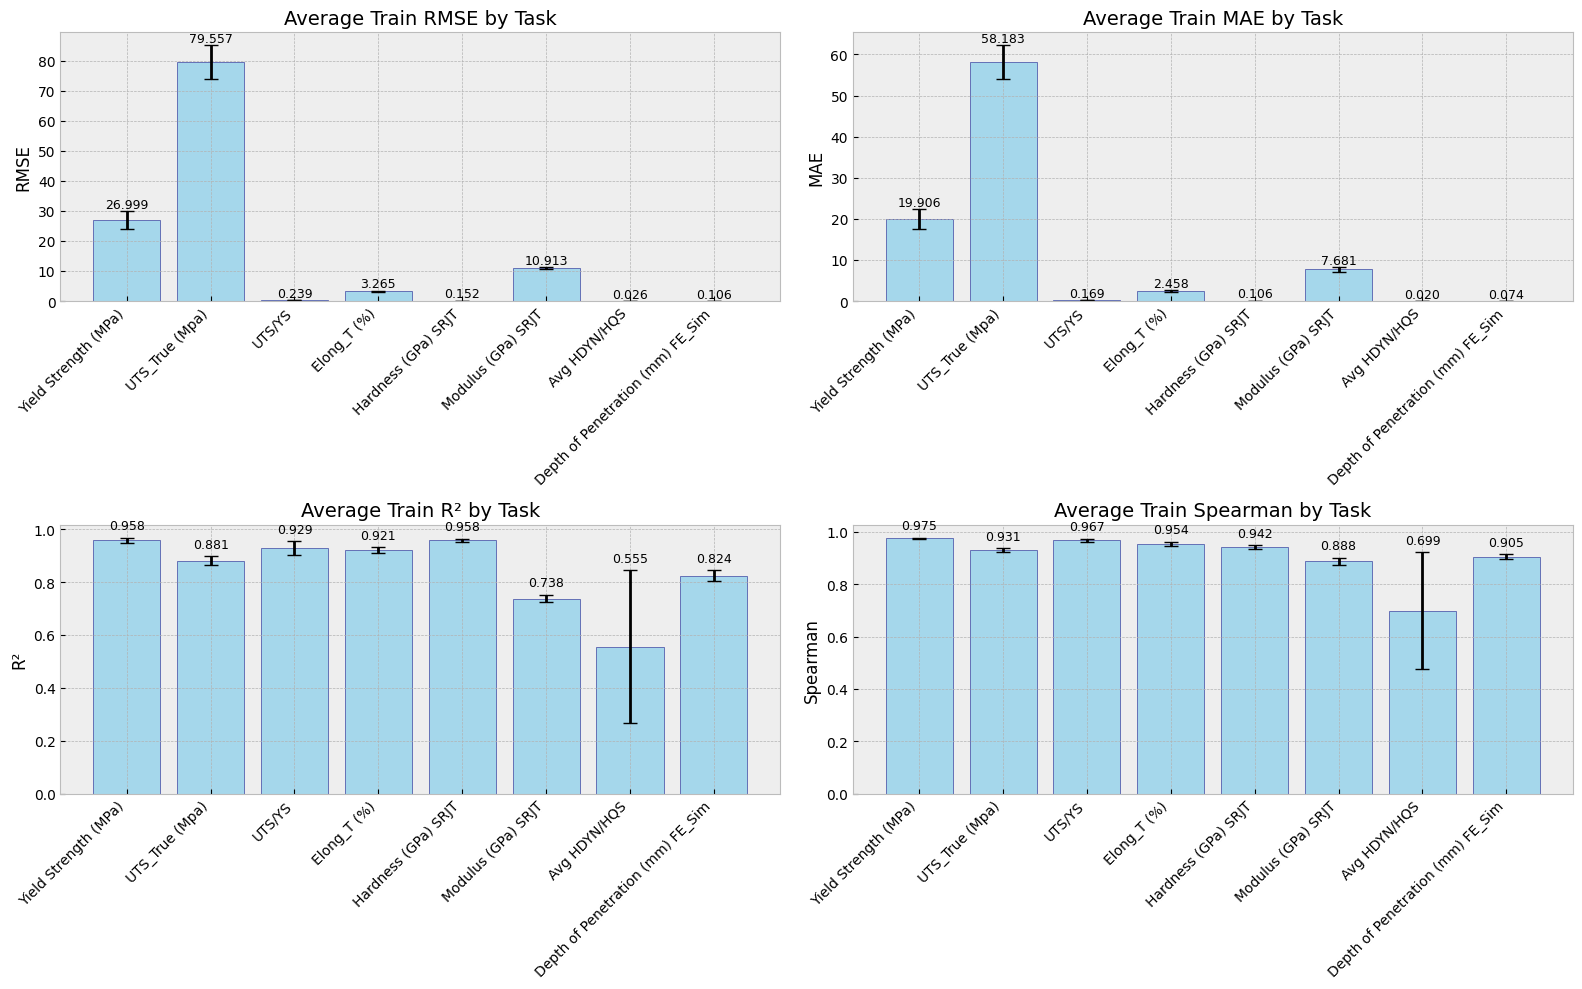

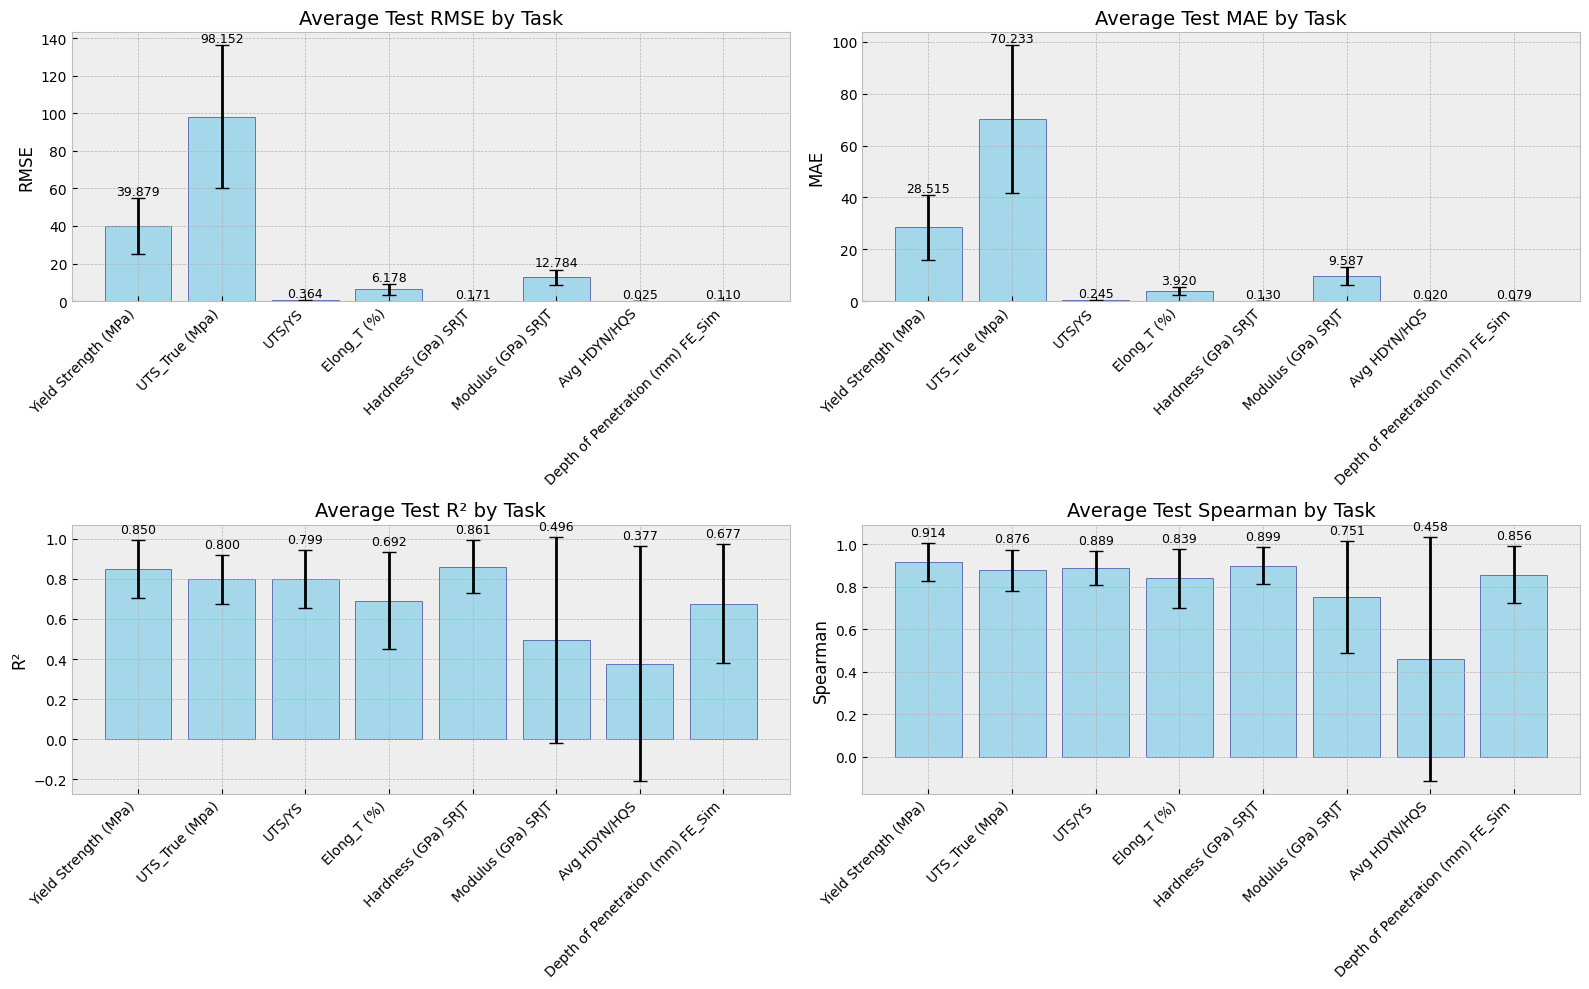


Average Train Metrics Across All Splits:

Task: Yield Strength (MPa) (averaged over 5 splits)
----------------------------------------
Train RMSE: 26.9989 $\pm$ 3.0074
Train MAE: 19.9060 $\pm$ 2.4751
Train R²: 0.9585 $\pm$ 0.0098
Train Spearman: 0.9750 $\pm$ 0.0033
Train Kendall: 0.8775 $\pm$ 0.0119
GMAE: 0.0530 $\pm$ 0.0066
SMAPE: 5.29\% $\pm$ 0.66\%
MASE: 0.1154 $\pm$ 0.0144
RMSPE: 0.0778 $\pm$ 0.0072
Avg. Train Samples: 105.0

Task: UTS_True (Mpa) (averaged over 5 splits)
----------------------------------------
Train RMSE: 79.5568 $\pm$ 5.5911
Train MAE: 58.1831 $\pm$ 4.0728
Train R²: 0.8808 $\pm$ 0.0171
Train Spearman: 0.9313 $\pm$ 0.0073
Train Kendall: 0.7926 $\pm$ 0.0144
GMAE: 0.0675 $\pm$ 0.0046
SMAPE: 6.73\% $\pm$ 0.46\%
MASE: 0.2298 $\pm$ 0.0161
RMSPE: 0.1117 $\pm$ 0.0075
Avg. Train Samples: 105.0

Task: UTS/YS (averaged over 5 splits)
----------------------------------------
Train RMSE: 0.2389 $\pm$ 0.0432
Train MAE: 0.1694 $\pm$ 0.0254
Train R²: 0.9289 $\pm$ 0.0271
Train S

In [18]:
def print_average_metrics(avg_metrics, set_type="Test"):
    """
    Print average metrics in a nicely formatted way.

    Args:
        avg_metrics: Dictionary with average metrics
        set_type: Type of metrics (Train or Test)
    """
    print(f"\nAverage {set_type} Metrics Across All Splits:")
    print("=" * 60)

    for task_name, metrics in avg_metrics.items():
        print(f"\nTask: {task_name} (averaged over {metrics['n_splits']} splits)")
        print("-" * 40)

        # Print core metrics with standard deviation
        print(f"{set_type} RMSE: {metrics['rmse']:.4f} $\pm$ {metrics['rmse_std']:.4f}")
        print(f"{set_type} MAE: {metrics['mae']:.4f} $\pm$ {metrics['mae_std']:.4f}")
        print(f"{set_type} R²: {metrics['r2']:.4f} $\pm$ {metrics['r2_std']:.4f}")
        print(f"{set_type} Spearman: {metrics['spearman']:.4f} $\pm$ {metrics['spearman_std']:.4f}")
        print(f"{set_type} Kendall: {metrics['kendall']:.4f} $\pm$ {metrics['kendall_std']:.4f}")

        # Print additional error metrics
        print(f"GMAE: {metrics['gmae']:.4f} $\pm$ {metrics['gmae_std']:.4f}")
        print(f"SMAPE: {metrics['smape']:.2f}\% $\pm$ {metrics['smape_std']:.2f}\%")
        print(f"MASE: {metrics['mase']:.4f} $\pm$ {metrics['mase_std']:.4f}")
        print(f"RMSPE: {metrics['rmspe']:.4f} $\pm$ {metrics['rmspe_std']:.4f}")

        # Print sample counts
        print(f"Avg. {set_type} Samples: {metrics['avg_samples']:.1f}")


avg_train = calculate_average_metrics(results["train"], n_splits=1, output_vars=output_vars)
avg_test = calculate_average_metrics(results["test"], n_splits=1, output_vars=output_vars)

plot_average_metrics(avg_train, set_type="Train")
plot_average_metrics(avg_test, set_type="Test")
print_average_metrics(avg_train, set_type="Train")
print_average_metrics(avg_test, set_type="Test")
